## PyTorch

In [2]:
# At the start of your code
device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")

In [1]:
import torch

def gradients(outputs, inputs):
    return torch.autograd.grad(outputs, inputs, grad_outputs=torch.ones_like(outputs), create_graph=True)

# Define a vector input with requires_grad=True
x = torch.tensor([[2.0], [3.0], [4.0]], requires_grad=True)  

# Define the function with vector output
f1 = x[0]**2        # f1(x1) = x1^2
f2 = torch.exp(x[1]) # f2(x2) = e^x2
f3 = torch.sin(x[2]) # f3(x3) = sin(x3)
f = torch.stack([f1, f2, f3])  # Stack outputs to form a vector function
df = gradients(f, x)
df

(tensor([[ 4.0000],
         [20.0855],
         [-0.6536]], grad_fn=<AddBackward0>),)

In [7]:
import numpy as np

x = np.array([[2.0], [3.0], [4.0]], dtype=float)

# NumPy to PyTorch
y = torch.from_numpy(x)

#Set this array to differentiable
y=y.requires_grad_()
print(y.requires_grad_)
print(y.requires_grad)


# ## Create a Tensor with requires Grad true
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)


#If you already have a tensor but it was created without requires_grad=True, 
#you can enable it like this:

x = torch.tensor([1.0, 2.0, 3.0])
x = x.detach().requires_grad_()  # Detach and set requires_grad=True

print(x.requires_grad)  # Output: True

<built-in method requires_grad_ of Tensor object at 0x7feb842d2c70>
True
True


In [8]:
# Why requires_grad=True is useful

import torch
x = torch.tensor([2.0], requires_grad=True)  
f = x**2 + 3*x + 2
f.backward()
# Print the gradient
print("Gradient at x=2:", x.grad)  


Gradient at x=2: tensor([7.])


In [103]:
import torch
xy = torch.tensor([2.0, 3.0], requires_grad=True)  

# Define the function f(x, y) = x^2 + y^2 + 3xy
f = xy[0]**2 + xy[1]**2 + 3 * xy[0] * xy[1]
f.backward()

# Print gradients
print("Gradient (df/dx, df/dy):", xy.grad)  


Gradient (df/dx, df/dy): tensor([13., 12.])


# Einstein Summation

In [2]:
import torch
torch.manual_seed(1234)

In [9]:
A=torch.randint(3, 10, (3, 4))
B=torch.randint(3, 10, (4, 3))
print(f"A: {A} B:{B}")



A: tensor([[8, 6, 6, 5],
        [4, 4, 5, 5],
        [8, 6, 8, 8]]) B:tensor([[9, 9, 3],
        [4, 9, 7],
        [6, 5, 6],
        [3, 4, 5]])


In [32]:
torch.matmul(A, B)

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [36]:
C= torch.einsum("ij, jk -> ik", A, B)
C

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [5]:
torch.manual_seed(1234)
A=torch.randint(3, 10, (3, 4, 3))
B=torch.randint(3, 10, (3, 3, 4))
A



tensor([[[9, 7, 3],
         [8, 3, 4],
         [9, 7, 3],
         [5, 5, 6]],

        [[4, 8, 3],
         [6, 7, 4],
         [9, 8, 6],
         [4, 5, 8]],

        [[7, 8, 8],
         [9, 6, 4],
         [7, 4, 5],
         [7, 7, 6]]])

In [38]:
B

tensor([[[7, 5, 4, 4],
         [5, 6, 4, 6],
         [3, 7, 3, 8]],

        [[8, 6, 8, 6],
         [7, 9, 8, 4],
         [8, 4, 8, 5]],

        [[5, 9, 7, 4],
         [5, 5, 7, 3],
         [8, 7, 3, 7]]])

In [39]:
C = torch.einsum("bij, bjk->bik", A,B)
C

tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

In [40]:
Ct = torch.matmul(A, B)

In [41]:
Ct


tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

### Customizing Function

In [66]:
import torch
import torch.nn as nn 
from torch.nn.parameter import Parameter 
import numpy as np
import matplotlib.pyplot as plt

'''
clu = x * sigmoid(x) = (1/ (1 + exp(-x)))
'''


def caf(x):
    return x * (1.0/(1.0 + torch.exp(-x)))

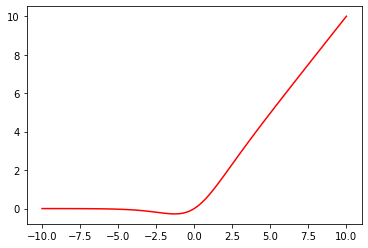

In [68]:
x = torch.linspace(-10, 10, 100).view((-1, 1))
y = caf(x)
plt.plot(x, y, "-r")

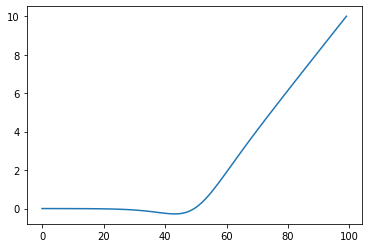

In [69]:
class CAF(nn.Module):
    
    def __init__(self):
        super().__init__()       
    
    def forward(self, x):
        return caf(x)
    
custom_af = CAF()

Net = torch.nn.Sequential(
     CAF()
     )

y = Net(x)

plt.plot(y.detach().numpy())

name: Linear-1.weight
 Shape: torch.Size([100, 1])
name: Linear-1.bias
 Shape: torch.Size([100])
name: Customized AF.a
 Shape: torch.Size([1])
name: Linear-2.weight
 Shape: torch.Size([1, 100])
name: Linear-2.bias
 Shape: torch.Size([1])


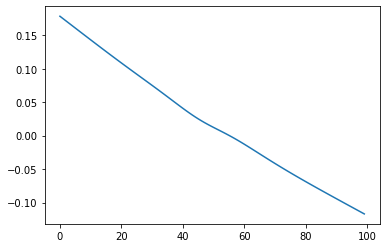

In [73]:
from torchsummary import summary


class CAF(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.Tensor([0.1]), requires_grad=True)
        self.N = 10.0
    
    def forward(self, x):
        return  self.a * caf(x)
    
custom_af = CAF()

Net = torch.nn.Sequential()
Net.add_module("Linear-1", torch.nn.Linear(1, 100))
Net.add_module("Customized AF",  CAF())
Net.add_module("Linear-2",   torch.nn.Linear(100, 1))
y = Net(x)

for name, params in Net.named_parameters():
    if params.requires_grad:
        print(f"name: {name}")
        print(f" Shape: {params.size()}")

plt.plot(y.detach().numpy())

## TensorFlow: 2.0

In [12]:
# In TensorFlow
import tensorflow as tf
import numpy as np
x = np.array([3.0, 4.0, 6.0], dtype=float)
x_tensor = tf.Variable(x)

def fun_g2(x_tensor):
    with tf.GradientTape(persistent=True) as f:
        f.watch(x_tensor)
        with tf.GradientTape(persistent=True) as g:
            g.watch(x_tensor)
            y = tf.exp(x_tensor)
        dy_dx = g.gradient(y, x_tensor)
    d2y_dx2 = f.gradient(dy_dx, x_tensor)
    return d2y_dx2

d2y_dx2 = fun_g2(x_tensor)

d2y_dx2.numpy()

array([ 20.08553692,  54.59815003, 403.42879349])

## JAX

In [16]:
import jax
import jax.numpy as jnp
vector_fn = lambda x: jnp.sum(x**2, axis=-1)  # Sum over each row
grad_fn = jax.vmap(jax.grad(vector_fn))  # Vectorized gradient computation
X = jnp.array([[1.0, 2.0], [3.0, 4.0]])  # 2D input
grad_X = grad_fn(X)
print(grad_X)

[[2. 4.]
 [6. 8.]]


In [ ]:
from jax import random
from jax.nn import tanh
from jax import numpy as jnp
from jax import vmap, value_and_grad, jit

def get_random_layer_params(m, n, random_key, scale=0.01):
    w_key, b_key = random.split(random_key)
    weights = 1/(jnp.sqrt(m+n)) * random.normal(w_key, (n, m))
    biases = jnp.zeros((n,)) 
    return weights, biases

def get_init_network_params(sizes, ran_key):
    keys = random.split(ran_key, len(sizes))
    return [get_random_layer_params(m, n, k) \
            for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

def feedforward_prediction(params, x):     
    for w, b in params[:-1]:
        outputs = jnp.dot(w, x) + b  
        x = tanh(outputs)  
    w_final, b_final = params[-1] 
    final_outputs = jnp.dot(w_final, x) + b_final 
    return final_outputs  


batched_prediction = vmap(feedforward_prediction, in_axes=(None, 0))

@jit
def mse_loss(params, x, y):
    preds = batched_prediction(params, x)
    diff = preds - y
    return jnp.sum(diff*diff)/preds.shape[0]

@jit
def update(params, x, y, learning_rate):
    l, grads = value_and_grad(mse_loss)(params, x, y)
    return [(w - learning_rate * dw, b - learning_rate * db) 
            for (w, b), (dw, db) in zip(params, grads)], l



def f(x):
    return x**2

SEED = 1234
key = random.PRNGKey(SEED)
Niter = 100000
lr = 1e-02

num_features = 1
num_traget = 1
num_batches = 1000
layers = [1] + [32]*2 + [1]
ran_key, func_key = random.split(key)
params = get_init_network_params(layers, ran_key)


x_train = jnp.linspace(-1, 1, num_batches)
x_train = x_train.reshape((num_batches, num_features))
y_train = f(x_train)

for it in range(0, Niter):
    params, loss = update(params, x_train, y_train, lr)
    print(f"{it=} and {loss=}\n")
    

it=0 and loss=Array(0.2029252, dtype=float32)

it=1 and loss=Array(0.18818077, dtype=float32)

it=2 and loss=Array(0.1753866, dtype=float32)

it=3 and loss=Array(0.16428144, dtype=float32)

it=4 and loss=Array(0.15464024, dtype=float32)

it=5 and loss=Array(0.14626862, dtype=float32)

it=6 and loss=Array(0.13899848, dtype=float32)

it=7 and loss=Array(0.13268434, dtype=float32)

it=8 and loss=Array(0.1272001, dtype=float32)

it=9 and loss=Array(0.12243643, dtype=float32)

it=10 and loss=Array(0.11829847, dtype=float32)

it=11 and loss=Array(0.11470383, dtype=float32)

it=12 and loss=Array(0.111581, dtype=float32)

it=13 and loss=Array(0.10886786, dtype=float32)

it=14 and loss=Array(0.1065105, dtype=float32)

it=15 and loss=Array(0.104462, dtype=float32)

it=16 and loss=Array(0.10268167, dtype=float32)

it=17 and loss=Array(0.10113417, dtype=float32)

it=18 and loss=Array(0.09978875, dtype=float32)

it=19 and loss=Array(0.09861875, dtype=float32)

it=20 and loss=Array(0.09760101, dtype

it=229 and loss=Array(0.09002467, dtype=float32)

it=230 and loss=Array(0.09002372, dtype=float32)

it=231 and loss=Array(0.09002277, dtype=float32)

it=232 and loss=Array(0.09002183, dtype=float32)

it=233 and loss=Array(0.09002088, dtype=float32)

it=234 and loss=Array(0.09001993, dtype=float32)

it=235 and loss=Array(0.09001899, dtype=float32)

it=236 and loss=Array(0.09001804, dtype=float32)

it=237 and loss=Array(0.09001711, dtype=float32)

it=238 and loss=Array(0.09001616, dtype=float32)

it=239 and loss=Array(0.09001522, dtype=float32)

it=240 and loss=Array(0.09001429, dtype=float32)

it=241 and loss=Array(0.09001334, dtype=float32)

it=242 and loss=Array(0.09001241, dtype=float32)

it=243 and loss=Array(0.09001146, dtype=float32)

it=244 and loss=Array(0.09001053, dtype=float32)

it=245 and loss=Array(0.0900096, dtype=float32)

it=246 and loss=Array(0.09000866, dtype=float32)

it=247 and loss=Array(0.09000772, dtype=float32)

it=248 and loss=Array(0.09000679, dtype=float32)

i

it=470 and loss=Array(0.08980703, dtype=float32)

it=471 and loss=Array(0.08980615, dtype=float32)

it=472 and loss=Array(0.08980528, dtype=float32)

it=473 and loss=Array(0.0898044, dtype=float32)

it=474 and loss=Array(0.08980352, dtype=float32)

it=475 and loss=Array(0.08980265, dtype=float32)

it=476 and loss=Array(0.08980177, dtype=float32)

it=477 and loss=Array(0.08980089, dtype=float32)

it=478 and loss=Array(0.08980001, dtype=float32)

it=479 and loss=Array(0.08979914, dtype=float32)

it=480 and loss=Array(0.08979826, dtype=float32)

it=481 and loss=Array(0.08979739, dtype=float32)

it=482 and loss=Array(0.08979651, dtype=float32)

it=483 and loss=Array(0.08979563, dtype=float32)

it=484 and loss=Array(0.08979475, dtype=float32)

it=485 and loss=Array(0.08979389, dtype=float32)

it=486 and loss=Array(0.08979301, dtype=float32)

it=487 and loss=Array(0.08979213, dtype=float32)

it=488 and loss=Array(0.08979125, dtype=float32)

it=489 and loss=Array(0.08979038, dtype=float32)

i

it=706 and loss=Array(0.08960297, dtype=float32)

it=707 and loss=Array(0.08960211, dtype=float32)

it=708 and loss=Array(0.08960126, dtype=float32)

it=709 and loss=Array(0.08960041, dtype=float32)

it=710 and loss=Array(0.08959954, dtype=float32)

it=711 and loss=Array(0.08959869, dtype=float32)

it=712 and loss=Array(0.08959784, dtype=float32)

it=713 and loss=Array(0.08959697, dtype=float32)

it=714 and loss=Array(0.08959613, dtype=float32)

it=715 and loss=Array(0.08959527, dtype=float32)

it=716 and loss=Array(0.08959441, dtype=float32)

it=717 and loss=Array(0.08959356, dtype=float32)

it=718 and loss=Array(0.0895927, dtype=float32)

it=719 and loss=Array(0.08959185, dtype=float32)

it=720 and loss=Array(0.08959099, dtype=float32)

it=721 and loss=Array(0.08959014, dtype=float32)

it=722 and loss=Array(0.08958928, dtype=float32)

it=723 and loss=Array(0.08958842, dtype=float32)

it=724 and loss=Array(0.08958756, dtype=float32)

it=725 and loss=Array(0.0895867, dtype=float32)

it

it=942 and loss=Array(0.08940069, dtype=float32)

it=943 and loss=Array(0.08939983, dtype=float32)

it=944 and loss=Array(0.08939896, dtype=float32)

it=945 and loss=Array(0.0893981, dtype=float32)

it=946 and loss=Array(0.08939724, dtype=float32)

it=947 and loss=Array(0.08939636, dtype=float32)

it=948 and loss=Array(0.08939552, dtype=float32)

it=949 and loss=Array(0.08939465, dtype=float32)

it=950 and loss=Array(0.08939379, dtype=float32)

it=951 and loss=Array(0.08939292, dtype=float32)

it=952 and loss=Array(0.08939207, dtype=float32)

it=953 and loss=Array(0.0893912, dtype=float32)

it=954 and loss=Array(0.08939033, dtype=float32)

it=955 and loss=Array(0.08938947, dtype=float32)

it=956 and loss=Array(0.0893886, dtype=float32)

it=957 and loss=Array(0.08938774, dtype=float32)

it=958 and loss=Array(0.08938687, dtype=float32)

it=959 and loss=Array(0.08938602, dtype=float32)

it=960 and loss=Array(0.08938515, dtype=float32)

it=961 and loss=Array(0.08938429, dtype=float32)

it=

it=1189 and loss=Array(0.08918386, dtype=float32)

it=1190 and loss=Array(0.08918296, dtype=float32)

it=1191 and loss=Array(0.08918206, dtype=float32)

it=1192 and loss=Array(0.08918115, dtype=float32)

it=1193 and loss=Array(0.08918025, dtype=float32)

it=1194 and loss=Array(0.08917937, dtype=float32)

it=1195 and loss=Array(0.08917847, dtype=float32)

it=1196 and loss=Array(0.08917756, dtype=float32)

it=1197 and loss=Array(0.08917666, dtype=float32)

it=1198 and loss=Array(0.08917577, dtype=float32)

it=1199 and loss=Array(0.08917486, dtype=float32)

it=1200 and loss=Array(0.08917397, dtype=float32)

it=1201 and loss=Array(0.08917307, dtype=float32)

it=1202 and loss=Array(0.08917216, dtype=float32)

it=1203 and loss=Array(0.08917126, dtype=float32)

it=1204 and loss=Array(0.08917035, dtype=float32)

it=1205 and loss=Array(0.08916945, dtype=float32)

it=1206 and loss=Array(0.08916856, dtype=float32)

it=1207 and loss=Array(0.08916765, dtype=float32)

it=1208 and loss=Array(0.089166

it=1429 and loss=Array(0.08896091, dtype=float32)

it=1430 and loss=Array(0.08895995, dtype=float32)

it=1431 and loss=Array(0.08895898, dtype=float32)

it=1432 and loss=Array(0.08895801, dtype=float32)

it=1433 and loss=Array(0.08895704, dtype=float32)

it=1434 and loss=Array(0.08895609, dtype=float32)

it=1435 and loss=Array(0.08895511, dtype=float32)

it=1436 and loss=Array(0.08895415, dtype=float32)

it=1437 and loss=Array(0.08895317, dtype=float32)

it=1438 and loss=Array(0.08895221, dtype=float32)

it=1439 and loss=Array(0.08895125, dtype=float32)

it=1440 and loss=Array(0.08895028, dtype=float32)

it=1441 and loss=Array(0.08894931, dtype=float32)

it=1442 and loss=Array(0.08894834, dtype=float32)

it=1443 and loss=Array(0.08894737, dtype=float32)

it=1444 and loss=Array(0.0889464, dtype=float32)

it=1445 and loss=Array(0.08894543, dtype=float32)

it=1446 and loss=Array(0.08894446, dtype=float32)

it=1447 and loss=Array(0.08894349, dtype=float32)

it=1448 and loss=Array(0.0889425

it=1653 and loss=Array(0.08873482, dtype=float32)

it=1654 and loss=Array(0.08873376, dtype=float32)

it=1655 and loss=Array(0.0887327, dtype=float32)

it=1656 and loss=Array(0.08873164, dtype=float32)

it=1657 and loss=Array(0.08873058, dtype=float32)

it=1658 and loss=Array(0.08872952, dtype=float32)

it=1659 and loss=Array(0.08872846, dtype=float32)

it=1660 and loss=Array(0.08872739, dtype=float32)

it=1661 and loss=Array(0.08872633, dtype=float32)

it=1662 and loss=Array(0.08872527, dtype=float32)

it=1663 and loss=Array(0.0887242, dtype=float32)

it=1664 and loss=Array(0.08872314, dtype=float32)

it=1665 and loss=Array(0.08872207, dtype=float32)

it=1666 and loss=Array(0.08872101, dtype=float32)

it=1667 and loss=Array(0.08871994, dtype=float32)

it=1668 and loss=Array(0.08871888, dtype=float32)

it=1669 and loss=Array(0.08871781, dtype=float32)

it=1670 and loss=Array(0.08871674, dtype=float32)

it=1671 and loss=Array(0.08871567, dtype=float32)

it=1672 and loss=Array(0.08871461

it=1899 and loss=Array(0.08845711, dtype=float32)

it=1900 and loss=Array(0.0884559, dtype=float32)

it=1901 and loss=Array(0.08845469, dtype=float32)

it=1902 and loss=Array(0.08845348, dtype=float32)

it=1903 and loss=Array(0.08845227, dtype=float32)

it=1904 and loss=Array(0.08845107, dtype=float32)

it=1905 and loss=Array(0.08844986, dtype=float32)

it=1906 and loss=Array(0.08844864, dtype=float32)

it=1907 and loss=Array(0.08844742, dtype=float32)

it=1908 and loss=Array(0.08844621, dtype=float32)

it=1909 and loss=Array(0.08844499, dtype=float32)

it=1910 and loss=Array(0.08844379, dtype=float32)

it=1911 and loss=Array(0.08844257, dtype=float32)

it=1912 and loss=Array(0.08844136, dtype=float32)

it=1913 and loss=Array(0.08844014, dtype=float32)

it=1914 and loss=Array(0.08843892, dtype=float32)

it=1915 and loss=Array(0.08843771, dtype=float32)

it=1916 and loss=Array(0.08843649, dtype=float32)

it=1917 and loss=Array(0.08843526, dtype=float32)

it=1918 and loss=Array(0.0884340

it=2142 and loss=Array(0.08814044, dtype=float32)

it=2143 and loss=Array(0.08813903, dtype=float32)

it=2144 and loss=Array(0.08813762, dtype=float32)

it=2145 and loss=Array(0.0881362, dtype=float32)

it=2146 and loss=Array(0.0881348, dtype=float32)

it=2147 and loss=Array(0.08813338, dtype=float32)

it=2148 and loss=Array(0.08813196, dtype=float32)

it=2149 and loss=Array(0.08813054, dtype=float32)

it=2150 and loss=Array(0.08812913, dtype=float32)

it=2151 and loss=Array(0.0881277, dtype=float32)

it=2152 and loss=Array(0.08812629, dtype=float32)

it=2153 and loss=Array(0.08812486, dtype=float32)

it=2154 and loss=Array(0.08812345, dtype=float32)

it=2155 and loss=Array(0.08812203, dtype=float32)

it=2156 and loss=Array(0.08812061, dtype=float32)

it=2157 and loss=Array(0.08811918, dtype=float32)

it=2158 and loss=Array(0.08811776, dtype=float32)

it=2159 and loss=Array(0.08811633, dtype=float32)

it=2160 and loss=Array(0.0881149, dtype=float32)

it=2161 and loss=Array(0.08811347, 

it=2377 and loss=Array(0.0877791, dtype=float32)

it=2378 and loss=Array(0.08777742, dtype=float32)

it=2379 and loss=Array(0.08777574, dtype=float32)

it=2380 and loss=Array(0.08777406, dtype=float32)

it=2381 and loss=Array(0.08777238, dtype=float32)

it=2382 and loss=Array(0.08777069, dtype=float32)

it=2383 and loss=Array(0.087769, dtype=float32)

it=2384 and loss=Array(0.08776733, dtype=float32)

it=2385 and loss=Array(0.08776563, dtype=float32)

it=2386 and loss=Array(0.08776394, dtype=float32)

it=2387 and loss=Array(0.08776225, dtype=float32)

it=2388 and loss=Array(0.08776056, dtype=float32)

it=2389 and loss=Array(0.08775886, dtype=float32)

it=2390 and loss=Array(0.08775718, dtype=float32)

it=2391 and loss=Array(0.08775546, dtype=float32)

it=2392 and loss=Array(0.08775377, dtype=float32)

it=2393 and loss=Array(0.08775207, dtype=float32)

it=2394 and loss=Array(0.08775037, dtype=float32)

it=2395 and loss=Array(0.08774868, dtype=float32)

it=2396 and loss=Array(0.08774697,

it=2610 and loss=Array(0.08734806, dtype=float32)

it=2611 and loss=Array(0.08734601, dtype=float32)

it=2612 and loss=Array(0.08734397, dtype=float32)

it=2613 and loss=Array(0.08734193, dtype=float32)

it=2614 and loss=Array(0.08733988, dtype=float32)

it=2615 and loss=Array(0.08733784, dtype=float32)

it=2616 and loss=Array(0.08733579, dtype=float32)

it=2617 and loss=Array(0.08733374, dtype=float32)

it=2618 and loss=Array(0.08733168, dtype=float32)

it=2619 and loss=Array(0.08732963, dtype=float32)

it=2620 and loss=Array(0.08732756, dtype=float32)

it=2621 and loss=Array(0.08732551, dtype=float32)

it=2622 and loss=Array(0.08732345, dtype=float32)

it=2623 and loss=Array(0.08732139, dtype=float32)

it=2624 and loss=Array(0.08731932, dtype=float32)

it=2625 and loss=Array(0.08731727, dtype=float32)

it=2626 and loss=Array(0.08731519, dtype=float32)

it=2627 and loss=Array(0.08731313, dtype=float32)

it=2628 and loss=Array(0.08731104, dtype=float32)

it=2629 and loss=Array(0.087308

it=2857 and loss=Array(0.08678281, dtype=float32)

it=2858 and loss=Array(0.08678024, dtype=float32)

it=2859 and loss=Array(0.08677766, dtype=float32)

it=2860 and loss=Array(0.08677509, dtype=float32)

it=2861 and loss=Array(0.08677251, dtype=float32)

it=2862 and loss=Array(0.08676993, dtype=float32)

it=2863 and loss=Array(0.08676735, dtype=float32)

it=2864 and loss=Array(0.08676478, dtype=float32)

it=2865 and loss=Array(0.08676218, dtype=float32)

it=2866 and loss=Array(0.0867596, dtype=float32)

it=2867 and loss=Array(0.086757, dtype=float32)

it=2868 and loss=Array(0.08675442, dtype=float32)

it=2869 and loss=Array(0.08675182, dtype=float32)

it=2870 and loss=Array(0.08674923, dtype=float32)

it=2871 and loss=Array(0.08674663, dtype=float32)

it=2872 and loss=Array(0.08674403, dtype=float32)

it=2873 and loss=Array(0.08674141, dtype=float32)

it=2874 and loss=Array(0.0867388, dtype=float32)

it=2875 and loss=Array(0.08673619, dtype=float32)

it=2876 and loss=Array(0.08673359, 

it=3106 and loss=Array(0.08605608, dtype=float32)

it=3107 and loss=Array(0.08605277, dtype=float32)

it=3108 and loss=Array(0.08604944, dtype=float32)

it=3109 and loss=Array(0.08604612, dtype=float32)

it=3110 and loss=Array(0.0860428, dtype=float32)

it=3111 and loss=Array(0.08603946, dtype=float32)

it=3112 and loss=Array(0.08603614, dtype=float32)

it=3113 and loss=Array(0.08603279, dtype=float32)

it=3114 and loss=Array(0.08602946, dtype=float32)

it=3115 and loss=Array(0.0860261, dtype=float32)

it=3116 and loss=Array(0.08602276, dtype=float32)

it=3117 and loss=Array(0.08601941, dtype=float32)

it=3118 and loss=Array(0.08601606, dtype=float32)

it=3119 and loss=Array(0.08601269, dtype=float32)

it=3120 and loss=Array(0.08600934, dtype=float32)

it=3121 and loss=Array(0.08600596, dtype=float32)

it=3122 and loss=Array(0.0860026, dtype=float32)

it=3123 and loss=Array(0.08599923, dtype=float32)

it=3124 and loss=Array(0.08599585, dtype=float32)

it=3125 and loss=Array(0.08599246,

it=3341 and loss=Array(0.08516657, dtype=float32)

it=3342 and loss=Array(0.08516225, dtype=float32)

it=3343 and loss=Array(0.08515793, dtype=float32)

it=3344 and loss=Array(0.08515362, dtype=float32)

it=3345 and loss=Array(0.08514928, dtype=float32)

it=3346 and loss=Array(0.08514493, dtype=float32)

it=3347 and loss=Array(0.08514059, dtype=float32)

it=3348 and loss=Array(0.08513625, dtype=float32)

it=3349 and loss=Array(0.0851319, dtype=float32)

it=3350 and loss=Array(0.08512754, dtype=float32)

it=3351 and loss=Array(0.08512317, dtype=float32)

it=3352 and loss=Array(0.08511881, dtype=float32)

it=3353 and loss=Array(0.08511443, dtype=float32)

it=3354 and loss=Array(0.08511007, dtype=float32)

it=3355 and loss=Array(0.08510569, dtype=float32)

it=3356 and loss=Array(0.08510129, dtype=float32)

it=3357 and loss=Array(0.0850969, dtype=float32)

it=3358 and loss=Array(0.0850925, dtype=float32)

it=3359 and loss=Array(0.0850881, dtype=float32)

it=3360 and loss=Array(0.08508369, 

it=3581 and loss=Array(0.08396664, dtype=float32)

it=3582 and loss=Array(0.08396086, dtype=float32)

it=3583 and loss=Array(0.08395506, dtype=float32)

it=3584 and loss=Array(0.08394927, dtype=float32)

it=3585 and loss=Array(0.08394347, dtype=float32)

it=3586 and loss=Array(0.08393766, dtype=float32)

it=3587 and loss=Array(0.08393184, dtype=float32)

it=3588 and loss=Array(0.08392602, dtype=float32)

it=3589 and loss=Array(0.0839202, dtype=float32)

it=3590 and loss=Array(0.08391435, dtype=float32)

it=3591 and loss=Array(0.08390851, dtype=float32)

it=3592 and loss=Array(0.08390265, dtype=float32)

it=3593 and loss=Array(0.08389679, dtype=float32)

it=3594 and loss=Array(0.08389092, dtype=float32)

it=3595 and loss=Array(0.08388504, dtype=float32)

it=3596 and loss=Array(0.08387917, dtype=float32)

it=3597 and loss=Array(0.08387328, dtype=float32)

it=3598 and loss=Array(0.08386738, dtype=float32)

it=3599 and loss=Array(0.08386147, dtype=float32)

it=3600 and loss=Array(0.0838555

it=3823 and loss=Array(0.08232462, dtype=float32)

it=3824 and loss=Array(0.08231668, dtype=float32)

it=3825 and loss=Array(0.08230873, dtype=float32)

it=3826 and loss=Array(0.08230077, dtype=float32)

it=3827 and loss=Array(0.0822928, dtype=float32)

it=3828 and loss=Array(0.08228482, dtype=float32)

it=3829 and loss=Array(0.08227682, dtype=float32)

it=3830 and loss=Array(0.08226882, dtype=float32)

it=3831 and loss=Array(0.08226081, dtype=float32)

it=3832 and loss=Array(0.08225277, dtype=float32)

it=3833 and loss=Array(0.08224474, dtype=float32)

it=3834 and loss=Array(0.08223668, dtype=float32)

it=3835 and loss=Array(0.08222862, dtype=float32)

it=3836 and loss=Array(0.08222055, dtype=float32)

it=3837 and loss=Array(0.08221249, dtype=float32)

it=3838 and loss=Array(0.08220439, dtype=float32)

it=3839 and loss=Array(0.08219628, dtype=float32)

it=3840 and loss=Array(0.08218817, dtype=float32)

it=3841 and loss=Array(0.08218005, dtype=float32)

it=3842 and loss=Array(0.0821719

it=4069 and loss=Array(0.07999731, dtype=float32)

it=4070 and loss=Array(0.0799861, dtype=float32)

it=4071 and loss=Array(0.07997486, dtype=float32)

it=4072 and loss=Array(0.07996361, dtype=float32)

it=4073 and loss=Array(0.07995234, dtype=float32)

it=4074 and loss=Array(0.07994106, dtype=float32)

it=4075 and loss=Array(0.07992977, dtype=float32)

it=4076 and loss=Array(0.07991844, dtype=float32)

it=4077 and loss=Array(0.07990712, dtype=float32)

it=4078 and loss=Array(0.07989577, dtype=float32)

it=4079 and loss=Array(0.0798844, dtype=float32)

it=4080 and loss=Array(0.07987303, dtype=float32)

it=4081 and loss=Array(0.07986162, dtype=float32)

it=4082 and loss=Array(0.07985022, dtype=float32)

it=4083 and loss=Array(0.07983878, dtype=float32)

it=4084 and loss=Array(0.07982734, dtype=float32)

it=4085 and loss=Array(0.07981588, dtype=float32)

it=4086 and loss=Array(0.07980438, dtype=float32)

it=4087 and loss=Array(0.07979289, dtype=float32)

it=4088 and loss=Array(0.07978138

it=4297 and loss=Array(0.07696109, dtype=float32)

it=4298 and loss=Array(0.07694538, dtype=float32)

it=4299 and loss=Array(0.07692963, dtype=float32)

it=4300 and loss=Array(0.07691387, dtype=float32)

it=4301 and loss=Array(0.07689807, dtype=float32)

it=4302 and loss=Array(0.07688226, dtype=float32)

it=4303 and loss=Array(0.07686642, dtype=float32)

it=4304 and loss=Array(0.07685056, dtype=float32)

it=4305 and loss=Array(0.07683466, dtype=float32)

it=4306 and loss=Array(0.07681876, dtype=float32)

it=4307 and loss=Array(0.07680283, dtype=float32)

it=4308 and loss=Array(0.07678687, dtype=float32)

it=4309 and loss=Array(0.07677089, dtype=float32)

it=4310 and loss=Array(0.07675488, dtype=float32)

it=4311 and loss=Array(0.07673885, dtype=float32)

it=4312 and loss=Array(0.0767228, dtype=float32)

it=4313 and loss=Array(0.07670671, dtype=float32)

it=4314 and loss=Array(0.07669061, dtype=float32)

it=4315 and loss=Array(0.07667449, dtype=float32)

it=4316 and loss=Array(0.0766583

it=4538 and loss=Array(0.07239037, dtype=float32)

it=4539 and loss=Array(0.0723677, dtype=float32)

it=4540 and loss=Array(0.07234499, dtype=float32)

it=4541 and loss=Array(0.07232224, dtype=float32)

it=4542 and loss=Array(0.07229946, dtype=float32)

it=4543 and loss=Array(0.07227664, dtype=float32)

it=4544 and loss=Array(0.07225379, dtype=float32)

it=4545 and loss=Array(0.07223091, dtype=float32)

it=4546 and loss=Array(0.07220799, dtype=float32)

it=4547 and loss=Array(0.07218503, dtype=float32)

it=4548 and loss=Array(0.07216205, dtype=float32)

it=4549 and loss=Array(0.07213902, dtype=float32)

it=4550 and loss=Array(0.07211597, dtype=float32)

it=4551 and loss=Array(0.07209288, dtype=float32)

it=4552 and loss=Array(0.07206975, dtype=float32)

it=4553 and loss=Array(0.07204659, dtype=float32)

it=4554 and loss=Array(0.07202338, dtype=float32)

it=4555 and loss=Array(0.07200015, dtype=float32)

it=4556 and loss=Array(0.07197688, dtype=float32)

it=4557 and loss=Array(0.0719535

it=4770 and loss=Array(0.06609917, dtype=float32)

it=4771 and loss=Array(0.06606713, dtype=float32)

it=4772 and loss=Array(0.06603502, dtype=float32)

it=4773 and loss=Array(0.06600287, dtype=float32)

it=4774 and loss=Array(0.06597067, dtype=float32)

it=4775 and loss=Array(0.06593844, dtype=float32)

it=4776 and loss=Array(0.06590614, dtype=float32)

it=4777 and loss=Array(0.06587382, dtype=float32)

it=4778 and loss=Array(0.06584144, dtype=float32)

it=4779 and loss=Array(0.06580901, dtype=float32)

it=4780 and loss=Array(0.06577652, dtype=float32)

it=4781 and loss=Array(0.06574401, dtype=float32)

it=4782 and loss=Array(0.06571145, dtype=float32)

it=4783 and loss=Array(0.06567883, dtype=float32)

it=4784 and loss=Array(0.06564616, dtype=float32)

it=4785 and loss=Array(0.06561346, dtype=float32)

it=4786 and loss=Array(0.0655807, dtype=float32)

it=4787 and loss=Array(0.0655479, dtype=float32)

it=4788 and loss=Array(0.06551506, dtype=float32)

it=4789 and loss=Array(0.06548215

it=5019 and loss=Array(0.05659315, dtype=float32)

it=5020 and loss=Array(0.05654854, dtype=float32)

it=5021 and loss=Array(0.05650387, dtype=float32)

it=5022 and loss=Array(0.05645915, dtype=float32)

it=5023 and loss=Array(0.05641438, dtype=float32)

it=5024 and loss=Array(0.05636957, dtype=float32)

it=5025 and loss=Array(0.0563247, dtype=float32)

it=5026 and loss=Array(0.05627977, dtype=float32)

it=5027 and loss=Array(0.05623479, dtype=float32)

it=5028 and loss=Array(0.05618976, dtype=float32)

it=5029 and loss=Array(0.05614468, dtype=float32)

it=5030 and loss=Array(0.05609955, dtype=float32)

it=5031 and loss=Array(0.05605435, dtype=float32)

it=5032 and loss=Array(0.05600912, dtype=float32)

it=5033 and loss=Array(0.05596383, dtype=float32)

it=5034 and loss=Array(0.05591848, dtype=float32)

it=5035 and loss=Array(0.05587309, dtype=float32)

it=5036 and loss=Array(0.05582764, dtype=float32)

it=5037 and loss=Array(0.05578214, dtype=float32)

it=5038 and loss=Array(0.0557365

it=5251 and loss=Array(0.04492231, dtype=float32)

it=5252 and loss=Array(0.04486689, dtype=float32)

it=5253 and loss=Array(0.04481144, dtype=float32)

it=5254 and loss=Array(0.04475596, dtype=float32)

it=5255 and loss=Array(0.04470043, dtype=float32)

it=5256 and loss=Array(0.04464488, dtype=float32)

it=5257 and loss=Array(0.04458929, dtype=float32)

it=5258 and loss=Array(0.04453366, dtype=float32)

it=5259 and loss=Array(0.044478, dtype=float32)

it=5260 and loss=Array(0.04442231, dtype=float32)

it=5261 and loss=Array(0.04436657, dtype=float32)

it=5262 and loss=Array(0.04431081, dtype=float32)

it=5263 and loss=Array(0.04425501, dtype=float32)

it=5264 and loss=Array(0.04419918, dtype=float32)

it=5265 and loss=Array(0.04414332, dtype=float32)

it=5266 and loss=Array(0.04408742, dtype=float32)

it=5267 and loss=Array(0.04403149, dtype=float32)

it=5268 and loss=Array(0.04397552, dtype=float32)

it=5269 and loss=Array(0.04391951, dtype=float32)

it=5270 and loss=Array(0.04386348

it=5499 and loss=Array(0.03054706, dtype=float32)

it=5500 and loss=Array(0.03048877, dtype=float32)

it=5501 and loss=Array(0.03043049, dtype=float32)

it=5502 and loss=Array(0.03037224, dtype=float32)

it=5503 and loss=Array(0.030314, dtype=float32)

it=5504 and loss=Array(0.03025578, dtype=float32)

it=5505 and loss=Array(0.03019758, dtype=float32)

it=5506 and loss=Array(0.0301394, dtype=float32)

it=5507 and loss=Array(0.03008124, dtype=float32)

it=5508 and loss=Array(0.0300231, dtype=float32)

it=5509 and loss=Array(0.02996497, dtype=float32)

it=5510 and loss=Array(0.02990687, dtype=float32)

it=5511 and loss=Array(0.02984879, dtype=float32)

it=5512 and loss=Array(0.02979073, dtype=float32)

it=5513 and loss=Array(0.02973269, dtype=float32)

it=5514 and loss=Array(0.02967468, dtype=float32)

it=5515 and loss=Array(0.02961668, dtype=float32)

it=5516 and loss=Array(0.02955871, dtype=float32)

it=5517 and loss=Array(0.02950075, dtype=float32)

it=5518 and loss=Array(0.02944282, 

it=5744 and loss=Array(0.01742147, dtype=float32)

it=5745 and loss=Array(0.017375, dtype=float32)

it=5746 and loss=Array(0.0173286, dtype=float32)

it=5747 and loss=Array(0.01728227, dtype=float32)

it=5748 and loss=Array(0.01723601, dtype=float32)

it=5749 and loss=Array(0.01718983, dtype=float32)

it=5750 and loss=Array(0.01714372, dtype=float32)

it=5751 and loss=Array(0.01709769, dtype=float32)

it=5752 and loss=Array(0.01705174, dtype=float32)

it=5753 and loss=Array(0.01700586, dtype=float32)

it=5754 and loss=Array(0.01696005, dtype=float32)

it=5755 and loss=Array(0.01691431, dtype=float32)

it=5756 and loss=Array(0.01686865, dtype=float32)

it=5757 and loss=Array(0.01682307, dtype=float32)

it=5758 and loss=Array(0.01677756, dtype=float32)

it=5759 and loss=Array(0.01673213, dtype=float32)

it=5760 and loss=Array(0.01668678, dtype=float32)

it=5761 and loss=Array(0.0166415, dtype=float32)

it=5762 and loss=Array(0.01659629, dtype=float32)

it=5763 and loss=Array(0.01655117, 

it=5974 and loss=Array(0.00884211, dtype=float32)

it=5975 and loss=Array(0.00881428, dtype=float32)

it=5976 and loss=Array(0.00878654, dtype=float32)

it=5977 and loss=Array(0.00875887, dtype=float32)

it=5978 and loss=Array(0.00873128, dtype=float32)

it=5979 and loss=Array(0.00870378, dtype=float32)

it=5980 and loss=Array(0.00867635, dtype=float32)

it=5981 and loss=Array(0.008649, dtype=float32)

it=5982 and loss=Array(0.00862173, dtype=float32)

it=5983 and loss=Array(0.00859454, dtype=float32)

it=5984 and loss=Array(0.00856743, dtype=float32)

it=5985 and loss=Array(0.00854039, dtype=float32)

it=5986 and loss=Array(0.00851343, dtype=float32)

it=5987 and loss=Array(0.00848656, dtype=float32)

it=5988 and loss=Array(0.00845976, dtype=float32)

it=5989 and loss=Array(0.00843304, dtype=float32)

it=5990 and loss=Array(0.0084064, dtype=float32)

it=5991 and loss=Array(0.00837983, dtype=float32)

it=5992 and loss=Array(0.00835335, dtype=float32)

it=5993 and loss=Array(0.00832694,

it=6219 and loss=Array(0.00412853, dtype=float32)

it=6220 and loss=Array(0.0041166, dtype=float32)

it=6221 and loss=Array(0.00410471, dtype=float32)

it=6222 and loss=Array(0.00409287, dtype=float32)

it=6223 and loss=Array(0.00408108, dtype=float32)

it=6224 and loss=Array(0.00406934, dtype=float32)

it=6225 and loss=Array(0.00405764, dtype=float32)

it=6226 and loss=Array(0.00404599, dtype=float32)

it=6227 and loss=Array(0.00403439, dtype=float32)

it=6228 and loss=Array(0.00402283, dtype=float32)

it=6229 and loss=Array(0.00401132, dtype=float32)

it=6230 and loss=Array(0.00399986, dtype=float32)

it=6231 and loss=Array(0.00398844, dtype=float32)

it=6232 and loss=Array(0.00397706, dtype=float32)

it=6233 and loss=Array(0.00396574, dtype=float32)

it=6234 and loss=Array(0.00395446, dtype=float32)

it=6235 and loss=Array(0.00394322, dtype=float32)

it=6236 and loss=Array(0.00393203, dtype=float32)

it=6237 and loss=Array(0.00392089, dtype=float32)

it=6238 and loss=Array(0.0039097

it=6466 and loss=Array(0.00229667, dtype=float32)

it=6467 and loss=Array(0.00229262, dtype=float32)

it=6468 and loss=Array(0.00228858, dtype=float32)

it=6469 and loss=Array(0.00228457, dtype=float32)

it=6470 and loss=Array(0.00228057, dtype=float32)

it=6471 and loss=Array(0.00227659, dtype=float32)

it=6472 and loss=Array(0.00227263, dtype=float32)

it=6473 and loss=Array(0.00226869, dtype=float32)

it=6474 and loss=Array(0.00226477, dtype=float32)

it=6475 and loss=Array(0.00226087, dtype=float32)

it=6476 and loss=Array(0.00225698, dtype=float32)

it=6477 and loss=Array(0.00225311, dtype=float32)

it=6478 and loss=Array(0.00224926, dtype=float32)

it=6479 and loss=Array(0.00224543, dtype=float32)

it=6480 and loss=Array(0.00224162, dtype=float32)

it=6481 and loss=Array(0.00223782, dtype=float32)

it=6482 and loss=Array(0.00223404, dtype=float32)

it=6483 and loss=Array(0.00223028, dtype=float32)

it=6484 and loss=Array(0.00222654, dtype=float32)

it=6485 and loss=Array(0.002222

it=6709 and loss=Array(0.00171072, dtype=float32)

it=6710 and loss=Array(0.00170945, dtype=float32)

it=6711 and loss=Array(0.00170818, dtype=float32)

it=6712 and loss=Array(0.00170692, dtype=float32)

it=6713 and loss=Array(0.00170566, dtype=float32)

it=6714 and loss=Array(0.00170441, dtype=float32)

it=6715 and loss=Array(0.00170316, dtype=float32)

it=6716 and loss=Array(0.00170193, dtype=float32)

it=6717 and loss=Array(0.00170069, dtype=float32)

it=6718 and loss=Array(0.00169947, dtype=float32)

it=6719 and loss=Array(0.00169825, dtype=float32)

it=6720 and loss=Array(0.00169703, dtype=float32)

it=6721 and loss=Array(0.00169582, dtype=float32)

it=6722 and loss=Array(0.00169462, dtype=float32)

it=6723 and loss=Array(0.00169342, dtype=float32)

it=6724 and loss=Array(0.00169223, dtype=float32)

it=6725 and loss=Array(0.00169104, dtype=float32)

it=6726 and loss=Array(0.00168986, dtype=float32)

it=6727 and loss=Array(0.00168868, dtype=float32)

it=6728 and loss=Array(0.001687

it=6946 and loss=Array(0.00152575, dtype=float32)

it=6947 and loss=Array(0.0015253, dtype=float32)

it=6948 and loss=Array(0.00152485, dtype=float32)

it=6949 and loss=Array(0.0015244, dtype=float32)

it=6950 and loss=Array(0.00152396, dtype=float32)

it=6951 and loss=Array(0.00152352, dtype=float32)

it=6952 and loss=Array(0.00152308, dtype=float32)

it=6953 and loss=Array(0.00152264, dtype=float32)

it=6954 and loss=Array(0.0015222, dtype=float32)

it=6955 and loss=Array(0.00152177, dtype=float32)

it=6956 and loss=Array(0.00152133, dtype=float32)

it=6957 and loss=Array(0.0015209, dtype=float32)

it=6958 and loss=Array(0.00152047, dtype=float32)

it=6959 and loss=Array(0.00152004, dtype=float32)

it=6960 and loss=Array(0.00151962, dtype=float32)

it=6961 and loss=Array(0.00151919, dtype=float32)

it=6962 and loss=Array(0.00151877, dtype=float32)

it=6963 and loss=Array(0.00151834, dtype=float32)

it=6964 and loss=Array(0.00151792, dtype=float32)

it=6965 and loss=Array(0.0015175, d

it=7198 and loss=Array(0.00144948, dtype=float32)

it=7199 and loss=Array(0.00144927, dtype=float32)

it=7200 and loss=Array(0.00144907, dtype=float32)

it=7201 and loss=Array(0.00144886, dtype=float32)

it=7202 and loss=Array(0.00144865, dtype=float32)

it=7203 and loss=Array(0.00144845, dtype=float32)

it=7204 and loss=Array(0.00144824, dtype=float32)

it=7205 and loss=Array(0.00144803, dtype=float32)

it=7206 and loss=Array(0.00144783, dtype=float32)

it=7207 and loss=Array(0.00144762, dtype=float32)

it=7208 and loss=Array(0.00144742, dtype=float32)

it=7209 and loss=Array(0.00144721, dtype=float32)

it=7210 and loss=Array(0.00144701, dtype=float32)

it=7211 and loss=Array(0.00144681, dtype=float32)

it=7212 and loss=Array(0.0014466, dtype=float32)

it=7213 and loss=Array(0.0014464, dtype=float32)

it=7214 and loss=Array(0.0014462, dtype=float32)

it=7215 and loss=Array(0.001446, dtype=float32)

it=7216 and loss=Array(0.0014458, dtype=float32)

it=7217 and loss=Array(0.0014456, dty

it=7419 and loss=Array(0.00141098, dtype=float32)

it=7420 and loss=Array(0.00141083, dtype=float32)

it=7421 and loss=Array(0.00141068, dtype=float32)

it=7422 and loss=Array(0.00141052, dtype=float32)

it=7423 and loss=Array(0.00141037, dtype=float32)

it=7424 and loss=Array(0.00141022, dtype=float32)

it=7425 and loss=Array(0.00141007, dtype=float32)

it=7426 and loss=Array(0.00140992, dtype=float32)

it=7427 and loss=Array(0.00140977, dtype=float32)

it=7428 and loss=Array(0.00140962, dtype=float32)

it=7429 and loss=Array(0.00140947, dtype=float32)

it=7430 and loss=Array(0.00140933, dtype=float32)

it=7431 and loss=Array(0.00140918, dtype=float32)

it=7432 and loss=Array(0.00140903, dtype=float32)

it=7433 and loss=Array(0.00140888, dtype=float32)

it=7434 and loss=Array(0.00140873, dtype=float32)

it=7435 and loss=Array(0.00140858, dtype=float32)

it=7436 and loss=Array(0.00140843, dtype=float32)

it=7437 and loss=Array(0.00140828, dtype=float32)

it=7438 and loss=Array(0.001408

it=7665 and loss=Array(0.00137685, dtype=float32)

it=7666 and loss=Array(0.00137672, dtype=float32)

it=7667 and loss=Array(0.00137658, dtype=float32)

it=7668 and loss=Array(0.00137645, dtype=float32)

it=7669 and loss=Array(0.00137632, dtype=float32)

it=7670 and loss=Array(0.00137619, dtype=float32)

it=7671 and loss=Array(0.00137606, dtype=float32)

it=7672 and loss=Array(0.00137593, dtype=float32)

it=7673 and loss=Array(0.0013758, dtype=float32)

it=7674 and loss=Array(0.00137567, dtype=float32)

it=7675 and loss=Array(0.00137554, dtype=float32)

it=7676 and loss=Array(0.00137541, dtype=float32)

it=7677 and loss=Array(0.00137528, dtype=float32)

it=7678 and loss=Array(0.00137515, dtype=float32)

it=7679 and loss=Array(0.00137502, dtype=float32)

it=7680 and loss=Array(0.00137489, dtype=float32)

it=7681 and loss=Array(0.00137477, dtype=float32)

it=7682 and loss=Array(0.00137464, dtype=float32)

it=7683 and loss=Array(0.00137451, dtype=float32)

it=7684 and loss=Array(0.0013743

it=7897 and loss=Array(0.00134761, dtype=float32)

it=7898 and loss=Array(0.00134749, dtype=float32)

it=7899 and loss=Array(0.00134736, dtype=float32)

it=7900 and loss=Array(0.00134724, dtype=float32)

it=7901 and loss=Array(0.00134712, dtype=float32)

it=7902 and loss=Array(0.001347, dtype=float32)

it=7903 and loss=Array(0.00134687, dtype=float32)

it=7904 and loss=Array(0.00134675, dtype=float32)

it=7905 and loss=Array(0.00134663, dtype=float32)

it=7906 and loss=Array(0.00134651, dtype=float32)

it=7907 and loss=Array(0.00134638, dtype=float32)

it=7908 and loss=Array(0.00134626, dtype=float32)

it=7909 and loss=Array(0.00134614, dtype=float32)

it=7910 and loss=Array(0.00134602, dtype=float32)

it=7911 and loss=Array(0.0013459, dtype=float32)

it=7912 and loss=Array(0.00134577, dtype=float32)

it=7913 and loss=Array(0.00134565, dtype=float32)

it=7914 and loss=Array(0.00134553, dtype=float32)

it=7915 and loss=Array(0.00134541, dtype=float32)

it=7916 and loss=Array(0.00134528,

it=8137 and loss=Array(0.00131885, dtype=float32)

it=8138 and loss=Array(0.00131874, dtype=float32)

it=8139 and loss=Array(0.00131862, dtype=float32)

it=8140 and loss=Array(0.0013185, dtype=float32)

it=8141 and loss=Array(0.00131838, dtype=float32)

it=8142 and loss=Array(0.00131827, dtype=float32)

it=8143 and loss=Array(0.00131815, dtype=float32)

it=8144 and loss=Array(0.00131803, dtype=float32)

it=8145 and loss=Array(0.00131791, dtype=float32)

it=8146 and loss=Array(0.0013178, dtype=float32)

it=8147 and loss=Array(0.00131768, dtype=float32)

it=8148 and loss=Array(0.00131756, dtype=float32)

it=8149 and loss=Array(0.00131745, dtype=float32)

it=8150 and loss=Array(0.00131733, dtype=float32)

it=8151 and loss=Array(0.00131721, dtype=float32)

it=8152 and loss=Array(0.00131709, dtype=float32)

it=8153 and loss=Array(0.00131698, dtype=float32)

it=8154 and loss=Array(0.00131686, dtype=float32)

it=8155 and loss=Array(0.00131674, dtype=float32)

it=8156 and loss=Array(0.00131663

it=8377 and loss=Array(0.00129122, dtype=float32)

it=8378 and loss=Array(0.00129111, dtype=float32)

it=8379 and loss=Array(0.00129099, dtype=float32)

it=8380 and loss=Array(0.00129088, dtype=float32)

it=8381 and loss=Array(0.00129077, dtype=float32)

it=8382 and loss=Array(0.00129065, dtype=float32)

it=8383 and loss=Array(0.00129054, dtype=float32)

it=8384 and loss=Array(0.00129043, dtype=float32)

it=8385 and loss=Array(0.00129031, dtype=float32)

it=8386 and loss=Array(0.0012902, dtype=float32)

it=8387 and loss=Array(0.00129009, dtype=float32)

it=8388 and loss=Array(0.00128998, dtype=float32)

it=8389 and loss=Array(0.00128986, dtype=float32)

it=8390 and loss=Array(0.00128975, dtype=float32)

it=8391 and loss=Array(0.00128964, dtype=float32)

it=8392 and loss=Array(0.00128952, dtype=float32)

it=8393 and loss=Array(0.00128941, dtype=float32)

it=8394 and loss=Array(0.0012893, dtype=float32)

it=8395 and loss=Array(0.00128919, dtype=float32)

it=8396 and loss=Array(0.00128907

it=8622 and loss=Array(0.00126402, dtype=float32)

it=8623 and loss=Array(0.00126391, dtype=float32)

it=8624 and loss=Array(0.0012638, dtype=float32)

it=8625 and loss=Array(0.00126369, dtype=float32)

it=8626 and loss=Array(0.00126358, dtype=float32)

it=8627 and loss=Array(0.00126348, dtype=float32)

it=8628 and loss=Array(0.00126337, dtype=float32)

it=8629 and loss=Array(0.00126326, dtype=float32)

it=8630 and loss=Array(0.00126315, dtype=float32)

it=8631 and loss=Array(0.00126304, dtype=float32)

it=8632 and loss=Array(0.00126293, dtype=float32)

it=8633 and loss=Array(0.00126282, dtype=float32)

it=8634 and loss=Array(0.00126271, dtype=float32)

it=8635 and loss=Array(0.0012626, dtype=float32)

it=8636 and loss=Array(0.0012625, dtype=float32)

it=8637 and loss=Array(0.00126239, dtype=float32)

it=8638 and loss=Array(0.00126228, dtype=float32)

it=8639 and loss=Array(0.00126217, dtype=float32)

it=8640 and loss=Array(0.00126206, dtype=float32)

it=8641 and loss=Array(0.00126195,

it=8851 and loss=Array(0.00123946, dtype=float32)

it=8852 and loss=Array(0.00123936, dtype=float32)

it=8853 and loss=Array(0.00123925, dtype=float32)

it=8854 and loss=Array(0.00123915, dtype=float32)

it=8855 and loss=Array(0.00123904, dtype=float32)

it=8856 and loss=Array(0.00123894, dtype=float32)

it=8857 and loss=Array(0.00123883, dtype=float32)

it=8858 and loss=Array(0.00123873, dtype=float32)

it=8859 and loss=Array(0.00123862, dtype=float32)

it=8860 and loss=Array(0.00123852, dtype=float32)

it=8861 and loss=Array(0.00123841, dtype=float32)

it=8862 and loss=Array(0.00123831, dtype=float32)

it=8863 and loss=Array(0.0012382, dtype=float32)

it=8864 and loss=Array(0.0012381, dtype=float32)

it=8865 and loss=Array(0.00123799, dtype=float32)

it=8866 and loss=Array(0.00123788, dtype=float32)

it=8867 and loss=Array(0.00123778, dtype=float32)

it=8868 and loss=Array(0.00123767, dtype=float32)

it=8869 and loss=Array(0.00123757, dtype=float32)

it=8870 and loss=Array(0.00123746

it=9099 and loss=Array(0.00121377, dtype=float32)

it=9100 and loss=Array(0.00121367, dtype=float32)

it=9101 and loss=Array(0.00121357, dtype=float32)

it=9102 and loss=Array(0.00121346, dtype=float32)

it=9103 and loss=Array(0.00121336, dtype=float32)

it=9104 and loss=Array(0.00121326, dtype=float32)

it=9105 and loss=Array(0.00121316, dtype=float32)

it=9106 and loss=Array(0.00121306, dtype=float32)

it=9107 and loss=Array(0.00121295, dtype=float32)

it=9108 and loss=Array(0.00121285, dtype=float32)

it=9109 and loss=Array(0.00121275, dtype=float32)

it=9110 and loss=Array(0.00121265, dtype=float32)

it=9111 and loss=Array(0.00121255, dtype=float32)

it=9112 and loss=Array(0.00121245, dtype=float32)

it=9113 and loss=Array(0.00121234, dtype=float32)

it=9114 and loss=Array(0.00121224, dtype=float32)

it=9115 and loss=Array(0.00121214, dtype=float32)

it=9116 and loss=Array(0.00121204, dtype=float32)

it=9117 and loss=Array(0.00121194, dtype=float32)

it=9118 and loss=Array(0.001211

it=9337 and loss=Array(0.00118995, dtype=float32)

it=9338 and loss=Array(0.00118985, dtype=float32)

it=9339 and loss=Array(0.00118975, dtype=float32)

it=9340 and loss=Array(0.00118965, dtype=float32)

it=9341 and loss=Array(0.00118955, dtype=float32)

it=9342 and loss=Array(0.00118946, dtype=float32)

it=9343 and loss=Array(0.00118936, dtype=float32)

it=9344 and loss=Array(0.00118926, dtype=float32)

it=9345 and loss=Array(0.00118916, dtype=float32)

it=9346 and loss=Array(0.00118906, dtype=float32)

it=9347 and loss=Array(0.00118896, dtype=float32)

it=9348 and loss=Array(0.00118887, dtype=float32)

it=9349 and loss=Array(0.00118877, dtype=float32)

it=9350 and loss=Array(0.00118867, dtype=float32)

it=9351 and loss=Array(0.00118857, dtype=float32)

it=9352 and loss=Array(0.00118847, dtype=float32)

it=9353 and loss=Array(0.00118837, dtype=float32)

it=9354 and loss=Array(0.00118828, dtype=float32)

it=9355 and loss=Array(0.00118818, dtype=float32)

it=9356 and loss=Array(0.001188

it=9563 and loss=Array(0.00116806, dtype=float32)

it=9564 and loss=Array(0.00116796, dtype=float32)

it=9565 and loss=Array(0.00116787, dtype=float32)

it=9566 and loss=Array(0.00116777, dtype=float32)

it=9567 and loss=Array(0.00116768, dtype=float32)

it=9568 and loss=Array(0.00116758, dtype=float32)

it=9569 and loss=Array(0.00116749, dtype=float32)

it=9570 and loss=Array(0.00116739, dtype=float32)

it=9571 and loss=Array(0.00116729, dtype=float32)

it=9572 and loss=Array(0.0011672, dtype=float32)

it=9573 and loss=Array(0.0011671, dtype=float32)

it=9574 and loss=Array(0.00116701, dtype=float32)

it=9575 and loss=Array(0.00116691, dtype=float32)

it=9576 and loss=Array(0.00116682, dtype=float32)

it=9577 and loss=Array(0.00116672, dtype=float32)

it=9578 and loss=Array(0.00116663, dtype=float32)

it=9579 and loss=Array(0.00116653, dtype=float32)

it=9580 and loss=Array(0.00116644, dtype=float32)

it=9581 and loss=Array(0.00116634, dtype=float32)

it=9582 and loss=Array(0.00116625

it=9811 and loss=Array(0.00114482, dtype=float32)

it=9812 and loss=Array(0.00114473, dtype=float32)

it=9813 and loss=Array(0.00114463, dtype=float32)

it=9814 and loss=Array(0.00114454, dtype=float32)

it=9815 and loss=Array(0.00114445, dtype=float32)

it=9816 and loss=Array(0.00114436, dtype=float32)

it=9817 and loss=Array(0.00114427, dtype=float32)

it=9818 and loss=Array(0.00114417, dtype=float32)

it=9819 and loss=Array(0.00114408, dtype=float32)

it=9820 and loss=Array(0.00114399, dtype=float32)

it=9821 and loss=Array(0.0011439, dtype=float32)

it=9822 and loss=Array(0.00114381, dtype=float32)

it=9823 and loss=Array(0.00114371, dtype=float32)

it=9824 and loss=Array(0.00114362, dtype=float32)

it=9825 and loss=Array(0.00114353, dtype=float32)

it=9826 and loss=Array(0.00114344, dtype=float32)

it=9827 and loss=Array(0.00114335, dtype=float32)

it=9828 and loss=Array(0.00114325, dtype=float32)

it=9829 and loss=Array(0.00114316, dtype=float32)

it=9830 and loss=Array(0.0011430

it=10054 and loss=Array(0.0011228, dtype=float32)

it=10055 and loss=Array(0.00112271, dtype=float32)

it=10056 and loss=Array(0.00112262, dtype=float32)

it=10057 and loss=Array(0.00112253, dtype=float32)

it=10058 and loss=Array(0.00112244, dtype=float32)

it=10059 and loss=Array(0.00112235, dtype=float32)

it=10060 and loss=Array(0.00112227, dtype=float32)

it=10061 and loss=Array(0.00112218, dtype=float32)

it=10062 and loss=Array(0.00112209, dtype=float32)

it=10063 and loss=Array(0.001122, dtype=float32)

it=10064 and loss=Array(0.00112191, dtype=float32)

it=10065 and loss=Array(0.00112182, dtype=float32)

it=10066 and loss=Array(0.00112173, dtype=float32)

it=10067 and loss=Array(0.00112164, dtype=float32)

it=10068 and loss=Array(0.00112155, dtype=float32)

it=10069 and loss=Array(0.00112146, dtype=float32)

it=10070 and loss=Array(0.00112138, dtype=float32)

it=10071 and loss=Array(0.00112129, dtype=float32)

it=10072 and loss=Array(0.0011212, dtype=float32)

it=10073 and los

it=10303 and loss=Array(0.00110098, dtype=float32)

it=10304 and loss=Array(0.00110089, dtype=float32)

it=10305 and loss=Array(0.00110081, dtype=float32)

it=10306 and loss=Array(0.00110072, dtype=float32)

it=10307 and loss=Array(0.00110063, dtype=float32)

it=10308 and loss=Array(0.00110055, dtype=float32)

it=10309 and loss=Array(0.00110046, dtype=float32)

it=10310 and loss=Array(0.00110038, dtype=float32)

it=10311 and loss=Array(0.00110029, dtype=float32)

it=10312 and loss=Array(0.0011002, dtype=float32)

it=10313 and loss=Array(0.00110012, dtype=float32)

it=10314 and loss=Array(0.00110003, dtype=float32)

it=10315 and loss=Array(0.00109995, dtype=float32)

it=10316 and loss=Array(0.00109986, dtype=float32)

it=10317 and loss=Array(0.00109977, dtype=float32)

it=10318 and loss=Array(0.00109969, dtype=float32)

it=10319 and loss=Array(0.0010996, dtype=float32)

it=10320 and loss=Array(0.00109952, dtype=float32)

it=10321 and loss=Array(0.00109943, dtype=float32)

it=10322 and l

it=10534 and loss=Array(0.00108138, dtype=float32)

it=10535 and loss=Array(0.00108129, dtype=float32)

it=10536 and loss=Array(0.00108121, dtype=float32)

it=10537 and loss=Array(0.00108113, dtype=float32)

it=10538 and loss=Array(0.00108104, dtype=float32)

it=10539 and loss=Array(0.00108096, dtype=float32)

it=10540 and loss=Array(0.00108088, dtype=float32)

it=10541 and loss=Array(0.00108079, dtype=float32)

it=10542 and loss=Array(0.00108071, dtype=float32)

it=10543 and loss=Array(0.00108063, dtype=float32)

it=10544 and loss=Array(0.00108054, dtype=float32)

it=10545 and loss=Array(0.00108046, dtype=float32)

it=10546 and loss=Array(0.00108038, dtype=float32)

it=10547 and loss=Array(0.00108029, dtype=float32)

it=10548 and loss=Array(0.00108021, dtype=float32)

it=10549 and loss=Array(0.00108012, dtype=float32)

it=10550 and loss=Array(0.00108004, dtype=float32)

it=10551 and loss=Array(0.00107996, dtype=float32)

it=10552 and loss=Array(0.00107987, dtype=float32)

it=10553 and

it=10773 and loss=Array(0.00106172, dtype=float32)

it=10774 and loss=Array(0.00106164, dtype=float32)

it=10775 and loss=Array(0.00106156, dtype=float32)

it=10776 and loss=Array(0.00106148, dtype=float32)

it=10777 and loss=Array(0.0010614, dtype=float32)

it=10778 and loss=Array(0.00106132, dtype=float32)

it=10779 and loss=Array(0.00106124, dtype=float32)

it=10780 and loss=Array(0.00106115, dtype=float32)

it=10781 and loss=Array(0.00106107, dtype=float32)

it=10782 and loss=Array(0.00106099, dtype=float32)

it=10783 and loss=Array(0.00106091, dtype=float32)

it=10784 and loss=Array(0.00106083, dtype=float32)

it=10785 and loss=Array(0.00106075, dtype=float32)

it=10786 and loss=Array(0.00106067, dtype=float32)

it=10787 and loss=Array(0.00106059, dtype=float32)

it=10788 and loss=Array(0.00106051, dtype=float32)

it=10789 and loss=Array(0.00106043, dtype=float32)

it=10790 and loss=Array(0.00106035, dtype=float32)

it=10791 and loss=Array(0.00106027, dtype=float32)

it=10792 and 

it=11009 and loss=Array(0.00104291, dtype=float32)

it=11010 and loss=Array(0.00104283, dtype=float32)

it=11011 and loss=Array(0.00104275, dtype=float32)

it=11012 and loss=Array(0.00104267, dtype=float32)

it=11013 and loss=Array(0.00104259, dtype=float32)

it=11014 and loss=Array(0.00104251, dtype=float32)

it=11015 and loss=Array(0.00104243, dtype=float32)

it=11016 and loss=Array(0.00104236, dtype=float32)

it=11017 and loss=Array(0.00104228, dtype=float32)

it=11018 and loss=Array(0.0010422, dtype=float32)

it=11019 and loss=Array(0.00104212, dtype=float32)

it=11020 and loss=Array(0.00104204, dtype=float32)

it=11021 and loss=Array(0.00104196, dtype=float32)

it=11022 and loss=Array(0.00104188, dtype=float32)

it=11023 and loss=Array(0.00104181, dtype=float32)

it=11024 and loss=Array(0.00104173, dtype=float32)

it=11025 and loss=Array(0.00104165, dtype=float32)

it=11026 and loss=Array(0.00104157, dtype=float32)

it=11027 and loss=Array(0.00104149, dtype=float32)

it=11028 and 

it=11245 and loss=Array(0.00102465, dtype=float32)

it=11246 and loss=Array(0.00102458, dtype=float32)

it=11247 and loss=Array(0.0010245, dtype=float32)

it=11248 and loss=Array(0.00102443, dtype=float32)

it=11249 and loss=Array(0.00102435, dtype=float32)

it=11250 and loss=Array(0.00102427, dtype=float32)

it=11251 and loss=Array(0.0010242, dtype=float32)

it=11252 and loss=Array(0.00102412, dtype=float32)

it=11253 and loss=Array(0.00102405, dtype=float32)

it=11254 and loss=Array(0.00102397, dtype=float32)

it=11255 and loss=Array(0.00102389, dtype=float32)

it=11256 and loss=Array(0.00102382, dtype=float32)

it=11257 and loss=Array(0.00102374, dtype=float32)

it=11258 and loss=Array(0.00102367, dtype=float32)

it=11259 and loss=Array(0.00102359, dtype=float32)

it=11260 and loss=Array(0.00102351, dtype=float32)

it=11261 and loss=Array(0.00102344, dtype=float32)

it=11262 and loss=Array(0.00102336, dtype=float32)

it=11263 and loss=Array(0.00102329, dtype=float32)

it=11264 and l

it=11476 and loss=Array(0.00100732, dtype=float32)

it=11477 and loss=Array(0.00100724, dtype=float32)

it=11478 and loss=Array(0.00100717, dtype=float32)

it=11479 and loss=Array(0.0010071, dtype=float32)

it=11480 and loss=Array(0.00100702, dtype=float32)

it=11481 and loss=Array(0.00100695, dtype=float32)

it=11482 and loss=Array(0.00100687, dtype=float32)

it=11483 and loss=Array(0.0010068, dtype=float32)

it=11484 and loss=Array(0.00100673, dtype=float32)

it=11485 and loss=Array(0.00100665, dtype=float32)

it=11486 and loss=Array(0.00100658, dtype=float32)

it=11487 and loss=Array(0.00100651, dtype=float32)

it=11488 and loss=Array(0.00100643, dtype=float32)

it=11489 and loss=Array(0.00100636, dtype=float32)

it=11490 and loss=Array(0.00100628, dtype=float32)

it=11491 and loss=Array(0.00100621, dtype=float32)

it=11492 and loss=Array(0.00100614, dtype=float32)

it=11493 and loss=Array(0.00100606, dtype=float32)

it=11494 and loss=Array(0.00100599, dtype=float32)

it=11495 and l

it=11710 and loss=Array(0.00099027, dtype=float32)

it=11711 and loss=Array(0.0009902, dtype=float32)

it=11712 and loss=Array(0.00099012, dtype=float32)

it=11713 and loss=Array(0.00099005, dtype=float32)

it=11714 and loss=Array(0.00098998, dtype=float32)

it=11715 and loss=Array(0.00098991, dtype=float32)

it=11716 and loss=Array(0.00098984, dtype=float32)

it=11717 and loss=Array(0.00098976, dtype=float32)

it=11718 and loss=Array(0.00098969, dtype=float32)

it=11719 and loss=Array(0.00098962, dtype=float32)

it=11720 and loss=Array(0.00098955, dtype=float32)

it=11721 and loss=Array(0.00098948, dtype=float32)

it=11722 and loss=Array(0.00098941, dtype=float32)

it=11723 and loss=Array(0.00098933, dtype=float32)

it=11724 and loss=Array(0.00098926, dtype=float32)

it=11725 and loss=Array(0.00098919, dtype=float32)

it=11726 and loss=Array(0.00098912, dtype=float32)

it=11727 and loss=Array(0.00098905, dtype=float32)

it=11728 and loss=Array(0.00098898, dtype=float32)

it=11729 and 

it=11940 and loss=Array(0.00097398, dtype=float32)

it=11941 and loss=Array(0.00097391, dtype=float32)

it=11942 and loss=Array(0.00097384, dtype=float32)

it=11943 and loss=Array(0.00097378, dtype=float32)

it=11944 and loss=Array(0.00097371, dtype=float32)

it=11945 and loss=Array(0.00097364, dtype=float32)

it=11946 and loss=Array(0.00097357, dtype=float32)

it=11947 and loss=Array(0.0009735, dtype=float32)

it=11948 and loss=Array(0.00097343, dtype=float32)

it=11949 and loss=Array(0.00097336, dtype=float32)

it=11950 and loss=Array(0.00097329, dtype=float32)

it=11951 and loss=Array(0.00097322, dtype=float32)

it=11952 and loss=Array(0.00097315, dtype=float32)

it=11953 and loss=Array(0.00097308, dtype=float32)

it=11954 and loss=Array(0.00097301, dtype=float32)

it=11955 and loss=Array(0.00097294, dtype=float32)

it=11956 and loss=Array(0.00097287, dtype=float32)

it=11957 and loss=Array(0.0009728, dtype=float32)

it=11958 and loss=Array(0.00097273, dtype=float32)

it=11959 and l

it=12193 and loss=Array(0.0009566, dtype=float32)

it=12194 and loss=Array(0.00095653, dtype=float32)

it=12195 and loss=Array(0.00095646, dtype=float32)

it=12196 and loss=Array(0.0009564, dtype=float32)

it=12197 and loss=Array(0.00095633, dtype=float32)

it=12198 and loss=Array(0.00095626, dtype=float32)

it=12199 and loss=Array(0.00095619, dtype=float32)

it=12200 and loss=Array(0.00095613, dtype=float32)

it=12201 and loss=Array(0.00095606, dtype=float32)

it=12202 and loss=Array(0.00095599, dtype=float32)

it=12203 and loss=Array(0.00095592, dtype=float32)

it=12204 and loss=Array(0.00095585, dtype=float32)

it=12205 and loss=Array(0.00095579, dtype=float32)

it=12206 and loss=Array(0.00095572, dtype=float32)

it=12207 and loss=Array(0.00095565, dtype=float32)

it=12208 and loss=Array(0.00095558, dtype=float32)

it=12209 and loss=Array(0.00095552, dtype=float32)

it=12210 and loss=Array(0.00095545, dtype=float32)

it=12211 and loss=Array(0.00095538, dtype=float32)

it=12212 and l

it=12442 and loss=Array(0.00094001, dtype=float32)

it=12443 and loss=Array(0.00093994, dtype=float32)

it=12444 and loss=Array(0.00093987, dtype=float32)

it=12445 and loss=Array(0.00093981, dtype=float32)

it=12446 and loss=Array(0.00093974, dtype=float32)

it=12447 and loss=Array(0.00093968, dtype=float32)

it=12448 and loss=Array(0.00093961, dtype=float32)

it=12449 and loss=Array(0.00093955, dtype=float32)

it=12450 and loss=Array(0.00093948, dtype=float32)

it=12451 and loss=Array(0.00093941, dtype=float32)

it=12452 and loss=Array(0.00093935, dtype=float32)

it=12453 and loss=Array(0.00093928, dtype=float32)

it=12454 and loss=Array(0.00093922, dtype=float32)

it=12455 and loss=Array(0.00093915, dtype=float32)

it=12456 and loss=Array(0.00093909, dtype=float32)

it=12457 and loss=Array(0.00093902, dtype=float32)

it=12458 and loss=Array(0.00093896, dtype=float32)

it=12459 and loss=Array(0.00093889, dtype=float32)

it=12460 and loss=Array(0.00093883, dtype=float32)

it=12461 and

it=12679 and loss=Array(0.00092467, dtype=float32)

it=12680 and loss=Array(0.00092461, dtype=float32)

it=12681 and loss=Array(0.00092454, dtype=float32)

it=12682 and loss=Array(0.00092448, dtype=float32)

it=12683 and loss=Array(0.00092441, dtype=float32)

it=12684 and loss=Array(0.00092435, dtype=float32)

it=12685 and loss=Array(0.00092429, dtype=float32)

it=12686 and loss=Array(0.00092422, dtype=float32)

it=12687 and loss=Array(0.00092416, dtype=float32)

it=12688 and loss=Array(0.00092409, dtype=float32)

it=12689 and loss=Array(0.00092403, dtype=float32)

it=12690 and loss=Array(0.00092397, dtype=float32)

it=12691 and loss=Array(0.0009239, dtype=float32)

it=12692 and loss=Array(0.00092384, dtype=float32)

it=12693 and loss=Array(0.00092378, dtype=float32)

it=12694 and loss=Array(0.00092371, dtype=float32)

it=12695 and loss=Array(0.00092365, dtype=float32)

it=12696 and loss=Array(0.00092358, dtype=float32)

it=12697 and loss=Array(0.00092352, dtype=float32)

it=12698 and 

it=12925 and loss=Array(0.0009092, dtype=float32)

it=12926 and loss=Array(0.00090913, dtype=float32)

it=12927 and loss=Array(0.00090907, dtype=float32)

it=12928 and loss=Array(0.00090901, dtype=float32)

it=12929 and loss=Array(0.00090895, dtype=float32)

it=12930 and loss=Array(0.00090889, dtype=float32)

it=12931 and loss=Array(0.00090882, dtype=float32)

it=12932 and loss=Array(0.00090876, dtype=float32)

it=12933 and loss=Array(0.0009087, dtype=float32)

it=12934 and loss=Array(0.00090864, dtype=float32)

it=12935 and loss=Array(0.00090858, dtype=float32)

it=12936 and loss=Array(0.00090851, dtype=float32)

it=12937 and loss=Array(0.00090845, dtype=float32)

it=12938 and loss=Array(0.00090839, dtype=float32)

it=12939 and loss=Array(0.00090833, dtype=float32)

it=12940 and loss=Array(0.00090827, dtype=float32)

it=12941 and loss=Array(0.0009082, dtype=float32)

it=12942 and loss=Array(0.00090814, dtype=float32)

it=12943 and loss=Array(0.00090808, dtype=float32)

it=12944 and lo

it=13177 and loss=Array(0.00089381, dtype=float32)

it=13178 and loss=Array(0.00089375, dtype=float32)

it=13179 and loss=Array(0.00089369, dtype=float32)

it=13180 and loss=Array(0.00089363, dtype=float32)

it=13181 and loss=Array(0.00089357, dtype=float32)

it=13182 and loss=Array(0.00089351, dtype=float32)

it=13183 and loss=Array(0.00089345, dtype=float32)

it=13184 and loss=Array(0.00089339, dtype=float32)

it=13185 and loss=Array(0.00089333, dtype=float32)

it=13186 and loss=Array(0.00089327, dtype=float32)

it=13187 and loss=Array(0.00089321, dtype=float32)

it=13188 and loss=Array(0.00089315, dtype=float32)

it=13189 and loss=Array(0.00089309, dtype=float32)

it=13190 and loss=Array(0.00089303, dtype=float32)

it=13191 and loss=Array(0.00089296, dtype=float32)

it=13192 and loss=Array(0.0008929, dtype=float32)

it=13193 and loss=Array(0.00089285, dtype=float32)

it=13194 and loss=Array(0.00089279, dtype=float32)

it=13195 and loss=Array(0.00089273, dtype=float32)

it=13196 and 

it=13431 and loss=Array(0.00087874, dtype=float32)

it=13432 and loss=Array(0.00087868, dtype=float32)

it=13433 and loss=Array(0.00087863, dtype=float32)

it=13434 and loss=Array(0.00087857, dtype=float32)

it=13435 and loss=Array(0.00087851, dtype=float32)

it=13436 and loss=Array(0.00087845, dtype=float32)

it=13437 and loss=Array(0.00087839, dtype=float32)

it=13438 and loss=Array(0.00087833, dtype=float32)

it=13439 and loss=Array(0.00087828, dtype=float32)

it=13440 and loss=Array(0.00087822, dtype=float32)

it=13441 and loss=Array(0.00087816, dtype=float32)

it=13442 and loss=Array(0.0008781, dtype=float32)

it=13443 and loss=Array(0.00087804, dtype=float32)

it=13444 and loss=Array(0.00087798, dtype=float32)

it=13445 and loss=Array(0.00087792, dtype=float32)

it=13446 and loss=Array(0.00087787, dtype=float32)

it=13447 and loss=Array(0.00087781, dtype=float32)

it=13448 and loss=Array(0.00087775, dtype=float32)

it=13449 and loss=Array(0.00087769, dtype=float32)

it=13450 and 

it=13690 and loss=Array(0.00086382, dtype=float32)

it=13691 and loss=Array(0.00086377, dtype=float32)

it=13692 and loss=Array(0.00086371, dtype=float32)

it=13693 and loss=Array(0.00086365, dtype=float32)

it=13694 and loss=Array(0.00086359, dtype=float32)

it=13695 and loss=Array(0.00086354, dtype=float32)

it=13696 and loss=Array(0.00086348, dtype=float32)

it=13697 and loss=Array(0.00086342, dtype=float32)

it=13698 and loss=Array(0.00086337, dtype=float32)

it=13699 and loss=Array(0.00086331, dtype=float32)

it=13700 and loss=Array(0.00086325, dtype=float32)

it=13701 and loss=Array(0.0008632, dtype=float32)

it=13702 and loss=Array(0.00086314, dtype=float32)

it=13703 and loss=Array(0.00086309, dtype=float32)

it=13704 and loss=Array(0.00086303, dtype=float32)

it=13705 and loss=Array(0.00086297, dtype=float32)

it=13706 and loss=Array(0.00086291, dtype=float32)

it=13707 and loss=Array(0.00086286, dtype=float32)

it=13708 and loss=Array(0.0008628, dtype=float32)

it=13709 and l

it=13944 and loss=Array(0.00084962, dtype=float32)

it=13945 and loss=Array(0.00084956, dtype=float32)

it=13946 and loss=Array(0.00084951, dtype=float32)

it=13947 and loss=Array(0.00084945, dtype=float32)

it=13948 and loss=Array(0.0008494, dtype=float32)

it=13949 and loss=Array(0.00084934, dtype=float32)

it=13950 and loss=Array(0.00084929, dtype=float32)

it=13951 and loss=Array(0.00084923, dtype=float32)

it=13952 and loss=Array(0.00084917, dtype=float32)

it=13953 and loss=Array(0.00084912, dtype=float32)

it=13954 and loss=Array(0.00084906, dtype=float32)

it=13955 and loss=Array(0.00084901, dtype=float32)

it=13956 and loss=Array(0.00084895, dtype=float32)

it=13957 and loss=Array(0.0008489, dtype=float32)

it=13958 and loss=Array(0.00084884, dtype=float32)

it=13959 and loss=Array(0.00084879, dtype=float32)

it=13960 and loss=Array(0.00084873, dtype=float32)

it=13961 and loss=Array(0.00084868, dtype=float32)

it=13962 and loss=Array(0.00084862, dtype=float32)

it=13963 and l

it=14197 and loss=Array(0.00083586, dtype=float32)

it=14198 and loss=Array(0.0008358, dtype=float32)

it=14199 and loss=Array(0.00083575, dtype=float32)

it=14200 and loss=Array(0.0008357, dtype=float32)

it=14201 and loss=Array(0.00083564, dtype=float32)

it=14202 and loss=Array(0.00083559, dtype=float32)

it=14203 and loss=Array(0.00083554, dtype=float32)

it=14204 and loss=Array(0.00083548, dtype=float32)

it=14205 and loss=Array(0.00083543, dtype=float32)

it=14206 and loss=Array(0.00083538, dtype=float32)

it=14207 and loss=Array(0.00083532, dtype=float32)

it=14208 and loss=Array(0.00083527, dtype=float32)

it=14209 and loss=Array(0.00083522, dtype=float32)

it=14210 and loss=Array(0.00083516, dtype=float32)

it=14211 and loss=Array(0.00083511, dtype=float32)

it=14212 and loss=Array(0.00083506, dtype=float32)

it=14213 and loss=Array(0.000835, dtype=float32)

it=14214 and loss=Array(0.00083495, dtype=float32)

it=14215 and loss=Array(0.00083489, dtype=float32)

it=14216 and los

it=14434 and loss=Array(0.00082331, dtype=float32)

it=14435 and loss=Array(0.00082326, dtype=float32)

it=14436 and loss=Array(0.00082321, dtype=float32)

it=14437 and loss=Array(0.00082315, dtype=float32)

it=14438 and loss=Array(0.0008231, dtype=float32)

it=14439 and loss=Array(0.00082305, dtype=float32)

it=14440 and loss=Array(0.000823, dtype=float32)

it=14441 and loss=Array(0.00082295, dtype=float32)

it=14442 and loss=Array(0.00082289, dtype=float32)

it=14443 and loss=Array(0.00082284, dtype=float32)

it=14444 and loss=Array(0.00082279, dtype=float32)

it=14445 and loss=Array(0.00082274, dtype=float32)

it=14446 and loss=Array(0.00082268, dtype=float32)

it=14447 and loss=Array(0.00082263, dtype=float32)

it=14448 and loss=Array(0.00082258, dtype=float32)

it=14449 and loss=Array(0.00082253, dtype=float32)

it=14450 and loss=Array(0.00082248, dtype=float32)

it=14451 and loss=Array(0.00082242, dtype=float32)

it=14452 and loss=Array(0.00082237, dtype=float32)

it=14453 and lo

it=14688 and loss=Array(0.00081022, dtype=float32)

it=14689 and loss=Array(0.00081017, dtype=float32)

it=14690 and loss=Array(0.00081012, dtype=float32)

it=14691 and loss=Array(0.00081007, dtype=float32)

it=14692 and loss=Array(0.00081002, dtype=float32)

it=14693 and loss=Array(0.00080997, dtype=float32)

it=14694 and loss=Array(0.00080992, dtype=float32)

it=14695 and loss=Array(0.00080987, dtype=float32)

it=14696 and loss=Array(0.00080982, dtype=float32)

it=14697 and loss=Array(0.00080977, dtype=float32)

it=14698 and loss=Array(0.00080971, dtype=float32)

it=14699 and loss=Array(0.00080966, dtype=float32)

it=14700 and loss=Array(0.00080961, dtype=float32)

it=14701 and loss=Array(0.00080956, dtype=float32)

it=14702 and loss=Array(0.00080951, dtype=float32)

it=14703 and loss=Array(0.00080946, dtype=float32)

it=14704 and loss=Array(0.00080941, dtype=float32)

it=14705 and loss=Array(0.00080936, dtype=float32)

it=14706 and loss=Array(0.00080931, dtype=float32)

it=14707 and

it=14954 and loss=Array(0.00079689, dtype=float32)

it=14955 and loss=Array(0.00079684, dtype=float32)

it=14956 and loss=Array(0.00079679, dtype=float32)

it=14957 and loss=Array(0.00079674, dtype=float32)

it=14958 and loss=Array(0.0007967, dtype=float32)

it=14959 and loss=Array(0.00079665, dtype=float32)

it=14960 and loss=Array(0.0007966, dtype=float32)

it=14961 and loss=Array(0.00079655, dtype=float32)

it=14962 and loss=Array(0.0007965, dtype=float32)

it=14963 and loss=Array(0.00079645, dtype=float32)

it=14964 and loss=Array(0.0007964, dtype=float32)

it=14965 and loss=Array(0.00079635, dtype=float32)

it=14966 and loss=Array(0.0007963, dtype=float32)

it=14967 and loss=Array(0.00079625, dtype=float32)

it=14968 and loss=Array(0.0007962, dtype=float32)

it=14969 and loss=Array(0.00079615, dtype=float32)

it=14970 and loss=Array(0.0007961, dtype=float32)

it=14971 and loss=Array(0.00079605, dtype=float32)

it=14972 and loss=Array(0.000796, dtype=float32)

it=14973 and loss=Arr

it=15203 and loss=Array(0.00078475, dtype=float32)

it=15204 and loss=Array(0.0007847, dtype=float32)

it=15205 and loss=Array(0.00078466, dtype=float32)

it=15206 and loss=Array(0.00078461, dtype=float32)

it=15207 and loss=Array(0.00078456, dtype=float32)

it=15208 and loss=Array(0.00078451, dtype=float32)

it=15209 and loss=Array(0.00078446, dtype=float32)

it=15210 and loss=Array(0.00078442, dtype=float32)

it=15211 and loss=Array(0.00078437, dtype=float32)

it=15212 and loss=Array(0.00078432, dtype=float32)

it=15213 and loss=Array(0.00078427, dtype=float32)

it=15214 and loss=Array(0.00078422, dtype=float32)

it=15215 and loss=Array(0.00078418, dtype=float32)

it=15216 and loss=Array(0.00078413, dtype=float32)

it=15217 and loss=Array(0.00078408, dtype=float32)

it=15218 and loss=Array(0.00078403, dtype=float32)

it=15219 and loss=Array(0.00078398, dtype=float32)

it=15220 and loss=Array(0.00078394, dtype=float32)

it=15221 and loss=Array(0.00078389, dtype=float32)

it=15222 and 

it=15429 and loss=Array(0.00077401, dtype=float32)

it=15430 and loss=Array(0.00077396, dtype=float32)

it=15431 and loss=Array(0.00077391, dtype=float32)

it=15432 and loss=Array(0.00077387, dtype=float32)

it=15433 and loss=Array(0.00077382, dtype=float32)

it=15434 and loss=Array(0.00077377, dtype=float32)

it=15435 and loss=Array(0.00077372, dtype=float32)

it=15436 and loss=Array(0.00077368, dtype=float32)

it=15437 and loss=Array(0.00077363, dtype=float32)

it=15438 and loss=Array(0.00077358, dtype=float32)

it=15439 and loss=Array(0.00077354, dtype=float32)

it=15440 and loss=Array(0.00077349, dtype=float32)

it=15441 and loss=Array(0.00077344, dtype=float32)

it=15442 and loss=Array(0.0007734, dtype=float32)

it=15443 and loss=Array(0.00077335, dtype=float32)

it=15444 and loss=Array(0.0007733, dtype=float32)

it=15445 and loss=Array(0.00077325, dtype=float32)

it=15446 and loss=Array(0.00077321, dtype=float32)

it=15447 and loss=Array(0.00077316, dtype=float32)

it=15448 and l

it=15665 and loss=Array(0.00076305, dtype=float32)

it=15666 and loss=Array(0.000763, dtype=float32)

it=15667 and loss=Array(0.00076295, dtype=float32)

it=15668 and loss=Array(0.00076291, dtype=float32)

it=15669 and loss=Array(0.00076286, dtype=float32)

it=15670 and loss=Array(0.00076282, dtype=float32)

it=15671 and loss=Array(0.00076277, dtype=float32)

it=15672 and loss=Array(0.00076272, dtype=float32)

it=15673 and loss=Array(0.00076268, dtype=float32)

it=15674 and loss=Array(0.00076263, dtype=float32)

it=15675 and loss=Array(0.00076259, dtype=float32)

it=15676 and loss=Array(0.00076254, dtype=float32)

it=15677 and loss=Array(0.0007625, dtype=float32)

it=15678 and loss=Array(0.00076245, dtype=float32)

it=15679 and loss=Array(0.0007624, dtype=float32)

it=15680 and loss=Array(0.00076236, dtype=float32)

it=15681 and loss=Array(0.00076231, dtype=float32)

it=15682 and loss=Array(0.00076227, dtype=float32)

it=15683 and loss=Array(0.00076222, dtype=float32)

it=15684 and los

it=15900 and loss=Array(0.00075239, dtype=float32)

it=15901 and loss=Array(0.00075235, dtype=float32)

it=15902 and loss=Array(0.0007523, dtype=float32)

it=15903 and loss=Array(0.00075226, dtype=float32)

it=15904 and loss=Array(0.00075221, dtype=float32)

it=15905 and loss=Array(0.00075217, dtype=float32)

it=15906 and loss=Array(0.00075212, dtype=float32)

it=15907 and loss=Array(0.00075208, dtype=float32)

it=15908 and loss=Array(0.00075204, dtype=float32)

it=15909 and loss=Array(0.00075199, dtype=float32)

it=15910 and loss=Array(0.00075195, dtype=float32)

it=15911 and loss=Array(0.0007519, dtype=float32)

it=15912 and loss=Array(0.00075186, dtype=float32)

it=15913 and loss=Array(0.00075181, dtype=float32)

it=15914 and loss=Array(0.00075177, dtype=float32)

it=15915 and loss=Array(0.00075172, dtype=float32)

it=15916 and loss=Array(0.00075168, dtype=float32)

it=15917 and loss=Array(0.00075163, dtype=float32)

it=15918 and loss=Array(0.00075159, dtype=float32)

it=15919 and l

it=16128 and loss=Array(0.0007423, dtype=float32)

it=16129 and loss=Array(0.00074226, dtype=float32)

it=16130 and loss=Array(0.00074222, dtype=float32)

it=16131 and loss=Array(0.00074217, dtype=float32)

it=16132 and loss=Array(0.00074213, dtype=float32)

it=16133 and loss=Array(0.00074208, dtype=float32)

it=16134 and loss=Array(0.00074204, dtype=float32)

it=16135 and loss=Array(0.000742, dtype=float32)

it=16136 and loss=Array(0.00074195, dtype=float32)

it=16137 and loss=Array(0.00074191, dtype=float32)

it=16138 and loss=Array(0.00074187, dtype=float32)

it=16139 and loss=Array(0.00074182, dtype=float32)

it=16140 and loss=Array(0.00074178, dtype=float32)

it=16141 and loss=Array(0.00074174, dtype=float32)

it=16142 and loss=Array(0.00074169, dtype=float32)

it=16143 and loss=Array(0.00074165, dtype=float32)

it=16144 and loss=Array(0.0007416, dtype=float32)

it=16145 and loss=Array(0.00074156, dtype=float32)

it=16146 and loss=Array(0.00074152, dtype=float32)

it=16147 and los

it=16354 and loss=Array(0.00073253, dtype=float32)

it=16355 and loss=Array(0.00073248, dtype=float32)

it=16356 and loss=Array(0.00073244, dtype=float32)

it=16357 and loss=Array(0.0007324, dtype=float32)

it=16358 and loss=Array(0.00073235, dtype=float32)

it=16359 and loss=Array(0.00073231, dtype=float32)

it=16360 and loss=Array(0.00073227, dtype=float32)

it=16361 and loss=Array(0.00073223, dtype=float32)

it=16362 and loss=Array(0.00073218, dtype=float32)

it=16363 and loss=Array(0.00073214, dtype=float32)

it=16364 and loss=Array(0.0007321, dtype=float32)

it=16365 and loss=Array(0.00073205, dtype=float32)

it=16366 and loss=Array(0.00073201, dtype=float32)

it=16367 and loss=Array(0.00073197, dtype=float32)

it=16368 and loss=Array(0.00073193, dtype=float32)

it=16369 and loss=Array(0.00073188, dtype=float32)

it=16370 and loss=Array(0.00073184, dtype=float32)

it=16371 and loss=Array(0.0007318, dtype=float32)

it=16372 and loss=Array(0.00073175, dtype=float32)

it=16373 and lo

it=16591 and loss=Array(0.0007225, dtype=float32)

it=16592 and loss=Array(0.00072246, dtype=float32)

it=16593 and loss=Array(0.00072242, dtype=float32)

it=16594 and loss=Array(0.00072238, dtype=float32)

it=16595 and loss=Array(0.00072234, dtype=float32)

it=16596 and loss=Array(0.00072229, dtype=float32)

it=16597 and loss=Array(0.00072225, dtype=float32)

it=16598 and loss=Array(0.00072221, dtype=float32)

it=16599 and loss=Array(0.00072217, dtype=float32)

it=16600 and loss=Array(0.00072213, dtype=float32)

it=16601 and loss=Array(0.00072209, dtype=float32)

it=16602 and loss=Array(0.00072204, dtype=float32)

it=16603 and loss=Array(0.000722, dtype=float32)

it=16604 and loss=Array(0.00072196, dtype=float32)

it=16605 and loss=Array(0.00072192, dtype=float32)

it=16606 and loss=Array(0.00072188, dtype=float32)

it=16607 and loss=Array(0.00072183, dtype=float32)

it=16608 and loss=Array(0.00072179, dtype=float32)

it=16609 and loss=Array(0.00072175, dtype=float32)

it=16610 and lo

it=16800 and loss=Array(0.00071386, dtype=float32)

it=16801 and loss=Array(0.00071382, dtype=float32)

it=16802 and loss=Array(0.00071378, dtype=float32)

it=16803 and loss=Array(0.00071374, dtype=float32)

it=16804 and loss=Array(0.0007137, dtype=float32)

it=16805 and loss=Array(0.00071366, dtype=float32)

it=16806 and loss=Array(0.00071361, dtype=float32)

it=16807 and loss=Array(0.00071357, dtype=float32)

it=16808 and loss=Array(0.00071353, dtype=float32)

it=16809 and loss=Array(0.00071349, dtype=float32)

it=16810 and loss=Array(0.00071345, dtype=float32)

it=16811 and loss=Array(0.00071341, dtype=float32)

it=16812 and loss=Array(0.00071337, dtype=float32)

it=16813 and loss=Array(0.00071333, dtype=float32)

it=16814 and loss=Array(0.00071329, dtype=float32)

it=16815 and loss=Array(0.00071325, dtype=float32)

it=16816 and loss=Array(0.0007132, dtype=float32)

it=16817 and loss=Array(0.00071316, dtype=float32)

it=16818 and loss=Array(0.00071312, dtype=float32)

it=16819 and l

it=17046 and loss=Array(0.00070391, dtype=float32)

it=17047 and loss=Array(0.00070387, dtype=float32)

it=17048 and loss=Array(0.00070383, dtype=float32)

it=17049 and loss=Array(0.00070379, dtype=float32)

it=17050 and loss=Array(0.00070375, dtype=float32)

it=17051 and loss=Array(0.00070371, dtype=float32)

it=17052 and loss=Array(0.00070367, dtype=float32)

it=17053 and loss=Array(0.00070363, dtype=float32)

it=17054 and loss=Array(0.00070359, dtype=float32)

it=17055 and loss=Array(0.00070355, dtype=float32)

it=17056 and loss=Array(0.00070351, dtype=float32)

it=17057 and loss=Array(0.00070347, dtype=float32)

it=17058 and loss=Array(0.00070343, dtype=float32)

it=17059 and loss=Array(0.00070339, dtype=float32)

it=17060 and loss=Array(0.00070335, dtype=float32)

it=17061 and loss=Array(0.00070331, dtype=float32)

it=17062 and loss=Array(0.00070327, dtype=float32)

it=17063 and loss=Array(0.00070323, dtype=float32)

it=17064 and loss=Array(0.00070319, dtype=float32)

it=17065 and

it=17278 and loss=Array(0.00069473, dtype=float32)

it=17279 and loss=Array(0.00069469, dtype=float32)

it=17280 and loss=Array(0.00069465, dtype=float32)

it=17281 and loss=Array(0.00069461, dtype=float32)

it=17282 and loss=Array(0.00069458, dtype=float32)

it=17283 and loss=Array(0.00069454, dtype=float32)

it=17284 and loss=Array(0.0006945, dtype=float32)

it=17285 and loss=Array(0.00069446, dtype=float32)

it=17286 and loss=Array(0.00069442, dtype=float32)

it=17287 and loss=Array(0.00069438, dtype=float32)

it=17288 and loss=Array(0.00069434, dtype=float32)

it=17289 and loss=Array(0.0006943, dtype=float32)

it=17290 and loss=Array(0.00069426, dtype=float32)

it=17291 and loss=Array(0.00069422, dtype=float32)

it=17292 and loss=Array(0.00069418, dtype=float32)

it=17293 and loss=Array(0.00069414, dtype=float32)

it=17294 and loss=Array(0.00069411, dtype=float32)

it=17295 and loss=Array(0.00069407, dtype=float32)

it=17296 and loss=Array(0.00069403, dtype=float32)

it=17297 and l

it=17510 and loss=Array(0.00068576, dtype=float32)

it=17511 and loss=Array(0.00068572, dtype=float32)

it=17512 and loss=Array(0.00068568, dtype=float32)

it=17513 and loss=Array(0.00068565, dtype=float32)

it=17514 and loss=Array(0.00068561, dtype=float32)

it=17515 and loss=Array(0.00068557, dtype=float32)

it=17516 and loss=Array(0.00068553, dtype=float32)

it=17517 and loss=Array(0.00068549, dtype=float32)

it=17518 and loss=Array(0.00068545, dtype=float32)

it=17519 and loss=Array(0.00068542, dtype=float32)

it=17520 and loss=Array(0.00068538, dtype=float32)

it=17521 and loss=Array(0.00068534, dtype=float32)

it=17522 and loss=Array(0.0006853, dtype=float32)

it=17523 and loss=Array(0.00068526, dtype=float32)

it=17524 and loss=Array(0.00068522, dtype=float32)

it=17525 and loss=Array(0.00068519, dtype=float32)

it=17526 and loss=Array(0.00068515, dtype=float32)

it=17527 and loss=Array(0.00068511, dtype=float32)

it=17528 and loss=Array(0.00068507, dtype=float32)

it=17529 and 

it=17759 and loss=Array(0.00067634, dtype=float32)

it=17760 and loss=Array(0.00067631, dtype=float32)

it=17761 and loss=Array(0.00067627, dtype=float32)

it=17762 and loss=Array(0.00067623, dtype=float32)

it=17763 and loss=Array(0.0006762, dtype=float32)

it=17764 and loss=Array(0.00067616, dtype=float32)

it=17765 and loss=Array(0.00067612, dtype=float32)

it=17766 and loss=Array(0.00067608, dtype=float32)

it=17767 and loss=Array(0.00067605, dtype=float32)

it=17768 and loss=Array(0.00067601, dtype=float32)

it=17769 and loss=Array(0.00067597, dtype=float32)

it=17770 and loss=Array(0.00067593, dtype=float32)

it=17771 and loss=Array(0.0006759, dtype=float32)

it=17772 and loss=Array(0.00067586, dtype=float32)

it=17773 and loss=Array(0.00067582, dtype=float32)

it=17774 and loss=Array(0.00067579, dtype=float32)

it=17775 and loss=Array(0.00067575, dtype=float32)

it=17776 and loss=Array(0.00067571, dtype=float32)

it=17777 and loss=Array(0.00067567, dtype=float32)

it=17778 and l

it=17987 and loss=Array(0.00066791, dtype=float32)

it=17988 and loss=Array(0.00066788, dtype=float32)

it=17989 and loss=Array(0.00066784, dtype=float32)

it=17990 and loss=Array(0.0006678, dtype=float32)

it=17991 and loss=Array(0.00066777, dtype=float32)

it=17992 and loss=Array(0.00066773, dtype=float32)

it=17993 and loss=Array(0.00066769, dtype=float32)

it=17994 and loss=Array(0.00066766, dtype=float32)

it=17995 and loss=Array(0.00066762, dtype=float32)

it=17996 and loss=Array(0.00066758, dtype=float32)

it=17997 and loss=Array(0.00066755, dtype=float32)

it=17998 and loss=Array(0.00066751, dtype=float32)

it=17999 and loss=Array(0.00066747, dtype=float32)

it=18000 and loss=Array(0.00066744, dtype=float32)

it=18001 and loss=Array(0.0006674, dtype=float32)

it=18002 and loss=Array(0.00066737, dtype=float32)

it=18003 and loss=Array(0.00066733, dtype=float32)

it=18004 and loss=Array(0.00066729, dtype=float32)

it=18005 and loss=Array(0.00066726, dtype=float32)

it=18006 and l

it=18215 and loss=Array(0.00065966, dtype=float32)

it=18216 and loss=Array(0.00065962, dtype=float32)

it=18217 and loss=Array(0.00065959, dtype=float32)

it=18218 and loss=Array(0.00065955, dtype=float32)

it=18219 and loss=Array(0.00065952, dtype=float32)

it=18220 and loss=Array(0.00065948, dtype=float32)

it=18221 and loss=Array(0.00065944, dtype=float32)

it=18222 and loss=Array(0.00065941, dtype=float32)

it=18223 and loss=Array(0.00065937, dtype=float32)

it=18224 and loss=Array(0.00065934, dtype=float32)

it=18225 and loss=Array(0.0006593, dtype=float32)

it=18226 and loss=Array(0.00065927, dtype=float32)

it=18227 and loss=Array(0.00065923, dtype=float32)

it=18228 and loss=Array(0.00065919, dtype=float32)

it=18229 and loss=Array(0.00065916, dtype=float32)

it=18230 and loss=Array(0.00065912, dtype=float32)

it=18231 and loss=Array(0.00065909, dtype=float32)

it=18232 and loss=Array(0.00065905, dtype=float32)

it=18233 and loss=Array(0.00065901, dtype=float32)

it=18234 and 

it=18454 and loss=Array(0.00065119, dtype=float32)

it=18455 and loss=Array(0.00065115, dtype=float32)

it=18456 and loss=Array(0.00065112, dtype=float32)

it=18457 and loss=Array(0.00065108, dtype=float32)

it=18458 and loss=Array(0.00065105, dtype=float32)

it=18459 and loss=Array(0.00065101, dtype=float32)

it=18460 and loss=Array(0.00065098, dtype=float32)

it=18461 and loss=Array(0.00065094, dtype=float32)

it=18462 and loss=Array(0.00065091, dtype=float32)

it=18463 and loss=Array(0.00065087, dtype=float32)

it=18464 and loss=Array(0.00065084, dtype=float32)

it=18465 and loss=Array(0.0006508, dtype=float32)

it=18466 and loss=Array(0.00065077, dtype=float32)

it=18467 and loss=Array(0.00065073, dtype=float32)

it=18468 and loss=Array(0.0006507, dtype=float32)

it=18469 and loss=Array(0.00065066, dtype=float32)

it=18470 and loss=Array(0.00065063, dtype=float32)

it=18471 and loss=Array(0.00065059, dtype=float32)

it=18472 and loss=Array(0.00065056, dtype=float32)

it=18473 and l

it=18695 and loss=Array(0.00064283, dtype=float32)

it=18696 and loss=Array(0.00064279, dtype=float32)

it=18697 and loss=Array(0.00064276, dtype=float32)

it=18698 and loss=Array(0.00064272, dtype=float32)

it=18699 and loss=Array(0.00064269, dtype=float32)

it=18700 and loss=Array(0.00064266, dtype=float32)

it=18701 and loss=Array(0.00064262, dtype=float32)

it=18702 and loss=Array(0.00064259, dtype=float32)

it=18703 and loss=Array(0.00064255, dtype=float32)

it=18704 and loss=Array(0.00064252, dtype=float32)

it=18705 and loss=Array(0.00064248, dtype=float32)

it=18706 and loss=Array(0.00064245, dtype=float32)

it=18707 and loss=Array(0.00064242, dtype=float32)

it=18708 and loss=Array(0.00064238, dtype=float32)

it=18709 and loss=Array(0.00064235, dtype=float32)

it=18710 and loss=Array(0.00064231, dtype=float32)

it=18711 and loss=Array(0.00064228, dtype=float32)

it=18712 and loss=Array(0.00064225, dtype=float32)

it=18713 and loss=Array(0.00064221, dtype=float32)

it=18714 and

it=18927 and loss=Array(0.00063495, dtype=float32)

it=18928 and loss=Array(0.00063492, dtype=float32)

it=18929 and loss=Array(0.00063489, dtype=float32)

it=18930 and loss=Array(0.00063485, dtype=float32)

it=18931 and loss=Array(0.00063482, dtype=float32)

it=18932 and loss=Array(0.00063479, dtype=float32)

it=18933 and loss=Array(0.00063475, dtype=float32)

it=18934 and loss=Array(0.00063472, dtype=float32)

it=18935 and loss=Array(0.00063469, dtype=float32)

it=18936 and loss=Array(0.00063465, dtype=float32)

it=18937 and loss=Array(0.00063462, dtype=float32)

it=18938 and loss=Array(0.00063458, dtype=float32)

it=18939 and loss=Array(0.00063455, dtype=float32)

it=18940 and loss=Array(0.00063452, dtype=float32)

it=18941 and loss=Array(0.00063448, dtype=float32)

it=18942 and loss=Array(0.00063445, dtype=float32)

it=18943 and loss=Array(0.00063442, dtype=float32)

it=18944 and loss=Array(0.00063438, dtype=float32)

it=18945 and loss=Array(0.00063435, dtype=float32)

it=18946 and

it=19158 and loss=Array(0.00062727, dtype=float32)

it=19159 and loss=Array(0.00062723, dtype=float32)

it=19160 and loss=Array(0.0006272, dtype=float32)

it=19161 and loss=Array(0.00062717, dtype=float32)

it=19162 and loss=Array(0.00062713, dtype=float32)

it=19163 and loss=Array(0.0006271, dtype=float32)

it=19164 and loss=Array(0.00062707, dtype=float32)

it=19165 and loss=Array(0.00062704, dtype=float32)

it=19166 and loss=Array(0.000627, dtype=float32)

it=19167 and loss=Array(0.00062697, dtype=float32)

it=19168 and loss=Array(0.00062694, dtype=float32)

it=19169 and loss=Array(0.0006269, dtype=float32)

it=19170 and loss=Array(0.00062687, dtype=float32)

it=19171 and loss=Array(0.00062684, dtype=float32)

it=19172 and loss=Array(0.00062681, dtype=float32)

it=19173 and loss=Array(0.00062677, dtype=float32)

it=19174 and loss=Array(0.00062674, dtype=float32)

it=19175 and loss=Array(0.00062671, dtype=float32)

it=19176 and loss=Array(0.00062667, dtype=float32)

it=19177 and loss

it=19386 and loss=Array(0.00061984, dtype=float32)

it=19387 and loss=Array(0.0006198, dtype=float32)

it=19388 and loss=Array(0.00061977, dtype=float32)

it=19389 and loss=Array(0.00061974, dtype=float32)

it=19390 and loss=Array(0.00061971, dtype=float32)

it=19391 and loss=Array(0.00061967, dtype=float32)

it=19392 and loss=Array(0.00061964, dtype=float32)

it=19393 and loss=Array(0.00061961, dtype=float32)

it=19394 and loss=Array(0.00061958, dtype=float32)

it=19395 and loss=Array(0.00061955, dtype=float32)

it=19396 and loss=Array(0.00061951, dtype=float32)

it=19397 and loss=Array(0.00061948, dtype=float32)

it=19398 and loss=Array(0.00061945, dtype=float32)

it=19399 and loss=Array(0.00061942, dtype=float32)

it=19400 and loss=Array(0.00061938, dtype=float32)

it=19401 and loss=Array(0.00061935, dtype=float32)

it=19402 and loss=Array(0.00061932, dtype=float32)

it=19403 and loss=Array(0.00061929, dtype=float32)

it=19404 and loss=Array(0.00061926, dtype=float32)

it=19405 and 

it=19623 and loss=Array(0.00061226, dtype=float32)

it=19624 and loss=Array(0.00061223, dtype=float32)

it=19625 and loss=Array(0.00061219, dtype=float32)

it=19626 and loss=Array(0.00061216, dtype=float32)

it=19627 and loss=Array(0.00061213, dtype=float32)

it=19628 and loss=Array(0.0006121, dtype=float32)

it=19629 and loss=Array(0.00061207, dtype=float32)

it=19630 and loss=Array(0.00061204, dtype=float32)

it=19631 and loss=Array(0.000612, dtype=float32)

it=19632 and loss=Array(0.00061197, dtype=float32)

it=19633 and loss=Array(0.00061194, dtype=float32)

it=19634 and loss=Array(0.00061191, dtype=float32)

it=19635 and loss=Array(0.00061188, dtype=float32)

it=19636 and loss=Array(0.00061185, dtype=float32)

it=19637 and loss=Array(0.00061182, dtype=float32)

it=19638 and loss=Array(0.00061178, dtype=float32)

it=19639 and loss=Array(0.00061175, dtype=float32)

it=19640 and loss=Array(0.00061172, dtype=float32)

it=19641 and loss=Array(0.00061169, dtype=float32)

it=19642 and lo

it=19860 and loss=Array(0.00060484, dtype=float32)

it=19861 and loss=Array(0.00060481, dtype=float32)

it=19862 and loss=Array(0.00060477, dtype=float32)

it=19863 and loss=Array(0.00060474, dtype=float32)

it=19864 and loss=Array(0.00060471, dtype=float32)

it=19865 and loss=Array(0.00060468, dtype=float32)

it=19866 and loss=Array(0.00060465, dtype=float32)

it=19867 and loss=Array(0.00060462, dtype=float32)

it=19868 and loss=Array(0.00060459, dtype=float32)

it=19869 and loss=Array(0.00060456, dtype=float32)

it=19870 and loss=Array(0.00060453, dtype=float32)

it=19871 and loss=Array(0.0006045, dtype=float32)

it=19872 and loss=Array(0.00060446, dtype=float32)

it=19873 and loss=Array(0.00060443, dtype=float32)

it=19874 and loss=Array(0.0006044, dtype=float32)

it=19875 and loss=Array(0.00060437, dtype=float32)

it=19876 and loss=Array(0.00060434, dtype=float32)

it=19877 and loss=Array(0.00060431, dtype=float32)

it=19878 and loss=Array(0.00060428, dtype=float32)

it=19879 and l

it=20111 and loss=Array(0.00059714, dtype=float32)

it=20112 and loss=Array(0.00059711, dtype=float32)

it=20113 and loss=Array(0.00059708, dtype=float32)

it=20114 and loss=Array(0.00059705, dtype=float32)

it=20115 and loss=Array(0.00059702, dtype=float32)

it=20116 and loss=Array(0.00059699, dtype=float32)

it=20117 and loss=Array(0.00059696, dtype=float32)

it=20118 and loss=Array(0.00059693, dtype=float32)

it=20119 and loss=Array(0.0005969, dtype=float32)

it=20120 and loss=Array(0.00059687, dtype=float32)

it=20121 and loss=Array(0.00059684, dtype=float32)

it=20122 and loss=Array(0.00059681, dtype=float32)

it=20123 and loss=Array(0.00059678, dtype=float32)

it=20124 and loss=Array(0.00059675, dtype=float32)

it=20125 and loss=Array(0.00059672, dtype=float32)

it=20126 and loss=Array(0.00059669, dtype=float32)

it=20127 and loss=Array(0.00059666, dtype=float32)

it=20128 and loss=Array(0.00059663, dtype=float32)

it=20129 and loss=Array(0.00059659, dtype=float32)

it=20130 and 

it=20346 and loss=Array(0.00059008, dtype=float32)

it=20347 and loss=Array(0.00059005, dtype=float32)

it=20348 and loss=Array(0.00059002, dtype=float32)

it=20349 and loss=Array(0.00058999, dtype=float32)

it=20350 and loss=Array(0.00058996, dtype=float32)

it=20351 and loss=Array(0.00058993, dtype=float32)

it=20352 and loss=Array(0.0005899, dtype=float32)

it=20353 and loss=Array(0.00058987, dtype=float32)

it=20354 and loss=Array(0.00058984, dtype=float32)

it=20355 and loss=Array(0.00058981, dtype=float32)

it=20356 and loss=Array(0.00058978, dtype=float32)

it=20357 and loss=Array(0.00058975, dtype=float32)

it=20358 and loss=Array(0.00058972, dtype=float32)

it=20359 and loss=Array(0.00058969, dtype=float32)

it=20360 and loss=Array(0.00058966, dtype=float32)

it=20361 and loss=Array(0.00058964, dtype=float32)

it=20362 and loss=Array(0.00058961, dtype=float32)

it=20363 and loss=Array(0.00058958, dtype=float32)

it=20364 and loss=Array(0.00058955, dtype=float32)

it=20365 and 

it=20597 and loss=Array(0.00058269, dtype=float32)

it=20598 and loss=Array(0.00058266, dtype=float32)

it=20599 and loss=Array(0.00058263, dtype=float32)

it=20600 and loss=Array(0.0005826, dtype=float32)

it=20601 and loss=Array(0.00058257, dtype=float32)

it=20602 and loss=Array(0.00058254, dtype=float32)

it=20603 and loss=Array(0.00058251, dtype=float32)

it=20604 and loss=Array(0.00058248, dtype=float32)

it=20605 and loss=Array(0.00058246, dtype=float32)

it=20606 and loss=Array(0.00058243, dtype=float32)

it=20607 and loss=Array(0.0005824, dtype=float32)

it=20608 and loss=Array(0.00058237, dtype=float32)

it=20609 and loss=Array(0.00058234, dtype=float32)

it=20610 and loss=Array(0.00058231, dtype=float32)

it=20611 and loss=Array(0.00058228, dtype=float32)

it=20612 and loss=Array(0.00058225, dtype=float32)

it=20613 and loss=Array(0.00058222, dtype=float32)

it=20614 and loss=Array(0.00058219, dtype=float32)

it=20615 and loss=Array(0.00058216, dtype=float32)

it=20616 and l

it=20850 and loss=Array(0.00057539, dtype=float32)

it=20851 and loss=Array(0.00057536, dtype=float32)

it=20852 and loss=Array(0.00057533, dtype=float32)

it=20853 and loss=Array(0.0005753, dtype=float32)

it=20854 and loss=Array(0.00057527, dtype=float32)

it=20855 and loss=Array(0.00057524, dtype=float32)

it=20856 and loss=Array(0.00057522, dtype=float32)

it=20857 and loss=Array(0.00057519, dtype=float32)

it=20858 and loss=Array(0.00057516, dtype=float32)

it=20859 and loss=Array(0.00057513, dtype=float32)

it=20860 and loss=Array(0.0005751, dtype=float32)

it=20861 and loss=Array(0.00057507, dtype=float32)

it=20862 and loss=Array(0.00057504, dtype=float32)

it=20863 and loss=Array(0.00057502, dtype=float32)

it=20864 and loss=Array(0.00057499, dtype=float32)

it=20865 and loss=Array(0.00057496, dtype=float32)

it=20866 and loss=Array(0.00057493, dtype=float32)

it=20867 and loss=Array(0.0005749, dtype=float32)

it=20868 and loss=Array(0.00057487, dtype=float32)

it=20869 and lo

it=21098 and loss=Array(0.00056838, dtype=float32)

it=21099 and loss=Array(0.00056836, dtype=float32)

it=21100 and loss=Array(0.00056833, dtype=float32)

it=21101 and loss=Array(0.0005683, dtype=float32)

it=21102 and loss=Array(0.00056827, dtype=float32)

it=21103 and loss=Array(0.00056824, dtype=float32)

it=21104 and loss=Array(0.00056822, dtype=float32)

it=21105 and loss=Array(0.00056819, dtype=float32)

it=21106 and loss=Array(0.00056816, dtype=float32)

it=21107 and loss=Array(0.00056813, dtype=float32)

it=21108 and loss=Array(0.0005681, dtype=float32)

it=21109 and loss=Array(0.00056808, dtype=float32)

it=21110 and loss=Array(0.00056805, dtype=float32)

it=21111 and loss=Array(0.00056802, dtype=float32)

it=21112 and loss=Array(0.00056799, dtype=float32)

it=21113 and loss=Array(0.00056796, dtype=float32)

it=21114 and loss=Array(0.00056794, dtype=float32)

it=21115 and loss=Array(0.00056791, dtype=float32)

it=21116 and loss=Array(0.00056788, dtype=float32)

it=21117 and l

it=21330 and loss=Array(0.00056195, dtype=float32)

it=21331 and loss=Array(0.00056192, dtype=float32)

it=21332 and loss=Array(0.0005619, dtype=float32)

it=21333 and loss=Array(0.00056187, dtype=float32)

it=21334 and loss=Array(0.00056184, dtype=float32)

it=21335 and loss=Array(0.00056182, dtype=float32)

it=21336 and loss=Array(0.00056179, dtype=float32)

it=21337 and loss=Array(0.00056176, dtype=float32)

it=21338 and loss=Array(0.00056173, dtype=float32)

it=21339 and loss=Array(0.00056171, dtype=float32)

it=21340 and loss=Array(0.00056168, dtype=float32)

it=21341 and loss=Array(0.00056165, dtype=float32)

it=21342 and loss=Array(0.00056162, dtype=float32)

it=21343 and loss=Array(0.00056159, dtype=float32)

it=21344 and loss=Array(0.00056157, dtype=float32)

it=21345 and loss=Array(0.00056154, dtype=float32)

it=21346 and loss=Array(0.00056151, dtype=float32)

it=21347 and loss=Array(0.00056149, dtype=float32)

it=21348 and loss=Array(0.00056146, dtype=float32)

it=21349 and 

it=21578 and loss=Array(0.00055521, dtype=float32)

it=21579 and loss=Array(0.00055518, dtype=float32)

it=21580 and loss=Array(0.00055516, dtype=float32)

it=21581 and loss=Array(0.00055513, dtype=float32)

it=21582 and loss=Array(0.0005551, dtype=float32)

it=21583 and loss=Array(0.00055508, dtype=float32)

it=21584 and loss=Array(0.00055505, dtype=float32)

it=21585 and loss=Array(0.00055502, dtype=float32)

it=21586 and loss=Array(0.00055499, dtype=float32)

it=21587 and loss=Array(0.00055497, dtype=float32)

it=21588 and loss=Array(0.00055494, dtype=float32)

it=21589 and loss=Array(0.00055491, dtype=float32)

it=21590 and loss=Array(0.00055489, dtype=float32)

it=21591 and loss=Array(0.00055486, dtype=float32)

it=21592 and loss=Array(0.00055483, dtype=float32)

it=21593 and loss=Array(0.00055481, dtype=float32)

it=21594 and loss=Array(0.00055478, dtype=float32)

it=21595 and loss=Array(0.00055475, dtype=float32)

it=21596 and loss=Array(0.00055473, dtype=float32)

it=21597 and 

it=21829 and loss=Array(0.00054852, dtype=float32)

it=21830 and loss=Array(0.00054849, dtype=float32)

it=21831 and loss=Array(0.00054847, dtype=float32)

it=21832 and loss=Array(0.00054844, dtype=float32)

it=21833 and loss=Array(0.00054841, dtype=float32)

it=21834 and loss=Array(0.00054839, dtype=float32)

it=21835 and loss=Array(0.00054836, dtype=float32)

it=21836 and loss=Array(0.00054834, dtype=float32)

it=21837 and loss=Array(0.00054831, dtype=float32)

it=21838 and loss=Array(0.00054828, dtype=float32)

it=21839 and loss=Array(0.00054826, dtype=float32)

it=21840 and loss=Array(0.00054823, dtype=float32)

it=21841 and loss=Array(0.0005482, dtype=float32)

it=21842 and loss=Array(0.00054818, dtype=float32)

it=21843 and loss=Array(0.00054815, dtype=float32)

it=21844 and loss=Array(0.00054812, dtype=float32)

it=21845 and loss=Array(0.0005481, dtype=float32)

it=21846 and loss=Array(0.00054807, dtype=float32)

it=21847 and loss=Array(0.00054804, dtype=float32)

it=21848 and l

it=22077 and loss=Array(0.00054204, dtype=float32)

it=22078 and loss=Array(0.00054201, dtype=float32)

it=22079 and loss=Array(0.00054198, dtype=float32)

it=22080 and loss=Array(0.00054196, dtype=float32)

it=22081 and loss=Array(0.00054193, dtype=float32)

it=22082 and loss=Array(0.00054191, dtype=float32)

it=22083 and loss=Array(0.00054188, dtype=float32)

it=22084 and loss=Array(0.00054186, dtype=float32)

it=22085 and loss=Array(0.00054183, dtype=float32)

it=22086 and loss=Array(0.0005418, dtype=float32)

it=22087 and loss=Array(0.00054178, dtype=float32)

it=22088 and loss=Array(0.00054175, dtype=float32)

it=22089 and loss=Array(0.00054173, dtype=float32)

it=22090 and loss=Array(0.0005417, dtype=float32)

it=22091 and loss=Array(0.00054167, dtype=float32)

it=22092 and loss=Array(0.00054165, dtype=float32)

it=22093 and loss=Array(0.00054162, dtype=float32)

it=22094 and loss=Array(0.0005416, dtype=float32)

it=22095 and loss=Array(0.00054157, dtype=float32)

it=22096 and lo

it=22309 and loss=Array(0.00053609, dtype=float32)

it=22310 and loss=Array(0.00053606, dtype=float32)

it=22311 and loss=Array(0.00053603, dtype=float32)

it=22312 and loss=Array(0.00053601, dtype=float32)

it=22313 and loss=Array(0.00053598, dtype=float32)

it=22314 and loss=Array(0.00053596, dtype=float32)

it=22315 and loss=Array(0.00053593, dtype=float32)

it=22316 and loss=Array(0.00053591, dtype=float32)

it=22317 and loss=Array(0.00053588, dtype=float32)

it=22318 and loss=Array(0.00053586, dtype=float32)

it=22319 and loss=Array(0.00053583, dtype=float32)

it=22320 and loss=Array(0.00053581, dtype=float32)

it=22321 and loss=Array(0.00053578, dtype=float32)

it=22322 and loss=Array(0.00053575, dtype=float32)

it=22323 and loss=Array(0.00053573, dtype=float32)

it=22324 and loss=Array(0.0005357, dtype=float32)

it=22325 and loss=Array(0.00053568, dtype=float32)

it=22326 and loss=Array(0.00053565, dtype=float32)

it=22327 and loss=Array(0.00053563, dtype=float32)

it=22328 and 

it=22537 and loss=Array(0.00053034, dtype=float32)

it=22538 and loss=Array(0.00053031, dtype=float32)

it=22539 and loss=Array(0.00053029, dtype=float32)

it=22540 and loss=Array(0.00053026, dtype=float32)

it=22541 and loss=Array(0.00053024, dtype=float32)

it=22542 and loss=Array(0.00053021, dtype=float32)

it=22543 and loss=Array(0.00053019, dtype=float32)

it=22544 and loss=Array(0.00053016, dtype=float32)

it=22545 and loss=Array(0.00053014, dtype=float32)

it=22546 and loss=Array(0.00053011, dtype=float32)

it=22547 and loss=Array(0.00053009, dtype=float32)

it=22548 and loss=Array(0.00053006, dtype=float32)

it=22549 and loss=Array(0.00053004, dtype=float32)

it=22550 and loss=Array(0.00053001, dtype=float32)

it=22551 and loss=Array(0.00052999, dtype=float32)

it=22552 and loss=Array(0.00052996, dtype=float32)

it=22553 and loss=Array(0.00052994, dtype=float32)

it=22554 and loss=Array(0.00052991, dtype=float32)

it=22555 and loss=Array(0.00052989, dtype=float32)

it=22556 and

it=22782 and loss=Array(0.00052427, dtype=float32)

it=22783 and loss=Array(0.00052425, dtype=float32)

it=22784 and loss=Array(0.00052423, dtype=float32)

it=22785 and loss=Array(0.0005242, dtype=float32)

it=22786 and loss=Array(0.00052418, dtype=float32)

it=22787 and loss=Array(0.00052415, dtype=float32)

it=22788 and loss=Array(0.00052413, dtype=float32)

it=22789 and loss=Array(0.0005241, dtype=float32)

it=22790 and loss=Array(0.00052408, dtype=float32)

it=22791 and loss=Array(0.00052405, dtype=float32)

it=22792 and loss=Array(0.00052403, dtype=float32)

it=22793 and loss=Array(0.000524, dtype=float32)

it=22794 and loss=Array(0.00052398, dtype=float32)

it=22795 and loss=Array(0.00052396, dtype=float32)

it=22796 and loss=Array(0.00052393, dtype=float32)

it=22797 and loss=Array(0.00052391, dtype=float32)

it=22798 and loss=Array(0.00052388, dtype=float32)

it=22799 and loss=Array(0.00052386, dtype=float32)

it=22800 and loss=Array(0.00052383, dtype=float32)

it=22801 and los

it=23028 and loss=Array(0.00051829, dtype=float32)

it=23029 and loss=Array(0.00051827, dtype=float32)

it=23030 and loss=Array(0.00051824, dtype=float32)

it=23031 and loss=Array(0.00051822, dtype=float32)

it=23032 and loss=Array(0.0005182, dtype=float32)

it=23033 and loss=Array(0.00051817, dtype=float32)

it=23034 and loss=Array(0.00051815, dtype=float32)

it=23035 and loss=Array(0.00051812, dtype=float32)

it=23036 and loss=Array(0.0005181, dtype=float32)

it=23037 and loss=Array(0.00051807, dtype=float32)

it=23038 and loss=Array(0.00051805, dtype=float32)

it=23039 and loss=Array(0.00051803, dtype=float32)

it=23040 and loss=Array(0.000518, dtype=float32)

it=23041 and loss=Array(0.00051798, dtype=float32)

it=23042 and loss=Array(0.00051796, dtype=float32)

it=23043 and loss=Array(0.00051793, dtype=float32)

it=23044 and loss=Array(0.00051791, dtype=float32)

it=23045 and loss=Array(0.00051788, dtype=float32)

it=23046 and loss=Array(0.00051786, dtype=float32)

it=23047 and los

it=23251 and loss=Array(0.00051297, dtype=float32)

it=23252 and loss=Array(0.00051295, dtype=float32)

it=23253 and loss=Array(0.00051292, dtype=float32)

it=23254 and loss=Array(0.0005129, dtype=float32)

it=23255 and loss=Array(0.00051288, dtype=float32)

it=23256 and loss=Array(0.00051285, dtype=float32)

it=23257 and loss=Array(0.00051283, dtype=float32)

it=23258 and loss=Array(0.00051281, dtype=float32)

it=23259 and loss=Array(0.00051278, dtype=float32)

it=23260 and loss=Array(0.00051276, dtype=float32)

it=23261 and loss=Array(0.00051273, dtype=float32)

it=23262 and loss=Array(0.00051271, dtype=float32)

it=23263 and loss=Array(0.00051269, dtype=float32)

it=23264 and loss=Array(0.00051266, dtype=float32)

it=23265 and loss=Array(0.00051264, dtype=float32)

it=23266 and loss=Array(0.00051262, dtype=float32)

it=23267 and loss=Array(0.00051259, dtype=float32)

it=23268 and loss=Array(0.00051257, dtype=float32)

it=23269 and loss=Array(0.00051255, dtype=float32)

it=23270 and 

it=23509 and loss=Array(0.00050692, dtype=float32)

it=23510 and loss=Array(0.00050689, dtype=float32)

it=23511 and loss=Array(0.00050687, dtype=float32)

it=23512 and loss=Array(0.00050685, dtype=float32)

it=23513 and loss=Array(0.00050682, dtype=float32)

it=23514 and loss=Array(0.0005068, dtype=float32)

it=23515 and loss=Array(0.00050678, dtype=float32)

it=23516 and loss=Array(0.00050675, dtype=float32)

it=23517 and loss=Array(0.00050673, dtype=float32)

it=23518 and loss=Array(0.00050671, dtype=float32)

it=23519 and loss=Array(0.00050669, dtype=float32)

it=23520 and loss=Array(0.00050666, dtype=float32)

it=23521 and loss=Array(0.00050664, dtype=float32)

it=23522 and loss=Array(0.00050662, dtype=float32)

it=23523 and loss=Array(0.00050659, dtype=float32)

it=23524 and loss=Array(0.00050657, dtype=float32)

it=23525 and loss=Array(0.00050655, dtype=float32)

it=23526 and loss=Array(0.00050652, dtype=float32)

it=23527 and loss=Array(0.0005065, dtype=float32)

it=23528 and l

it=23751 and loss=Array(0.00050135, dtype=float32)

it=23752 and loss=Array(0.00050132, dtype=float32)

it=23753 and loss=Array(0.0005013, dtype=float32)

it=23754 and loss=Array(0.00050128, dtype=float32)

it=23755 and loss=Array(0.00050125, dtype=float32)

it=23756 and loss=Array(0.00050123, dtype=float32)

it=23757 and loss=Array(0.00050121, dtype=float32)

it=23758 and loss=Array(0.00050119, dtype=float32)

it=23759 and loss=Array(0.00050116, dtype=float32)

it=23760 and loss=Array(0.00050114, dtype=float32)

it=23761 and loss=Array(0.00050112, dtype=float32)

it=23762 and loss=Array(0.0005011, dtype=float32)

it=23763 and loss=Array(0.00050107, dtype=float32)

it=23764 and loss=Array(0.00050105, dtype=float32)

it=23765 and loss=Array(0.00050103, dtype=float32)

it=23766 and loss=Array(0.000501, dtype=float32)

it=23767 and loss=Array(0.00050098, dtype=float32)

it=23768 and loss=Array(0.00050096, dtype=float32)

it=23769 and loss=Array(0.00050094, dtype=float32)

it=23770 and los

it=23976 and loss=Array(0.00049626, dtype=float32)

it=23977 and loss=Array(0.00049623, dtype=float32)

it=23978 and loss=Array(0.00049621, dtype=float32)

it=23979 and loss=Array(0.00049619, dtype=float32)

it=23980 and loss=Array(0.00049617, dtype=float32)

it=23981 and loss=Array(0.00049614, dtype=float32)

it=23982 and loss=Array(0.00049612, dtype=float32)

it=23983 and loss=Array(0.0004961, dtype=float32)

it=23984 and loss=Array(0.00049608, dtype=float32)

it=23985 and loss=Array(0.00049605, dtype=float32)

it=23986 and loss=Array(0.00049603, dtype=float32)

it=23987 and loss=Array(0.00049601, dtype=float32)

it=23988 and loss=Array(0.00049599, dtype=float32)

it=23989 and loss=Array(0.00049597, dtype=float32)

it=23990 and loss=Array(0.00049594, dtype=float32)

it=23991 and loss=Array(0.00049592, dtype=float32)

it=23992 and loss=Array(0.0004959, dtype=float32)

it=23993 and loss=Array(0.00049588, dtype=float32)

it=23994 and loss=Array(0.00049585, dtype=float32)

it=23995 and l

it=24218 and loss=Array(0.00049086, dtype=float32)

it=24219 and loss=Array(0.00049084, dtype=float32)

it=24220 and loss=Array(0.00049082, dtype=float32)

it=24221 and loss=Array(0.0004908, dtype=float32)

it=24222 and loss=Array(0.00049077, dtype=float32)

it=24223 and loss=Array(0.00049075, dtype=float32)

it=24224 and loss=Array(0.00049073, dtype=float32)

it=24225 and loss=Array(0.00049071, dtype=float32)

it=24226 and loss=Array(0.00049069, dtype=float32)

it=24227 and loss=Array(0.00049066, dtype=float32)

it=24228 and loss=Array(0.00049064, dtype=float32)

it=24229 and loss=Array(0.00049062, dtype=float32)

it=24230 and loss=Array(0.0004906, dtype=float32)

it=24231 and loss=Array(0.00049058, dtype=float32)

it=24232 and loss=Array(0.00049055, dtype=float32)

it=24233 and loss=Array(0.00049053, dtype=float32)

it=24234 and loss=Array(0.00049051, dtype=float32)

it=24235 and loss=Array(0.00049049, dtype=float32)

it=24236 and loss=Array(0.00049047, dtype=float32)

it=24237 and l

it=24461 and loss=Array(0.00048555, dtype=float32)

it=24462 and loss=Array(0.00048553, dtype=float32)

it=24463 and loss=Array(0.00048551, dtype=float32)

it=24464 and loss=Array(0.00048549, dtype=float32)

it=24465 and loss=Array(0.00048546, dtype=float32)

it=24466 and loss=Array(0.00048544, dtype=float32)

it=24467 and loss=Array(0.00048542, dtype=float32)

it=24468 and loss=Array(0.0004854, dtype=float32)

it=24469 and loss=Array(0.00048538, dtype=float32)

it=24470 and loss=Array(0.00048536, dtype=float32)

it=24471 and loss=Array(0.00048533, dtype=float32)

it=24472 and loss=Array(0.00048531, dtype=float32)

it=24473 and loss=Array(0.00048529, dtype=float32)

it=24474 and loss=Array(0.00048527, dtype=float32)

it=24475 and loss=Array(0.00048525, dtype=float32)

it=24476 and loss=Array(0.00048523, dtype=float32)

it=24477 and loss=Array(0.0004852, dtype=float32)

it=24478 and loss=Array(0.00048518, dtype=float32)

it=24479 and loss=Array(0.00048516, dtype=float32)

it=24480 and l

it=24715 and loss=Array(0.00048009, dtype=float32)

it=24716 and loss=Array(0.00048007, dtype=float32)

it=24717 and loss=Array(0.00048005, dtype=float32)

it=24718 and loss=Array(0.00048003, dtype=float32)

it=24719 and loss=Array(0.00048, dtype=float32)

it=24720 and loss=Array(0.00047998, dtype=float32)

it=24721 and loss=Array(0.00047996, dtype=float32)

it=24722 and loss=Array(0.00047994, dtype=float32)

it=24723 and loss=Array(0.00047992, dtype=float32)

it=24724 and loss=Array(0.0004799, dtype=float32)

it=24725 and loss=Array(0.00047988, dtype=float32)

it=24726 and loss=Array(0.00047986, dtype=float32)

it=24727 and loss=Array(0.00047983, dtype=float32)

it=24728 and loss=Array(0.00047981, dtype=float32)

it=24729 and loss=Array(0.00047979, dtype=float32)

it=24730 and loss=Array(0.00047977, dtype=float32)

it=24731 and loss=Array(0.00047975, dtype=float32)

it=24732 and loss=Array(0.00047973, dtype=float32)

it=24733 and loss=Array(0.00047971, dtype=float32)

it=24734 and los

it=24965 and loss=Array(0.00047481, dtype=float32)

it=24966 and loss=Array(0.00047479, dtype=float32)

it=24967 and loss=Array(0.00047477, dtype=float32)

it=24968 and loss=Array(0.00047475, dtype=float32)

it=24969 and loss=Array(0.00047472, dtype=float32)

it=24970 and loss=Array(0.0004747, dtype=float32)

it=24971 and loss=Array(0.00047468, dtype=float32)

it=24972 and loss=Array(0.00047466, dtype=float32)

it=24973 and loss=Array(0.00047464, dtype=float32)

it=24974 and loss=Array(0.00047462, dtype=float32)

it=24975 and loss=Array(0.0004746, dtype=float32)

it=24976 and loss=Array(0.00047458, dtype=float32)

it=24977 and loss=Array(0.00047456, dtype=float32)

it=24978 and loss=Array(0.00047454, dtype=float32)

it=24979 and loss=Array(0.00047451, dtype=float32)

it=24980 and loss=Array(0.00047449, dtype=float32)

it=24981 and loss=Array(0.00047447, dtype=float32)

it=24982 and loss=Array(0.00047445, dtype=float32)

it=24983 and loss=Array(0.00047443, dtype=float32)

it=24984 and l

it=25198 and loss=Array(0.00046997, dtype=float32)

it=25199 and loss=Array(0.00046995, dtype=float32)

it=25200 and loss=Array(0.00046993, dtype=float32)

it=25201 and loss=Array(0.00046991, dtype=float32)

it=25202 and loss=Array(0.00046989, dtype=float32)

it=25203 and loss=Array(0.00046987, dtype=float32)

it=25204 and loss=Array(0.00046985, dtype=float32)

it=25205 and loss=Array(0.00046983, dtype=float32)

it=25206 and loss=Array(0.00046981, dtype=float32)

it=25207 and loss=Array(0.00046979, dtype=float32)

it=25208 and loss=Array(0.00046977, dtype=float32)

it=25209 and loss=Array(0.00046975, dtype=float32)

it=25210 and loss=Array(0.00046973, dtype=float32)

it=25211 and loss=Array(0.00046971, dtype=float32)

it=25212 and loss=Array(0.00046969, dtype=float32)

it=25213 and loss=Array(0.00046967, dtype=float32)

it=25214 and loss=Array(0.00046965, dtype=float32)

it=25215 and loss=Array(0.00046963, dtype=float32)

it=25216 and loss=Array(0.0004696, dtype=float32)

it=25217 and 

it=25436 and loss=Array(0.00046511, dtype=float32)

it=25437 and loss=Array(0.00046509, dtype=float32)

it=25438 and loss=Array(0.00046507, dtype=float32)

it=25439 and loss=Array(0.00046505, dtype=float32)

it=25440 and loss=Array(0.00046503, dtype=float32)

it=25441 and loss=Array(0.00046501, dtype=float32)

it=25442 and loss=Array(0.00046499, dtype=float32)

it=25443 and loss=Array(0.00046497, dtype=float32)

it=25444 and loss=Array(0.00046495, dtype=float32)

it=25445 and loss=Array(0.00046493, dtype=float32)

it=25446 and loss=Array(0.00046491, dtype=float32)

it=25447 and loss=Array(0.00046489, dtype=float32)

it=25448 and loss=Array(0.00046487, dtype=float32)

it=25449 and loss=Array(0.00046485, dtype=float32)

it=25450 and loss=Array(0.00046483, dtype=float32)

it=25451 and loss=Array(0.00046481, dtype=float32)

it=25452 and loss=Array(0.00046479, dtype=float32)

it=25453 and loss=Array(0.00046477, dtype=float32)

it=25454 and loss=Array(0.00046475, dtype=float32)

it=25455 and

it=25663 and loss=Array(0.00046055, dtype=float32)

it=25664 and loss=Array(0.00046053, dtype=float32)

it=25665 and loss=Array(0.00046051, dtype=float32)

it=25666 and loss=Array(0.00046049, dtype=float32)

it=25667 and loss=Array(0.00046047, dtype=float32)

it=25668 and loss=Array(0.00046045, dtype=float32)

it=25669 and loss=Array(0.00046043, dtype=float32)

it=25670 and loss=Array(0.00046041, dtype=float32)

it=25671 and loss=Array(0.00046039, dtype=float32)

it=25672 and loss=Array(0.00046037, dtype=float32)

it=25673 and loss=Array(0.00046035, dtype=float32)

it=25674 and loss=Array(0.00046033, dtype=float32)

it=25675 and loss=Array(0.00046031, dtype=float32)

it=25676 and loss=Array(0.00046029, dtype=float32)

it=25677 and loss=Array(0.00046027, dtype=float32)

it=25678 and loss=Array(0.00046025, dtype=float32)

it=25679 and loss=Array(0.00046023, dtype=float32)

it=25680 and loss=Array(0.00046021, dtype=float32)

it=25681 and loss=Array(0.00046019, dtype=float32)

it=25682 and

it=25916 and loss=Array(0.00045554, dtype=float32)

it=25917 and loss=Array(0.00045552, dtype=float32)

it=25918 and loss=Array(0.0004555, dtype=float32)

it=25919 and loss=Array(0.00045549, dtype=float32)

it=25920 and loss=Array(0.00045547, dtype=float32)

it=25921 and loss=Array(0.00045545, dtype=float32)

it=25922 and loss=Array(0.00045543, dtype=float32)

it=25923 and loss=Array(0.00045541, dtype=float32)

it=25924 and loss=Array(0.00045539, dtype=float32)

it=25925 and loss=Array(0.00045537, dtype=float32)

it=25926 and loss=Array(0.00045535, dtype=float32)

it=25927 and loss=Array(0.00045533, dtype=float32)

it=25928 and loss=Array(0.00045531, dtype=float32)

it=25929 and loss=Array(0.00045529, dtype=float32)

it=25930 and loss=Array(0.00045527, dtype=float32)

it=25931 and loss=Array(0.00045525, dtype=float32)

it=25932 and loss=Array(0.00045523, dtype=float32)

it=25933 and loss=Array(0.00045521, dtype=float32)

it=25934 and loss=Array(0.00045519, dtype=float32)

it=25935 and 

it=26163 and loss=Array(0.00045074, dtype=float32)

it=26164 and loss=Array(0.00045072, dtype=float32)

it=26165 and loss=Array(0.0004507, dtype=float32)

it=26166 and loss=Array(0.00045068, dtype=float32)

it=26167 and loss=Array(0.00045067, dtype=float32)

it=26168 and loss=Array(0.00045065, dtype=float32)

it=26169 and loss=Array(0.00045063, dtype=float32)

it=26170 and loss=Array(0.00045061, dtype=float32)

it=26171 and loss=Array(0.00045059, dtype=float32)

it=26172 and loss=Array(0.00045057, dtype=float32)

it=26173 and loss=Array(0.00045055, dtype=float32)

it=26174 and loss=Array(0.00045053, dtype=float32)

it=26175 and loss=Array(0.00045051, dtype=float32)

it=26176 and loss=Array(0.00045049, dtype=float32)

it=26177 and loss=Array(0.00045047, dtype=float32)

it=26178 and loss=Array(0.00045045, dtype=float32)

it=26179 and loss=Array(0.00045043, dtype=float32)

it=26180 and loss=Array(0.00045041, dtype=float32)

it=26181 and loss=Array(0.0004504, dtype=float32)

it=26182 and l

it=26399 and loss=Array(0.00044622, dtype=float32)

it=26400 and loss=Array(0.00044621, dtype=float32)

it=26401 and loss=Array(0.00044619, dtype=float32)

it=26402 and loss=Array(0.00044617, dtype=float32)

it=26403 and loss=Array(0.00044615, dtype=float32)

it=26404 and loss=Array(0.00044613, dtype=float32)

it=26405 and loss=Array(0.00044611, dtype=float32)

it=26406 and loss=Array(0.00044609, dtype=float32)

it=26407 and loss=Array(0.00044607, dtype=float32)

it=26408 and loss=Array(0.00044605, dtype=float32)

it=26409 and loss=Array(0.00044603, dtype=float32)

it=26410 and loss=Array(0.00044602, dtype=float32)

it=26411 and loss=Array(0.000446, dtype=float32)

it=26412 and loss=Array(0.00044598, dtype=float32)

it=26413 and loss=Array(0.00044596, dtype=float32)

it=26414 and loss=Array(0.00044594, dtype=float32)

it=26415 and loss=Array(0.00044592, dtype=float32)

it=26416 and loss=Array(0.0004459, dtype=float32)

it=26417 and loss=Array(0.00044588, dtype=float32)

it=26418 and lo

it=26646 and loss=Array(0.00044158, dtype=float32)

it=26647 and loss=Array(0.00044156, dtype=float32)

it=26648 and loss=Array(0.00044154, dtype=float32)

it=26649 and loss=Array(0.00044152, dtype=float32)

it=26650 and loss=Array(0.0004415, dtype=float32)

it=26651 and loss=Array(0.00044149, dtype=float32)

it=26652 and loss=Array(0.00044147, dtype=float32)

it=26653 and loss=Array(0.00044145, dtype=float32)

it=26654 and loss=Array(0.00044143, dtype=float32)

it=26655 and loss=Array(0.00044141, dtype=float32)

it=26656 and loss=Array(0.00044139, dtype=float32)

it=26657 and loss=Array(0.00044137, dtype=float32)

it=26658 and loss=Array(0.00044136, dtype=float32)

it=26659 and loss=Array(0.00044134, dtype=float32)

it=26660 and loss=Array(0.00044132, dtype=float32)

it=26661 and loss=Array(0.0004413, dtype=float32)

it=26662 and loss=Array(0.00044128, dtype=float32)

it=26663 and loss=Array(0.00044126, dtype=float32)

it=26664 and loss=Array(0.00044124, dtype=float32)

it=26665 and l

it=26897 and loss=Array(0.00043693, dtype=float32)

it=26898 and loss=Array(0.00043691, dtype=float32)

it=26899 and loss=Array(0.00043689, dtype=float32)

it=26900 and loss=Array(0.00043688, dtype=float32)

it=26901 and loss=Array(0.00043686, dtype=float32)

it=26902 and loss=Array(0.00043684, dtype=float32)

it=26903 and loss=Array(0.00043682, dtype=float32)

it=26904 and loss=Array(0.0004368, dtype=float32)

it=26905 and loss=Array(0.00043678, dtype=float32)

it=26906 and loss=Array(0.00043677, dtype=float32)

it=26907 and loss=Array(0.00043675, dtype=float32)

it=26908 and loss=Array(0.00043673, dtype=float32)

it=26909 and loss=Array(0.00043671, dtype=float32)

it=26910 and loss=Array(0.00043669, dtype=float32)

it=26911 and loss=Array(0.00043667, dtype=float32)

it=26912 and loss=Array(0.00043665, dtype=float32)

it=26913 and loss=Array(0.00043664, dtype=float32)

it=26914 and loss=Array(0.00043662, dtype=float32)

it=26915 and loss=Array(0.0004366, dtype=float32)

it=26916 and l

it=27142 and loss=Array(0.00043246, dtype=float32)

it=27143 and loss=Array(0.00043244, dtype=float32)

it=27144 and loss=Array(0.00043242, dtype=float32)

it=27145 and loss=Array(0.00043241, dtype=float32)

it=27146 and loss=Array(0.00043239, dtype=float32)

it=27147 and loss=Array(0.00043237, dtype=float32)

it=27148 and loss=Array(0.00043235, dtype=float32)

it=27149 and loss=Array(0.00043233, dtype=float32)

it=27150 and loss=Array(0.00043232, dtype=float32)

it=27151 and loss=Array(0.0004323, dtype=float32)

it=27152 and loss=Array(0.00043228, dtype=float32)

it=27153 and loss=Array(0.00043226, dtype=float32)

it=27154 and loss=Array(0.00043224, dtype=float32)

it=27155 and loss=Array(0.00043223, dtype=float32)

it=27156 and loss=Array(0.00043221, dtype=float32)

it=27157 and loss=Array(0.00043219, dtype=float32)

it=27158 and loss=Array(0.00043217, dtype=float32)

it=27159 and loss=Array(0.00043215, dtype=float32)

it=27160 and loss=Array(0.00043214, dtype=float32)

it=27161 and 

it=27372 and loss=Array(0.00042833, dtype=float32)

it=27373 and loss=Array(0.00042832, dtype=float32)

it=27374 and loss=Array(0.0004283, dtype=float32)

it=27375 and loss=Array(0.00042828, dtype=float32)

it=27376 and loss=Array(0.00042826, dtype=float32)

it=27377 and loss=Array(0.00042825, dtype=float32)

it=27378 and loss=Array(0.00042823, dtype=float32)

it=27379 and loss=Array(0.00042821, dtype=float32)

it=27380 and loss=Array(0.00042819, dtype=float32)

it=27381 and loss=Array(0.00042817, dtype=float32)

it=27382 and loss=Array(0.00042816, dtype=float32)

it=27383 and loss=Array(0.00042814, dtype=float32)

it=27384 and loss=Array(0.00042812, dtype=float32)

it=27385 and loss=Array(0.0004281, dtype=float32)

it=27386 and loss=Array(0.00042808, dtype=float32)

it=27387 and loss=Array(0.00042807, dtype=float32)

it=27388 and loss=Array(0.00042805, dtype=float32)

it=27389 and loss=Array(0.00042803, dtype=float32)

it=27390 and loss=Array(0.00042801, dtype=float32)

it=27391 and l

it=27613 and loss=Array(0.00042407, dtype=float32)

it=27614 and loss=Array(0.00042406, dtype=float32)

it=27615 and loss=Array(0.00042404, dtype=float32)

it=27616 and loss=Array(0.00042402, dtype=float32)

it=27617 and loss=Array(0.000424, dtype=float32)

it=27618 and loss=Array(0.00042399, dtype=float32)

it=27619 and loss=Array(0.00042397, dtype=float32)

it=27620 and loss=Array(0.00042395, dtype=float32)

it=27621 and loss=Array(0.00042393, dtype=float32)

it=27622 and loss=Array(0.00042392, dtype=float32)

it=27623 and loss=Array(0.0004239, dtype=float32)

it=27624 and loss=Array(0.00042388, dtype=float32)

it=27625 and loss=Array(0.00042386, dtype=float32)

it=27626 and loss=Array(0.00042385, dtype=float32)

it=27627 and loss=Array(0.00042383, dtype=float32)

it=27628 and loss=Array(0.00042381, dtype=float32)

it=27629 and loss=Array(0.00042379, dtype=float32)

it=27630 and loss=Array(0.00042378, dtype=float32)

it=27631 and loss=Array(0.00042376, dtype=float32)

it=27632 and lo

it=27862 and loss=Array(0.00041974, dtype=float32)

it=27863 and loss=Array(0.00041972, dtype=float32)

it=27864 and loss=Array(0.0004197, dtype=float32)

it=27865 and loss=Array(0.00041969, dtype=float32)

it=27866 and loss=Array(0.00041967, dtype=float32)

it=27867 and loss=Array(0.00041965, dtype=float32)

it=27868 and loss=Array(0.00041963, dtype=float32)

it=27869 and loss=Array(0.00041962, dtype=float32)

it=27870 and loss=Array(0.0004196, dtype=float32)

it=27871 and loss=Array(0.00041958, dtype=float32)

it=27872 and loss=Array(0.00041957, dtype=float32)

it=27873 and loss=Array(0.00041955, dtype=float32)

it=27874 and loss=Array(0.00041953, dtype=float32)

it=27875 and loss=Array(0.00041951, dtype=float32)

it=27876 and loss=Array(0.0004195, dtype=float32)

it=27877 and loss=Array(0.00041948, dtype=float32)

it=27878 and loss=Array(0.00041946, dtype=float32)

it=27879 and loss=Array(0.00041945, dtype=float32)

it=27880 and loss=Array(0.00041943, dtype=float32)

it=27881 and lo

it=28104 and loss=Array(0.0004156, dtype=float32)

it=28105 and loss=Array(0.00041558, dtype=float32)

it=28106 and loss=Array(0.00041556, dtype=float32)

it=28107 and loss=Array(0.00041554, dtype=float32)

it=28108 and loss=Array(0.00041553, dtype=float32)

it=28109 and loss=Array(0.00041551, dtype=float32)

it=28110 and loss=Array(0.00041549, dtype=float32)

it=28111 and loss=Array(0.00041548, dtype=float32)

it=28112 and loss=Array(0.00041546, dtype=float32)

it=28113 and loss=Array(0.00041544, dtype=float32)

it=28114 and loss=Array(0.00041543, dtype=float32)

it=28115 and loss=Array(0.00041541, dtype=float32)

it=28116 and loss=Array(0.00041539, dtype=float32)

it=28117 and loss=Array(0.00041537, dtype=float32)

it=28118 and loss=Array(0.00041536, dtype=float32)

it=28119 and loss=Array(0.00041534, dtype=float32)

it=28120 and loss=Array(0.00041532, dtype=float32)

it=28121 and loss=Array(0.00041531, dtype=float32)

it=28122 and loss=Array(0.00041529, dtype=float32)

it=28123 and 

it=28342 and loss=Array(0.00041158, dtype=float32)

it=28343 and loss=Array(0.00041156, dtype=float32)

it=28344 and loss=Array(0.00041155, dtype=float32)

it=28345 and loss=Array(0.00041153, dtype=float32)

it=28346 and loss=Array(0.00041151, dtype=float32)

it=28347 and loss=Array(0.0004115, dtype=float32)

it=28348 and loss=Array(0.00041148, dtype=float32)

it=28349 and loss=Array(0.00041146, dtype=float32)

it=28350 and loss=Array(0.00041145, dtype=float32)

it=28351 and loss=Array(0.00041143, dtype=float32)

it=28352 and loss=Array(0.00041141, dtype=float32)

it=28353 and loss=Array(0.0004114, dtype=float32)

it=28354 and loss=Array(0.00041138, dtype=float32)

it=28355 and loss=Array(0.00041136, dtype=float32)

it=28356 and loss=Array(0.00041135, dtype=float32)

it=28357 and loss=Array(0.00041133, dtype=float32)

it=28358 and loss=Array(0.00041131, dtype=float32)

it=28359 and loss=Array(0.0004113, dtype=float32)

it=28360 and loss=Array(0.00041128, dtype=float32)

it=28361 and lo

it=28586 and loss=Array(0.00040752, dtype=float32)

it=28587 and loss=Array(0.00040751, dtype=float32)

it=28588 and loss=Array(0.00040749, dtype=float32)

it=28589 and loss=Array(0.00040747, dtype=float32)

it=28590 and loss=Array(0.00040746, dtype=float32)

it=28591 and loss=Array(0.00040744, dtype=float32)

it=28592 and loss=Array(0.00040742, dtype=float32)

it=28593 and loss=Array(0.00040741, dtype=float32)

it=28594 and loss=Array(0.00040739, dtype=float32)

it=28595 and loss=Array(0.00040737, dtype=float32)

it=28596 and loss=Array(0.00040736, dtype=float32)

it=28597 and loss=Array(0.00040734, dtype=float32)

it=28598 and loss=Array(0.00040733, dtype=float32)

it=28599 and loss=Array(0.00040731, dtype=float32)

it=28600 and loss=Array(0.00040729, dtype=float32)

it=28601 and loss=Array(0.00040728, dtype=float32)

it=28602 and loss=Array(0.00040726, dtype=float32)

it=28603 and loss=Array(0.00040724, dtype=float32)

it=28604 and loss=Array(0.00040723, dtype=float32)

it=28605 and

it=28828 and loss=Array(0.00040356, dtype=float32)

it=28829 and loss=Array(0.00040354, dtype=float32)

it=28830 and loss=Array(0.00040353, dtype=float32)

it=28831 and loss=Array(0.00040351, dtype=float32)

it=28832 and loss=Array(0.0004035, dtype=float32)

it=28833 and loss=Array(0.00040348, dtype=float32)

it=28834 and loss=Array(0.00040346, dtype=float32)

it=28835 and loss=Array(0.00040345, dtype=float32)

it=28836 and loss=Array(0.00040343, dtype=float32)

it=28837 and loss=Array(0.00040341, dtype=float32)

it=28838 and loss=Array(0.0004034, dtype=float32)

it=28839 and loss=Array(0.00040338, dtype=float32)

it=28840 and loss=Array(0.00040337, dtype=float32)

it=28841 and loss=Array(0.00040335, dtype=float32)

it=28842 and loss=Array(0.00040333, dtype=float32)

it=28843 and loss=Array(0.00040332, dtype=float32)

it=28844 and loss=Array(0.0004033, dtype=float32)

it=28845 and loss=Array(0.00040329, dtype=float32)

it=28846 and loss=Array(0.00040327, dtype=float32)

it=28847 and lo

it=29066 and loss=Array(0.00039972, dtype=float32)

it=29067 and loss=Array(0.0003997, dtype=float32)

it=29068 and loss=Array(0.00039969, dtype=float32)

it=29069 and loss=Array(0.00039967, dtype=float32)

it=29070 and loss=Array(0.00039966, dtype=float32)

it=29071 and loss=Array(0.00039964, dtype=float32)

it=29072 and loss=Array(0.00039962, dtype=float32)

it=29073 and loss=Array(0.00039961, dtype=float32)

it=29074 and loss=Array(0.00039959, dtype=float32)

it=29075 and loss=Array(0.00039958, dtype=float32)

it=29076 and loss=Array(0.00039956, dtype=float32)

it=29077 and loss=Array(0.00039954, dtype=float32)

it=29078 and loss=Array(0.00039953, dtype=float32)

it=29079 and loss=Array(0.00039951, dtype=float32)

it=29080 and loss=Array(0.0003995, dtype=float32)

it=29081 and loss=Array(0.00039948, dtype=float32)

it=29082 and loss=Array(0.00039946, dtype=float32)

it=29083 and loss=Array(0.00039945, dtype=float32)

it=29084 and loss=Array(0.00039943, dtype=float32)

it=29085 and l

it=29305 and loss=Array(0.00039592, dtype=float32)

it=29306 and loss=Array(0.00039591, dtype=float32)

it=29307 and loss=Array(0.00039589, dtype=float32)

it=29308 and loss=Array(0.00039587, dtype=float32)

it=29309 and loss=Array(0.00039586, dtype=float32)

it=29310 and loss=Array(0.00039584, dtype=float32)

it=29311 and loss=Array(0.00039583, dtype=float32)

it=29312 and loss=Array(0.00039581, dtype=float32)

it=29313 and loss=Array(0.0003958, dtype=float32)

it=29314 and loss=Array(0.00039578, dtype=float32)

it=29315 and loss=Array(0.00039576, dtype=float32)

it=29316 and loss=Array(0.00039575, dtype=float32)

it=29317 and loss=Array(0.00039573, dtype=float32)

it=29318 and loss=Array(0.00039572, dtype=float32)

it=29319 and loss=Array(0.0003957, dtype=float32)

it=29320 and loss=Array(0.00039569, dtype=float32)

it=29321 and loss=Array(0.00039567, dtype=float32)

it=29322 and loss=Array(0.00039565, dtype=float32)

it=29323 and loss=Array(0.00039564, dtype=float32)

it=29324 and l

it=29564 and loss=Array(0.00039186, dtype=float32)

it=29565 and loss=Array(0.00039185, dtype=float32)

it=29566 and loss=Array(0.00039183, dtype=float32)

it=29567 and loss=Array(0.00039182, dtype=float32)

it=29568 and loss=Array(0.0003918, dtype=float32)

it=29569 and loss=Array(0.00039179, dtype=float32)

it=29570 and loss=Array(0.00039177, dtype=float32)

it=29571 and loss=Array(0.00039176, dtype=float32)

it=29572 and loss=Array(0.00039174, dtype=float32)

it=29573 and loss=Array(0.00039172, dtype=float32)

it=29574 and loss=Array(0.00039171, dtype=float32)

it=29575 and loss=Array(0.00039169, dtype=float32)

it=29576 and loss=Array(0.00039168, dtype=float32)

it=29577 and loss=Array(0.00039166, dtype=float32)

it=29578 and loss=Array(0.00039165, dtype=float32)

it=29579 and loss=Array(0.00039163, dtype=float32)

it=29580 and loss=Array(0.00039162, dtype=float32)

it=29581 and loss=Array(0.0003916, dtype=float32)

it=29582 and loss=Array(0.00039158, dtype=float32)

it=29583 and l

it=29813 and loss=Array(0.00038802, dtype=float32)

it=29814 and loss=Array(0.00038801, dtype=float32)

it=29815 and loss=Array(0.00038799, dtype=float32)

it=29816 and loss=Array(0.00038798, dtype=float32)

it=29817 and loss=Array(0.00038796, dtype=float32)

it=29818 and loss=Array(0.00038795, dtype=float32)

it=29819 and loss=Array(0.00038793, dtype=float32)

it=29820 and loss=Array(0.00038792, dtype=float32)

it=29821 and loss=Array(0.0003879, dtype=float32)

it=29822 and loss=Array(0.00038789, dtype=float32)

it=29823 and loss=Array(0.00038787, dtype=float32)

it=29824 and loss=Array(0.00038785, dtype=float32)

it=29825 and loss=Array(0.00038784, dtype=float32)

it=29826 and loss=Array(0.00038782, dtype=float32)

it=29827 and loss=Array(0.00038781, dtype=float32)

it=29828 and loss=Array(0.00038779, dtype=float32)

it=29829 and loss=Array(0.00038778, dtype=float32)

it=29830 and loss=Array(0.00038776, dtype=float32)

it=29831 and loss=Array(0.00038775, dtype=float32)

it=29832 and 

it=30053 and loss=Array(0.00038437, dtype=float32)

it=30054 and loss=Array(0.00038436, dtype=float32)

it=30055 and loss=Array(0.00038434, dtype=float32)

it=30056 and loss=Array(0.00038433, dtype=float32)

it=30057 and loss=Array(0.00038431, dtype=float32)

it=30058 and loss=Array(0.0003843, dtype=float32)

it=30059 and loss=Array(0.00038428, dtype=float32)

it=30060 and loss=Array(0.00038427, dtype=float32)

it=30061 and loss=Array(0.00038425, dtype=float32)

it=30062 and loss=Array(0.00038424, dtype=float32)

it=30063 and loss=Array(0.00038422, dtype=float32)

it=30064 and loss=Array(0.00038421, dtype=float32)

it=30065 and loss=Array(0.00038419, dtype=float32)

it=30066 and loss=Array(0.00038418, dtype=float32)

it=30067 and loss=Array(0.00038416, dtype=float32)

it=30068 and loss=Array(0.00038415, dtype=float32)

it=30069 and loss=Array(0.00038413, dtype=float32)

it=30070 and loss=Array(0.00038412, dtype=float32)

it=30071 and loss=Array(0.0003841, dtype=float32)

it=30072 and l

it=30304 and loss=Array(0.00038061, dtype=float32)

it=30305 and loss=Array(0.0003806, dtype=float32)

it=30306 and loss=Array(0.00038058, dtype=float32)

it=30307 and loss=Array(0.00038057, dtype=float32)

it=30308 and loss=Array(0.00038055, dtype=float32)

it=30309 and loss=Array(0.00038054, dtype=float32)

it=30310 and loss=Array(0.00038052, dtype=float32)

it=30311 and loss=Array(0.00038051, dtype=float32)

it=30312 and loss=Array(0.00038049, dtype=float32)

it=30313 and loss=Array(0.00038048, dtype=float32)

it=30314 and loss=Array(0.00038046, dtype=float32)

it=30315 and loss=Array(0.00038045, dtype=float32)

it=30316 and loss=Array(0.00038043, dtype=float32)

it=30317 and loss=Array(0.00038042, dtype=float32)

it=30318 and loss=Array(0.0003804, dtype=float32)

it=30319 and loss=Array(0.00038039, dtype=float32)

it=30320 and loss=Array(0.00038037, dtype=float32)

it=30321 and loss=Array(0.00038036, dtype=float32)

it=30322 and loss=Array(0.00038034, dtype=float32)

it=30323 and l

it=30555 and loss=Array(0.00037691, dtype=float32)

it=30556 and loss=Array(0.00037689, dtype=float32)

it=30557 and loss=Array(0.00037688, dtype=float32)

it=30558 and loss=Array(0.00037686, dtype=float32)

it=30559 and loss=Array(0.00037685, dtype=float32)

it=30560 and loss=Array(0.00037684, dtype=float32)

it=30561 and loss=Array(0.00037682, dtype=float32)

it=30562 and loss=Array(0.00037681, dtype=float32)

it=30563 and loss=Array(0.00037679, dtype=float32)

it=30564 and loss=Array(0.00037678, dtype=float32)

it=30565 and loss=Array(0.00037676, dtype=float32)

it=30566 and loss=Array(0.00037675, dtype=float32)

it=30567 and loss=Array(0.00037673, dtype=float32)

it=30568 and loss=Array(0.00037672, dtype=float32)

it=30569 and loss=Array(0.0003767, dtype=float32)

it=30570 and loss=Array(0.00037669, dtype=float32)

it=30571 and loss=Array(0.00037667, dtype=float32)

it=30572 and loss=Array(0.00037666, dtype=float32)

it=30573 and loss=Array(0.00037665, dtype=float32)

it=30574 and 

it=30805 and loss=Array(0.00037327, dtype=float32)

it=30806 and loss=Array(0.00037326, dtype=float32)

it=30807 and loss=Array(0.00037324, dtype=float32)

it=30808 and loss=Array(0.00037323, dtype=float32)

it=30809 and loss=Array(0.00037321, dtype=float32)

it=30810 and loss=Array(0.0003732, dtype=float32)

it=30811 and loss=Array(0.00037318, dtype=float32)

it=30812 and loss=Array(0.00037317, dtype=float32)

it=30813 and loss=Array(0.00037316, dtype=float32)

it=30814 and loss=Array(0.00037314, dtype=float32)

it=30815 and loss=Array(0.00037313, dtype=float32)

it=30816 and loss=Array(0.00037311, dtype=float32)

it=30817 and loss=Array(0.0003731, dtype=float32)

it=30818 and loss=Array(0.00037308, dtype=float32)

it=30819 and loss=Array(0.00037307, dtype=float32)

it=30820 and loss=Array(0.00037305, dtype=float32)

it=30821 and loss=Array(0.00037304, dtype=float32)

it=30822 and loss=Array(0.00037303, dtype=float32)

it=30823 and loss=Array(0.00037301, dtype=float32)

it=30824 and l

it=31067 and loss=Array(0.00036951, dtype=float32)

it=31068 and loss=Array(0.0003695, dtype=float32)

it=31069 and loss=Array(0.00036949, dtype=float32)

it=31070 and loss=Array(0.00036947, dtype=float32)

it=31071 and loss=Array(0.00036946, dtype=float32)

it=31072 and loss=Array(0.00036944, dtype=float32)

it=31073 and loss=Array(0.00036943, dtype=float32)

it=31074 and loss=Array(0.00036941, dtype=float32)

it=31075 and loss=Array(0.0003694, dtype=float32)

it=31076 and loss=Array(0.00036939, dtype=float32)

it=31077 and loss=Array(0.00036937, dtype=float32)

it=31078 and loss=Array(0.00036936, dtype=float32)

it=31079 and loss=Array(0.00036934, dtype=float32)

it=31080 and loss=Array(0.00036933, dtype=float32)

it=31081 and loss=Array(0.00036932, dtype=float32)

it=31082 and loss=Array(0.0003693, dtype=float32)

it=31083 and loss=Array(0.00036929, dtype=float32)

it=31084 and loss=Array(0.00036927, dtype=float32)

it=31085 and loss=Array(0.00036926, dtype=float32)

it=31086 and lo

it=31317 and loss=Array(0.00036599, dtype=float32)

it=31318 and loss=Array(0.00036597, dtype=float32)

it=31319 and loss=Array(0.00036596, dtype=float32)

it=31320 and loss=Array(0.00036594, dtype=float32)

it=31321 and loss=Array(0.00036593, dtype=float32)

it=31322 and loss=Array(0.00036592, dtype=float32)

it=31323 and loss=Array(0.0003659, dtype=float32)

it=31324 and loss=Array(0.00036589, dtype=float32)

it=31325 and loss=Array(0.00036587, dtype=float32)

it=31326 and loss=Array(0.00036586, dtype=float32)

it=31327 and loss=Array(0.00036585, dtype=float32)

it=31328 and loss=Array(0.00036583, dtype=float32)

it=31329 and loss=Array(0.00036582, dtype=float32)

it=31330 and loss=Array(0.0003658, dtype=float32)

it=31331 and loss=Array(0.00036579, dtype=float32)

it=31332 and loss=Array(0.00036578, dtype=float32)

it=31333 and loss=Array(0.00036576, dtype=float32)

it=31334 and loss=Array(0.00036575, dtype=float32)

it=31335 and loss=Array(0.00036573, dtype=float32)

it=31336 and l

it=31571 and loss=Array(0.00036245, dtype=float32)

it=31572 and loss=Array(0.00036244, dtype=float32)

it=31573 and loss=Array(0.00036242, dtype=float32)

it=31574 and loss=Array(0.00036241, dtype=float32)

it=31575 and loss=Array(0.00036239, dtype=float32)

it=31576 and loss=Array(0.00036238, dtype=float32)

it=31577 and loss=Array(0.00036237, dtype=float32)

it=31578 and loss=Array(0.00036235, dtype=float32)

it=31579 and loss=Array(0.00036234, dtype=float32)

it=31580 and loss=Array(0.00036232, dtype=float32)

it=31581 and loss=Array(0.00036231, dtype=float32)

it=31582 and loss=Array(0.0003623, dtype=float32)

it=31583 and loss=Array(0.00036228, dtype=float32)

it=31584 and loss=Array(0.00036227, dtype=float32)

it=31585 and loss=Array(0.00036226, dtype=float32)

it=31586 and loss=Array(0.00036224, dtype=float32)

it=31587 and loss=Array(0.00036223, dtype=float32)

it=31588 and loss=Array(0.00036221, dtype=float32)

it=31589 and loss=Array(0.0003622, dtype=float32)

it=31590 and l

it=31825 and loss=Array(0.00035896, dtype=float32)

it=31826 and loss=Array(0.00035895, dtype=float32)

it=31827 and loss=Array(0.00035894, dtype=float32)

it=31828 and loss=Array(0.00035892, dtype=float32)

it=31829 and loss=Array(0.00035891, dtype=float32)

it=31830 and loss=Array(0.0003589, dtype=float32)

it=31831 and loss=Array(0.00035888, dtype=float32)

it=31832 and loss=Array(0.00035887, dtype=float32)

it=31833 and loss=Array(0.00035886, dtype=float32)

it=31834 and loss=Array(0.00035884, dtype=float32)

it=31835 and loss=Array(0.00035883, dtype=float32)

it=31836 and loss=Array(0.00035881, dtype=float32)

it=31837 and loss=Array(0.0003588, dtype=float32)

it=31838 and loss=Array(0.00035879, dtype=float32)

it=31839 and loss=Array(0.00035877, dtype=float32)

it=31840 and loss=Array(0.00035876, dtype=float32)

it=31841 and loss=Array(0.00035875, dtype=float32)

it=31842 and loss=Array(0.00035873, dtype=float32)

it=31843 and loss=Array(0.00035872, dtype=float32)

it=31844 and l

it=32077 and loss=Array(0.00035556, dtype=float32)

it=32078 and loss=Array(0.00035554, dtype=float32)

it=32079 and loss=Array(0.00035553, dtype=float32)

it=32080 and loss=Array(0.00035552, dtype=float32)

it=32081 and loss=Array(0.0003555, dtype=float32)

it=32082 and loss=Array(0.00035549, dtype=float32)

it=32083 and loss=Array(0.00035548, dtype=float32)

it=32084 and loss=Array(0.00035546, dtype=float32)

it=32085 and loss=Array(0.00035545, dtype=float32)

it=32086 and loss=Array(0.00035544, dtype=float32)

it=32087 and loss=Array(0.00035542, dtype=float32)

it=32088 and loss=Array(0.00035541, dtype=float32)

it=32089 and loss=Array(0.0003554, dtype=float32)

it=32090 and loss=Array(0.00035538, dtype=float32)

it=32091 and loss=Array(0.00035537, dtype=float32)

it=32092 and loss=Array(0.00035536, dtype=float32)

it=32093 and loss=Array(0.00035534, dtype=float32)

it=32094 and loss=Array(0.00035533, dtype=float32)

it=32095 and loss=Array(0.00035532, dtype=float32)

it=32096 and l

it=32329 and loss=Array(0.0003522, dtype=float32)

it=32330 and loss=Array(0.00035218, dtype=float32)

it=32331 and loss=Array(0.00035217, dtype=float32)

it=32332 and loss=Array(0.00035216, dtype=float32)

it=32333 and loss=Array(0.00035214, dtype=float32)

it=32334 and loss=Array(0.00035213, dtype=float32)

it=32335 and loss=Array(0.00035212, dtype=float32)

it=32336 and loss=Array(0.0003521, dtype=float32)

it=32337 and loss=Array(0.00035209, dtype=float32)

it=32338 and loss=Array(0.00035208, dtype=float32)

it=32339 and loss=Array(0.00035206, dtype=float32)

it=32340 and loss=Array(0.00035205, dtype=float32)

it=32341 and loss=Array(0.00035204, dtype=float32)

it=32342 and loss=Array(0.00035202, dtype=float32)

it=32343 and loss=Array(0.00035201, dtype=float32)

it=32344 and loss=Array(0.000352, dtype=float32)

it=32345 and loss=Array(0.00035198, dtype=float32)

it=32346 and loss=Array(0.00035197, dtype=float32)

it=32347 and loss=Array(0.00035196, dtype=float32)

it=32348 and los

it=32583 and loss=Array(0.00034886, dtype=float32)

it=32584 and loss=Array(0.00034885, dtype=float32)

it=32585 and loss=Array(0.00034883, dtype=float32)

it=32586 and loss=Array(0.00034882, dtype=float32)

it=32587 and loss=Array(0.00034881, dtype=float32)

it=32588 and loss=Array(0.0003488, dtype=float32)

it=32589 and loss=Array(0.00034878, dtype=float32)

it=32590 and loss=Array(0.00034877, dtype=float32)

it=32591 and loss=Array(0.00034876, dtype=float32)

it=32592 and loss=Array(0.00034874, dtype=float32)

it=32593 and loss=Array(0.00034873, dtype=float32)

it=32594 and loss=Array(0.00034872, dtype=float32)

it=32595 and loss=Array(0.0003487, dtype=float32)

it=32596 and loss=Array(0.00034869, dtype=float32)

it=32597 and loss=Array(0.00034868, dtype=float32)

it=32598 and loss=Array(0.00034867, dtype=float32)

it=32599 and loss=Array(0.00034865, dtype=float32)

it=32600 and loss=Array(0.00034864, dtype=float32)

it=32601 and loss=Array(0.00034863, dtype=float32)

it=32602 and l

it=32806 and loss=Array(0.00034597, dtype=float32)

it=32807 and loss=Array(0.00034595, dtype=float32)

it=32808 and loss=Array(0.00034594, dtype=float32)

it=32809 and loss=Array(0.00034593, dtype=float32)

it=32810 and loss=Array(0.00034592, dtype=float32)

it=32811 and loss=Array(0.0003459, dtype=float32)

it=32812 and loss=Array(0.00034589, dtype=float32)

it=32813 and loss=Array(0.00034588, dtype=float32)

it=32814 and loss=Array(0.00034586, dtype=float32)

it=32815 and loss=Array(0.00034585, dtype=float32)

it=32816 and loss=Array(0.00034584, dtype=float32)

it=32817 and loss=Array(0.00034583, dtype=float32)

it=32818 and loss=Array(0.00034581, dtype=float32)

it=32819 and loss=Array(0.0003458, dtype=float32)

it=32820 and loss=Array(0.00034579, dtype=float32)

it=32821 and loss=Array(0.00034577, dtype=float32)

it=32822 and loss=Array(0.00034576, dtype=float32)

it=32823 and loss=Array(0.00034575, dtype=float32)

it=32824 and loss=Array(0.00034574, dtype=float32)

it=32825 and l

it=33055 and loss=Array(0.00034278, dtype=float32)

it=33056 and loss=Array(0.00034276, dtype=float32)

it=33057 and loss=Array(0.00034275, dtype=float32)

it=33058 and loss=Array(0.00034274, dtype=float32)

it=33059 and loss=Array(0.00034273, dtype=float32)

it=33060 and loss=Array(0.00034271, dtype=float32)

it=33061 and loss=Array(0.0003427, dtype=float32)

it=33062 and loss=Array(0.00034269, dtype=float32)

it=33063 and loss=Array(0.00034267, dtype=float32)

it=33064 and loss=Array(0.00034266, dtype=float32)

it=33065 and loss=Array(0.00034265, dtype=float32)

it=33066 and loss=Array(0.00034264, dtype=float32)

it=33067 and loss=Array(0.00034262, dtype=float32)

it=33068 and loss=Array(0.00034261, dtype=float32)

it=33069 and loss=Array(0.0003426, dtype=float32)

it=33070 and loss=Array(0.00034259, dtype=float32)

it=33071 and loss=Array(0.00034257, dtype=float32)

it=33072 and loss=Array(0.00034256, dtype=float32)

it=33073 and loss=Array(0.00034255, dtype=float32)

it=33074 and l

it=33306 and loss=Array(0.00033961, dtype=float32)

it=33307 and loss=Array(0.0003396, dtype=float32)

it=33308 and loss=Array(0.00033958, dtype=float32)

it=33309 and loss=Array(0.00033957, dtype=float32)

it=33310 and loss=Array(0.00033956, dtype=float32)

it=33311 and loss=Array(0.00033954, dtype=float32)

it=33312 and loss=Array(0.00033953, dtype=float32)

it=33313 and loss=Array(0.00033952, dtype=float32)

it=33314 and loss=Array(0.00033951, dtype=float32)

it=33315 and loss=Array(0.00033949, dtype=float32)

it=33316 and loss=Array(0.00033948, dtype=float32)

it=33317 and loss=Array(0.00033947, dtype=float32)

it=33318 and loss=Array(0.00033946, dtype=float32)

it=33319 and loss=Array(0.00033944, dtype=float32)

it=33320 and loss=Array(0.00033943, dtype=float32)

it=33321 and loss=Array(0.00033942, dtype=float32)

it=33322 and loss=Array(0.00033941, dtype=float32)

it=33323 and loss=Array(0.00033939, dtype=float32)

it=33324 and loss=Array(0.00033938, dtype=float32)

it=33325 and 

it=33558 and loss=Array(0.00033647, dtype=float32)

it=33559 and loss=Array(0.00033646, dtype=float32)

it=33560 and loss=Array(0.00033644, dtype=float32)

it=33561 and loss=Array(0.00033643, dtype=float32)

it=33562 and loss=Array(0.00033642, dtype=float32)

it=33563 and loss=Array(0.00033641, dtype=float32)

it=33564 and loss=Array(0.00033639, dtype=float32)

it=33565 and loss=Array(0.00033638, dtype=float32)

it=33566 and loss=Array(0.00033637, dtype=float32)

it=33567 and loss=Array(0.00033636, dtype=float32)

it=33568 and loss=Array(0.00033635, dtype=float32)

it=33569 and loss=Array(0.00033633, dtype=float32)

it=33570 and loss=Array(0.00033632, dtype=float32)

it=33571 and loss=Array(0.00033631, dtype=float32)

it=33572 and loss=Array(0.0003363, dtype=float32)

it=33573 and loss=Array(0.00033628, dtype=float32)

it=33574 and loss=Array(0.00033627, dtype=float32)

it=33575 and loss=Array(0.00033626, dtype=float32)

it=33576 and loss=Array(0.00033625, dtype=float32)

it=33577 and 

it=33815 and loss=Array(0.00033331, dtype=float32)

it=33816 and loss=Array(0.0003333, dtype=float32)

it=33817 and loss=Array(0.00033329, dtype=float32)

it=33818 and loss=Array(0.00033327, dtype=float32)

it=33819 and loss=Array(0.00033326, dtype=float32)

it=33820 and loss=Array(0.00033325, dtype=float32)

it=33821 and loss=Array(0.00033324, dtype=float32)

it=33822 and loss=Array(0.00033322, dtype=float32)

it=33823 and loss=Array(0.00033321, dtype=float32)

it=33824 and loss=Array(0.0003332, dtype=float32)

it=33825 and loss=Array(0.00033319, dtype=float32)

it=33826 and loss=Array(0.00033318, dtype=float32)

it=33827 and loss=Array(0.00033316, dtype=float32)

it=33828 and loss=Array(0.00033315, dtype=float32)

it=33829 and loss=Array(0.00033314, dtype=float32)

it=33830 and loss=Array(0.00033313, dtype=float32)

it=33831 and loss=Array(0.00033311, dtype=float32)

it=33832 and loss=Array(0.0003331, dtype=float32)

it=33833 and loss=Array(0.00033309, dtype=float32)

it=33834 and lo

it=34067 and loss=Array(0.00033025, dtype=float32)

it=34068 and loss=Array(0.00033024, dtype=float32)

it=34069 and loss=Array(0.00033023, dtype=float32)

it=34070 and loss=Array(0.00033022, dtype=float32)

it=34071 and loss=Array(0.0003302, dtype=float32)

it=34072 and loss=Array(0.00033019, dtype=float32)

it=34073 and loss=Array(0.00033018, dtype=float32)

it=34074 and loss=Array(0.00033017, dtype=float32)

it=34075 and loss=Array(0.00033016, dtype=float32)

it=34076 and loss=Array(0.00033014, dtype=float32)

it=34077 and loss=Array(0.00033013, dtype=float32)

it=34078 and loss=Array(0.00033012, dtype=float32)

it=34079 and loss=Array(0.00033011, dtype=float32)

it=34080 and loss=Array(0.00033009, dtype=float32)

it=34081 and loss=Array(0.00033008, dtype=float32)

it=34082 and loss=Array(0.00033007, dtype=float32)

it=34083 and loss=Array(0.00033006, dtype=float32)

it=34084 and loss=Array(0.00033005, dtype=float32)

it=34085 and loss=Array(0.00033003, dtype=float32)

it=34086 and 

it=34319 and loss=Array(0.00032724, dtype=float32)

it=34320 and loss=Array(0.00032723, dtype=float32)

it=34321 and loss=Array(0.00032721, dtype=float32)

it=34322 and loss=Array(0.0003272, dtype=float32)

it=34323 and loss=Array(0.00032719, dtype=float32)

it=34324 and loss=Array(0.00032718, dtype=float32)

it=34325 and loss=Array(0.00032717, dtype=float32)

it=34326 and loss=Array(0.00032716, dtype=float32)

it=34327 and loss=Array(0.00032714, dtype=float32)

it=34328 and loss=Array(0.00032713, dtype=float32)

it=34329 and loss=Array(0.00032712, dtype=float32)

it=34330 and loss=Array(0.00032711, dtype=float32)

it=34331 and loss=Array(0.0003271, dtype=float32)

it=34332 and loss=Array(0.00032708, dtype=float32)

it=34333 and loss=Array(0.00032707, dtype=float32)

it=34334 and loss=Array(0.00032706, dtype=float32)

it=34335 and loss=Array(0.00032705, dtype=float32)

it=34336 and loss=Array(0.00032704, dtype=float32)

it=34337 and loss=Array(0.00032702, dtype=float32)

it=34338 and l

it=34572 and loss=Array(0.00032425, dtype=float32)

it=34573 and loss=Array(0.00032424, dtype=float32)

it=34574 and loss=Array(0.00032423, dtype=float32)

it=34575 and loss=Array(0.00032422, dtype=float32)

it=34576 and loss=Array(0.00032421, dtype=float32)

it=34577 and loss=Array(0.0003242, dtype=float32)

it=34578 and loss=Array(0.00032418, dtype=float32)

it=34579 and loss=Array(0.00032417, dtype=float32)

it=34580 and loss=Array(0.00032416, dtype=float32)

it=34581 and loss=Array(0.00032415, dtype=float32)

it=34582 and loss=Array(0.00032414, dtype=float32)

it=34583 and loss=Array(0.00032413, dtype=float32)

it=34584 and loss=Array(0.00032411, dtype=float32)

it=34585 and loss=Array(0.0003241, dtype=float32)

it=34586 and loss=Array(0.00032409, dtype=float32)

it=34587 and loss=Array(0.00032408, dtype=float32)

it=34588 and loss=Array(0.00032407, dtype=float32)

it=34589 and loss=Array(0.00032405, dtype=float32)

it=34590 and loss=Array(0.00032404, dtype=float32)

it=34591 and l

it=34825 and loss=Array(0.00032131, dtype=float32)

it=34826 and loss=Array(0.0003213, dtype=float32)

it=34827 and loss=Array(0.00032129, dtype=float32)

it=34828 and loss=Array(0.00032127, dtype=float32)

it=34829 and loss=Array(0.00032126, dtype=float32)

it=34830 and loss=Array(0.00032125, dtype=float32)

it=34831 and loss=Array(0.00032124, dtype=float32)

it=34832 and loss=Array(0.00032123, dtype=float32)

it=34833 and loss=Array(0.00032122, dtype=float32)

it=34834 and loss=Array(0.00032121, dtype=float32)

it=34835 and loss=Array(0.00032119, dtype=float32)

it=34836 and loss=Array(0.00032118, dtype=float32)

it=34837 and loss=Array(0.00032117, dtype=float32)

it=34838 and loss=Array(0.00032116, dtype=float32)

it=34839 and loss=Array(0.00032115, dtype=float32)

it=34840 and loss=Array(0.00032114, dtype=float32)

it=34841 and loss=Array(0.00032112, dtype=float32)

it=34842 and loss=Array(0.00032111, dtype=float32)

it=34843 and loss=Array(0.0003211, dtype=float32)

it=34844 and l

it=35078 and loss=Array(0.0003184, dtype=float32)

it=35079 and loss=Array(0.00031839, dtype=float32)

it=35080 and loss=Array(0.00031838, dtype=float32)

it=35081 and loss=Array(0.00031837, dtype=float32)

it=35082 and loss=Array(0.00031836, dtype=float32)

it=35083 and loss=Array(0.00031835, dtype=float32)

it=35084 and loss=Array(0.00031834, dtype=float32)

it=35085 and loss=Array(0.00031832, dtype=float32)

it=35086 and loss=Array(0.00031831, dtype=float32)

it=35087 and loss=Array(0.0003183, dtype=float32)

it=35088 and loss=Array(0.00031829, dtype=float32)

it=35089 and loss=Array(0.00031828, dtype=float32)

it=35090 and loss=Array(0.00031827, dtype=float32)

it=35091 and loss=Array(0.00031826, dtype=float32)

it=35092 and loss=Array(0.00031824, dtype=float32)

it=35093 and loss=Array(0.00031823, dtype=float32)

it=35094 and loss=Array(0.00031822, dtype=float32)

it=35095 and loss=Array(0.00031821, dtype=float32)

it=35096 and loss=Array(0.0003182, dtype=float32)

it=35097 and lo

it=35333 and loss=Array(0.00031551, dtype=float32)

it=35334 and loss=Array(0.0003155, dtype=float32)

it=35335 and loss=Array(0.00031549, dtype=float32)

it=35336 and loss=Array(0.00031548, dtype=float32)

it=35337 and loss=Array(0.00031547, dtype=float32)

it=35338 and loss=Array(0.00031546, dtype=float32)

it=35339 and loss=Array(0.00031545, dtype=float32)

it=35340 and loss=Array(0.00031543, dtype=float32)

it=35341 and loss=Array(0.00031542, dtype=float32)

it=35342 and loss=Array(0.00031541, dtype=float32)

it=35343 and loss=Array(0.0003154, dtype=float32)

it=35344 and loss=Array(0.00031539, dtype=float32)

it=35345 and loss=Array(0.00031538, dtype=float32)

it=35346 and loss=Array(0.00031537, dtype=float32)

it=35347 and loss=Array(0.00031535, dtype=float32)

it=35348 and loss=Array(0.00031534, dtype=float32)

it=35349 and loss=Array(0.00031533, dtype=float32)

it=35350 and loss=Array(0.00031532, dtype=float32)

it=35351 and loss=Array(0.00031531, dtype=float32)

it=35352 and l

it=35584 and loss=Array(0.00031271, dtype=float32)

it=35585 and loss=Array(0.00031269, dtype=float32)

it=35586 and loss=Array(0.00031268, dtype=float32)

it=35587 and loss=Array(0.00031267, dtype=float32)

it=35588 and loss=Array(0.00031266, dtype=float32)

it=35589 and loss=Array(0.00031265, dtype=float32)

it=35590 and loss=Array(0.00031264, dtype=float32)

it=35591 and loss=Array(0.00031263, dtype=float32)

it=35592 and loss=Array(0.00031262, dtype=float32)

it=35593 and loss=Array(0.00031261, dtype=float32)

it=35594 and loss=Array(0.00031259, dtype=float32)

it=35595 and loss=Array(0.00031258, dtype=float32)

it=35596 and loss=Array(0.00031257, dtype=float32)

it=35597 and loss=Array(0.00031256, dtype=float32)

it=35598 and loss=Array(0.00031255, dtype=float32)

it=35599 and loss=Array(0.00031254, dtype=float32)

it=35600 and loss=Array(0.00031253, dtype=float32)

it=35601 and loss=Array(0.00031252, dtype=float32)

it=35602 and loss=Array(0.00031251, dtype=float32)

it=35603 and

it=35835 and loss=Array(0.00030993, dtype=float32)

it=35836 and loss=Array(0.00030992, dtype=float32)

it=35837 and loss=Array(0.00030991, dtype=float32)

it=35838 and loss=Array(0.0003099, dtype=float32)

it=35839 and loss=Array(0.00030989, dtype=float32)

it=35840 and loss=Array(0.00030988, dtype=float32)

it=35841 and loss=Array(0.00030986, dtype=float32)

it=35842 and loss=Array(0.00030985, dtype=float32)

it=35843 and loss=Array(0.00030984, dtype=float32)

it=35844 and loss=Array(0.00030983, dtype=float32)

it=35845 and loss=Array(0.00030982, dtype=float32)

it=35846 and loss=Array(0.00030981, dtype=float32)

it=35847 and loss=Array(0.0003098, dtype=float32)

it=35848 and loss=Array(0.00030979, dtype=float32)

it=35849 and loss=Array(0.00030978, dtype=float32)

it=35850 and loss=Array(0.00030977, dtype=float32)

it=35851 and loss=Array(0.00030975, dtype=float32)

it=35852 and loss=Array(0.00030974, dtype=float32)

it=35853 and loss=Array(0.00030973, dtype=float32)

it=35854 and l

it=36085 and loss=Array(0.00030721, dtype=float32)

it=36086 and loss=Array(0.00030719, dtype=float32)

it=36087 and loss=Array(0.00030718, dtype=float32)

it=36088 and loss=Array(0.00030717, dtype=float32)

it=36089 and loss=Array(0.00030716, dtype=float32)

it=36090 and loss=Array(0.00030715, dtype=float32)

it=36091 and loss=Array(0.00030714, dtype=float32)

it=36092 and loss=Array(0.00030713, dtype=float32)

it=36093 and loss=Array(0.00030712, dtype=float32)

it=36094 and loss=Array(0.00030711, dtype=float32)

it=36095 and loss=Array(0.0003071, dtype=float32)

it=36096 and loss=Array(0.00030709, dtype=float32)

it=36097 and loss=Array(0.00030708, dtype=float32)

it=36098 and loss=Array(0.00030706, dtype=float32)

it=36099 and loss=Array(0.00030705, dtype=float32)

it=36100 and loss=Array(0.00030704, dtype=float32)

it=36101 and loss=Array(0.00030703, dtype=float32)

it=36102 and loss=Array(0.00030702, dtype=float32)

it=36103 and loss=Array(0.00030701, dtype=float32)

it=36104 and 

it=36341 and loss=Array(0.00030445, dtype=float32)

it=36342 and loss=Array(0.00030444, dtype=float32)

it=36343 and loss=Array(0.00030443, dtype=float32)

it=36344 and loss=Array(0.00030442, dtype=float32)

it=36345 and loss=Array(0.00030441, dtype=float32)

it=36346 and loss=Array(0.0003044, dtype=float32)

it=36347 and loss=Array(0.00030439, dtype=float32)

it=36348 and loss=Array(0.00030438, dtype=float32)

it=36349 and loss=Array(0.00030437, dtype=float32)

it=36350 and loss=Array(0.00030436, dtype=float32)

it=36351 and loss=Array(0.00030435, dtype=float32)

it=36352 and loss=Array(0.00030434, dtype=float32)

it=36353 and loss=Array(0.00030433, dtype=float32)

it=36354 and loss=Array(0.00030431, dtype=float32)

it=36355 and loss=Array(0.0003043, dtype=float32)

it=36356 and loss=Array(0.00030429, dtype=float32)

it=36357 and loss=Array(0.00030428, dtype=float32)

it=36358 and loss=Array(0.00030427, dtype=float32)

it=36359 and loss=Array(0.00030426, dtype=float32)

it=36360 and l

it=36597 and loss=Array(0.00030173, dtype=float32)

it=36598 and loss=Array(0.00030172, dtype=float32)

it=36599 and loss=Array(0.00030171, dtype=float32)

it=36600 and loss=Array(0.0003017, dtype=float32)

it=36601 and loss=Array(0.00030169, dtype=float32)

it=36602 and loss=Array(0.00030168, dtype=float32)

it=36603 and loss=Array(0.00030167, dtype=float32)

it=36604 and loss=Array(0.00030166, dtype=float32)

it=36605 and loss=Array(0.00030165, dtype=float32)

it=36606 and loss=Array(0.00030164, dtype=float32)

it=36607 and loss=Array(0.00030163, dtype=float32)

it=36608 and loss=Array(0.00030162, dtype=float32)

it=36609 and loss=Array(0.00030161, dtype=float32)

it=36610 and loss=Array(0.0003016, dtype=float32)

it=36611 and loss=Array(0.00030159, dtype=float32)

it=36612 and loss=Array(0.00030158, dtype=float32)

it=36613 and loss=Array(0.00030157, dtype=float32)

it=36614 and loss=Array(0.00030156, dtype=float32)

it=36615 and loss=Array(0.00030154, dtype=float32)

it=36616 and l

it=36847 and loss=Array(0.00029911, dtype=float32)

it=36848 and loss=Array(0.0002991, dtype=float32)

it=36849 and loss=Array(0.00029909, dtype=float32)

it=36850 and loss=Array(0.00029908, dtype=float32)

it=36851 and loss=Array(0.00029907, dtype=float32)

it=36852 and loss=Array(0.00029906, dtype=float32)

it=36853 and loss=Array(0.00029905, dtype=float32)

it=36854 and loss=Array(0.00029904, dtype=float32)

it=36855 and loss=Array(0.00029903, dtype=float32)

it=36856 and loss=Array(0.00029902, dtype=float32)

it=36857 and loss=Array(0.00029901, dtype=float32)

it=36858 and loss=Array(0.000299, dtype=float32)

it=36859 and loss=Array(0.00029899, dtype=float32)

it=36860 and loss=Array(0.00029898, dtype=float32)

it=36861 and loss=Array(0.00029897, dtype=float32)

it=36862 and loss=Array(0.00029895, dtype=float32)

it=36863 and loss=Array(0.00029894, dtype=float32)

it=36864 and loss=Array(0.00029893, dtype=float32)

it=36865 and loss=Array(0.00029892, dtype=float32)

it=36866 and lo

it=37097 and loss=Array(0.00029652, dtype=float32)

it=37098 and loss=Array(0.00029651, dtype=float32)

it=37099 and loss=Array(0.0002965, dtype=float32)

it=37100 and loss=Array(0.00029649, dtype=float32)

it=37101 and loss=Array(0.00029648, dtype=float32)

it=37102 and loss=Array(0.00029647, dtype=float32)

it=37103 and loss=Array(0.00029646, dtype=float32)

it=37104 and loss=Array(0.00029645, dtype=float32)

it=37105 and loss=Array(0.00029644, dtype=float32)

it=37106 and loss=Array(0.00029643, dtype=float32)

it=37107 and loss=Array(0.00029642, dtype=float32)

it=37108 and loss=Array(0.00029641, dtype=float32)

it=37109 and loss=Array(0.0002964, dtype=float32)

it=37110 and loss=Array(0.00029639, dtype=float32)

it=37111 and loss=Array(0.00029638, dtype=float32)

it=37112 and loss=Array(0.00029637, dtype=float32)

it=37113 and loss=Array(0.00029636, dtype=float32)

it=37114 and loss=Array(0.00029635, dtype=float32)

it=37115 and loss=Array(0.00029634, dtype=float32)

it=37116 and l

it=37344 and loss=Array(0.00029399, dtype=float32)

it=37345 and loss=Array(0.00029398, dtype=float32)

it=37346 and loss=Array(0.00029397, dtype=float32)

it=37347 and loss=Array(0.00029396, dtype=float32)

it=37348 and loss=Array(0.00029395, dtype=float32)

it=37349 and loss=Array(0.00029394, dtype=float32)

it=37350 and loss=Array(0.00029393, dtype=float32)

it=37351 and loss=Array(0.00029392, dtype=float32)

it=37352 and loss=Array(0.00029391, dtype=float32)

it=37353 and loss=Array(0.0002939, dtype=float32)

it=37354 and loss=Array(0.00029389, dtype=float32)

it=37355 and loss=Array(0.00029388, dtype=float32)

it=37356 and loss=Array(0.00029387, dtype=float32)

it=37357 and loss=Array(0.00029386, dtype=float32)

it=37358 and loss=Array(0.00029385, dtype=float32)

it=37359 and loss=Array(0.00029384, dtype=float32)

it=37360 and loss=Array(0.00029383, dtype=float32)

it=37361 and loss=Array(0.00029382, dtype=float32)

it=37362 and loss=Array(0.00029381, dtype=float32)

it=37363 and 

it=37597 and loss=Array(0.00029144, dtype=float32)

it=37598 and loss=Array(0.00029143, dtype=float32)

it=37599 and loss=Array(0.00029142, dtype=float32)

it=37600 and loss=Array(0.00029141, dtype=float32)

it=37601 and loss=Array(0.0002914, dtype=float32)

it=37602 and loss=Array(0.00029139, dtype=float32)

it=37603 and loss=Array(0.00029138, dtype=float32)

it=37604 and loss=Array(0.00029137, dtype=float32)

it=37605 and loss=Array(0.00029136, dtype=float32)

it=37606 and loss=Array(0.00029135, dtype=float32)

it=37607 and loss=Array(0.00029134, dtype=float32)

it=37608 and loss=Array(0.00029133, dtype=float32)

it=37609 and loss=Array(0.00029132, dtype=float32)

it=37610 and loss=Array(0.00029131, dtype=float32)

it=37611 and loss=Array(0.0002913, dtype=float32)

it=37612 and loss=Array(0.00029129, dtype=float32)

it=37613 and loss=Array(0.00029128, dtype=float32)

it=37614 and loss=Array(0.00029127, dtype=float32)

it=37615 and loss=Array(0.00029126, dtype=float32)

it=37616 and l

it=37855 and loss=Array(0.00028886, dtype=float32)

it=37856 and loss=Array(0.00028885, dtype=float32)

it=37857 and loss=Array(0.00028884, dtype=float32)

it=37858 and loss=Array(0.00028883, dtype=float32)

it=37859 and loss=Array(0.00028882, dtype=float32)

it=37860 and loss=Array(0.00028881, dtype=float32)

it=37861 and loss=Array(0.0002888, dtype=float32)

it=37862 and loss=Array(0.00028879, dtype=float32)

it=37863 and loss=Array(0.00028878, dtype=float32)

it=37864 and loss=Array(0.00028877, dtype=float32)

it=37865 and loss=Array(0.00028876, dtype=float32)

it=37866 and loss=Array(0.00028875, dtype=float32)

it=37867 and loss=Array(0.00028874, dtype=float32)

it=37868 and loss=Array(0.00028873, dtype=float32)

it=37869 and loss=Array(0.00028872, dtype=float32)

it=37870 and loss=Array(0.00028871, dtype=float32)

it=37871 and loss=Array(0.0002887, dtype=float32)

it=37872 and loss=Array(0.00028869, dtype=float32)

it=37873 and loss=Array(0.00028868, dtype=float32)

it=37874 and l

it=38106 and loss=Array(0.00028639, dtype=float32)

it=38107 and loss=Array(0.00028638, dtype=float32)

it=38108 and loss=Array(0.00028637, dtype=float32)

it=38109 and loss=Array(0.00028636, dtype=float32)

it=38110 and loss=Array(0.00028635, dtype=float32)

it=38111 and loss=Array(0.00028634, dtype=float32)

it=38112 and loss=Array(0.00028633, dtype=float32)

it=38113 and loss=Array(0.00028632, dtype=float32)

it=38114 and loss=Array(0.00028631, dtype=float32)

it=38115 and loss=Array(0.0002863, dtype=float32)

it=38116 and loss=Array(0.00028629, dtype=float32)

it=38117 and loss=Array(0.00028628, dtype=float32)

it=38118 and loss=Array(0.00028627, dtype=float32)

it=38119 and loss=Array(0.00028626, dtype=float32)

it=38120 and loss=Array(0.00028625, dtype=float32)

it=38121 and loss=Array(0.00028624, dtype=float32)

it=38122 and loss=Array(0.00028623, dtype=float32)

it=38123 and loss=Array(0.00028622, dtype=float32)

it=38124 and loss=Array(0.00028621, dtype=float32)

it=38125 and 

it=38360 and loss=Array(0.00028392, dtype=float32)

it=38361 and loss=Array(0.00028391, dtype=float32)

it=38362 and loss=Array(0.0002839, dtype=float32)

it=38363 and loss=Array(0.00028389, dtype=float32)

it=38364 and loss=Array(0.00028388, dtype=float32)

it=38365 and loss=Array(0.00028387, dtype=float32)

it=38366 and loss=Array(0.00028386, dtype=float32)

it=38367 and loss=Array(0.00028385, dtype=float32)

it=38368 and loss=Array(0.00028384, dtype=float32)

it=38369 and loss=Array(0.00028383, dtype=float32)

it=38370 and loss=Array(0.00028382, dtype=float32)

it=38371 and loss=Array(0.00028381, dtype=float32)

it=38372 and loss=Array(0.0002838, dtype=float32)

it=38373 and loss=Array(0.00028379, dtype=float32)

it=38374 and loss=Array(0.00028378, dtype=float32)

it=38375 and loss=Array(0.00028377, dtype=float32)

it=38376 and loss=Array(0.00028376, dtype=float32)

it=38377 and loss=Array(0.00028375, dtype=float32)

it=38378 and loss=Array(0.00028375, dtype=float32)

it=38379 and l

it=38603 and loss=Array(0.00028158, dtype=float32)

it=38604 and loss=Array(0.00028157, dtype=float32)

it=38605 and loss=Array(0.00028156, dtype=float32)

it=38606 and loss=Array(0.00028155, dtype=float32)

it=38607 and loss=Array(0.00028154, dtype=float32)

it=38608 and loss=Array(0.00028153, dtype=float32)

it=38609 and loss=Array(0.00028153, dtype=float32)

it=38610 and loss=Array(0.00028152, dtype=float32)

it=38611 and loss=Array(0.00028151, dtype=float32)

it=38612 and loss=Array(0.0002815, dtype=float32)

it=38613 and loss=Array(0.00028149, dtype=float32)

it=38614 and loss=Array(0.00028148, dtype=float32)

it=38615 and loss=Array(0.00028147, dtype=float32)

it=38616 and loss=Array(0.00028146, dtype=float32)

it=38617 and loss=Array(0.00028145, dtype=float32)

it=38618 and loss=Array(0.00028144, dtype=float32)

it=38619 and loss=Array(0.00028143, dtype=float32)

it=38620 and loss=Array(0.00028142, dtype=float32)

it=38621 and loss=Array(0.00028141, dtype=float32)

it=38622 and 

it=38852 and loss=Array(0.00027922, dtype=float32)

it=38853 and loss=Array(0.00027921, dtype=float32)

it=38854 and loss=Array(0.0002792, dtype=float32)

it=38855 and loss=Array(0.00027919, dtype=float32)

it=38856 and loss=Array(0.00027918, dtype=float32)

it=38857 and loss=Array(0.00027917, dtype=float32)

it=38858 and loss=Array(0.00027916, dtype=float32)

it=38859 and loss=Array(0.00027915, dtype=float32)

it=38860 and loss=Array(0.00027914, dtype=float32)

it=38861 and loss=Array(0.00027913, dtype=float32)

it=38862 and loss=Array(0.00027912, dtype=float32)

it=38863 and loss=Array(0.00027911, dtype=float32)

it=38864 and loss=Array(0.0002791, dtype=float32)

it=38865 and loss=Array(0.00027909, dtype=float32)

it=38866 and loss=Array(0.00027909, dtype=float32)

it=38867 and loss=Array(0.00027908, dtype=float32)

it=38868 and loss=Array(0.00027907, dtype=float32)

it=38869 and loss=Array(0.00027906, dtype=float32)

it=38870 and loss=Array(0.00027905, dtype=float32)

it=38871 and l

it=39107 and loss=Array(0.00027682, dtype=float32)

it=39108 and loss=Array(0.00027681, dtype=float32)

it=39109 and loss=Array(0.0002768, dtype=float32)

it=39110 and loss=Array(0.00027679, dtype=float32)

it=39111 and loss=Array(0.00027679, dtype=float32)

it=39112 and loss=Array(0.00027678, dtype=float32)

it=39113 and loss=Array(0.00027677, dtype=float32)

it=39114 and loss=Array(0.00027676, dtype=float32)

it=39115 and loss=Array(0.00027675, dtype=float32)

it=39116 and loss=Array(0.00027674, dtype=float32)

it=39117 and loss=Array(0.00027673, dtype=float32)

it=39118 and loss=Array(0.00027672, dtype=float32)

it=39119 and loss=Array(0.00027671, dtype=float32)

it=39120 and loss=Array(0.0002767, dtype=float32)

it=39121 and loss=Array(0.00027669, dtype=float32)

it=39122 and loss=Array(0.00027668, dtype=float32)

it=39123 and loss=Array(0.00027667, dtype=float32)

it=39124 and loss=Array(0.00027666, dtype=float32)

it=39125 and loss=Array(0.00027665, dtype=float32)

it=39126 and l

it=39361 and loss=Array(0.00027447, dtype=float32)

it=39362 and loss=Array(0.00027446, dtype=float32)

it=39363 and loss=Array(0.00027445, dtype=float32)

it=39364 and loss=Array(0.00027444, dtype=float32)

it=39365 and loss=Array(0.00027443, dtype=float32)

it=39366 and loss=Array(0.00027442, dtype=float32)

it=39367 and loss=Array(0.00027441, dtype=float32)

it=39368 and loss=Array(0.0002744, dtype=float32)

it=39369 and loss=Array(0.00027439, dtype=float32)

it=39370 and loss=Array(0.00027438, dtype=float32)

it=39371 and loss=Array(0.00027437, dtype=float32)

it=39372 and loss=Array(0.00027437, dtype=float32)

it=39373 and loss=Array(0.00027436, dtype=float32)

it=39374 and loss=Array(0.00027435, dtype=float32)

it=39375 and loss=Array(0.00027434, dtype=float32)

it=39376 and loss=Array(0.00027433, dtype=float32)

it=39377 and loss=Array(0.00027432, dtype=float32)

it=39378 and loss=Array(0.00027431, dtype=float32)

it=39379 and loss=Array(0.0002743, dtype=float32)

it=39380 and l

it=39612 and loss=Array(0.00027217, dtype=float32)

it=39613 and loss=Array(0.00027216, dtype=float32)

it=39614 and loss=Array(0.00027215, dtype=float32)

it=39615 and loss=Array(0.00027214, dtype=float32)

it=39616 and loss=Array(0.00027213, dtype=float32)

it=39617 and loss=Array(0.00027213, dtype=float32)

it=39618 and loss=Array(0.00027212, dtype=float32)

it=39619 and loss=Array(0.00027211, dtype=float32)

it=39620 and loss=Array(0.0002721, dtype=float32)

it=39621 and loss=Array(0.00027209, dtype=float32)

it=39622 and loss=Array(0.00027208, dtype=float32)

it=39623 and loss=Array(0.00027207, dtype=float32)

it=39624 and loss=Array(0.00027206, dtype=float32)

it=39625 and loss=Array(0.00027205, dtype=float32)

it=39626 and loss=Array(0.00027204, dtype=float32)

it=39627 and loss=Array(0.00027203, dtype=float32)

it=39628 and loss=Array(0.00027203, dtype=float32)

it=39629 and loss=Array(0.00027202, dtype=float32)

it=39630 and loss=Array(0.00027201, dtype=float32)

it=39631 and 

it=39864 and loss=Array(0.00026989, dtype=float32)

it=39865 and loss=Array(0.00026988, dtype=float32)

it=39866 and loss=Array(0.00026987, dtype=float32)

it=39867 and loss=Array(0.00026986, dtype=float32)

it=39868 and loss=Array(0.00026985, dtype=float32)

it=39869 and loss=Array(0.00026984, dtype=float32)

it=39870 and loss=Array(0.00026983, dtype=float32)

it=39871 and loss=Array(0.00026982, dtype=float32)

it=39872 and loss=Array(0.00026982, dtype=float32)

it=39873 and loss=Array(0.00026981, dtype=float32)

it=39874 and loss=Array(0.0002698, dtype=float32)

it=39875 and loss=Array(0.00026979, dtype=float32)

it=39876 and loss=Array(0.00026978, dtype=float32)

it=39877 and loss=Array(0.00026977, dtype=float32)

it=39878 and loss=Array(0.00026976, dtype=float32)

it=39879 and loss=Array(0.00026975, dtype=float32)

it=39880 and loss=Array(0.00026974, dtype=float32)

it=39881 and loss=Array(0.00026974, dtype=float32)

it=39882 and loss=Array(0.00026973, dtype=float32)

it=39883 and 

it=40098 and loss=Array(0.00026779, dtype=float32)

it=40099 and loss=Array(0.00026778, dtype=float32)

it=40100 and loss=Array(0.00026778, dtype=float32)

it=40101 and loss=Array(0.00026777, dtype=float32)

it=40102 and loss=Array(0.00026776, dtype=float32)

it=40103 and loss=Array(0.00026775, dtype=float32)

it=40104 and loss=Array(0.00026774, dtype=float32)

it=40105 and loss=Array(0.00026773, dtype=float32)

it=40106 and loss=Array(0.00026772, dtype=float32)

it=40107 and loss=Array(0.00026771, dtype=float32)

it=40108 and loss=Array(0.0002677, dtype=float32)

it=40109 and loss=Array(0.0002677, dtype=float32)

it=40110 and loss=Array(0.00026769, dtype=float32)

it=40111 and loss=Array(0.00026768, dtype=float32)

it=40112 and loss=Array(0.00026767, dtype=float32)

it=40113 and loss=Array(0.00026766, dtype=float32)

it=40114 and loss=Array(0.00026765, dtype=float32)

it=40115 and loss=Array(0.00026764, dtype=float32)

it=40116 and loss=Array(0.00026763, dtype=float32)

it=40117 and l

it=40340 and loss=Array(0.00026565, dtype=float32)

it=40341 and loss=Array(0.00026564, dtype=float32)

it=40342 and loss=Array(0.00026564, dtype=float32)

it=40343 and loss=Array(0.00026563, dtype=float32)

it=40344 and loss=Array(0.00026562, dtype=float32)

it=40345 and loss=Array(0.00026561, dtype=float32)

it=40346 and loss=Array(0.0002656, dtype=float32)

it=40347 and loss=Array(0.00026559, dtype=float32)

it=40348 and loss=Array(0.00026558, dtype=float32)

it=40349 and loss=Array(0.00026557, dtype=float32)

it=40350 and loss=Array(0.00026557, dtype=float32)

it=40351 and loss=Array(0.00026556, dtype=float32)

it=40352 and loss=Array(0.00026555, dtype=float32)

it=40353 and loss=Array(0.00026554, dtype=float32)

it=40354 and loss=Array(0.00026553, dtype=float32)

it=40355 and loss=Array(0.00026552, dtype=float32)

it=40356 and loss=Array(0.00026551, dtype=float32)

it=40357 and loss=Array(0.0002655, dtype=float32)

it=40358 and loss=Array(0.0002655, dtype=float32)

it=40359 and lo

it=40579 and loss=Array(0.00026356, dtype=float32)

it=40580 and loss=Array(0.00026355, dtype=float32)

it=40581 and loss=Array(0.00026354, dtype=float32)

it=40582 and loss=Array(0.00026353, dtype=float32)

it=40583 and loss=Array(0.00026352, dtype=float32)

it=40584 and loss=Array(0.00026351, dtype=float32)

it=40585 and loss=Array(0.00026351, dtype=float32)

it=40586 and loss=Array(0.0002635, dtype=float32)

it=40587 and loss=Array(0.00026349, dtype=float32)

it=40588 and loss=Array(0.00026348, dtype=float32)

it=40589 and loss=Array(0.00026347, dtype=float32)

it=40590 and loss=Array(0.00026346, dtype=float32)

it=40591 and loss=Array(0.00026345, dtype=float32)

it=40592 and loss=Array(0.00026344, dtype=float32)

it=40593 and loss=Array(0.00026344, dtype=float32)

it=40594 and loss=Array(0.00026343, dtype=float32)

it=40595 and loss=Array(0.00026342, dtype=float32)

it=40596 and loss=Array(0.00026341, dtype=float32)

it=40597 and loss=Array(0.0002634, dtype=float32)

it=40598 and l

it=40835 and loss=Array(0.00026135, dtype=float32)

it=40836 and loss=Array(0.00026134, dtype=float32)

it=40837 and loss=Array(0.00026133, dtype=float32)

it=40838 and loss=Array(0.00026132, dtype=float32)

it=40839 and loss=Array(0.00026131, dtype=float32)

it=40840 and loss=Array(0.0002613, dtype=float32)

it=40841 and loss=Array(0.00026129, dtype=float32)

it=40842 and loss=Array(0.00026129, dtype=float32)

it=40843 and loss=Array(0.00026128, dtype=float32)

it=40844 and loss=Array(0.00026127, dtype=float32)

it=40845 and loss=Array(0.00026126, dtype=float32)

it=40846 and loss=Array(0.00026125, dtype=float32)

it=40847 and loss=Array(0.00026124, dtype=float32)

it=40848 and loss=Array(0.00026123, dtype=float32)

it=40849 and loss=Array(0.00026122, dtype=float32)

it=40850 and loss=Array(0.00026122, dtype=float32)

it=40851 and loss=Array(0.00026121, dtype=float32)

it=40852 and loss=Array(0.0002612, dtype=float32)

it=40853 and loss=Array(0.00026119, dtype=float32)

it=40854 and l

it=41085 and loss=Array(0.00025921, dtype=float32)

it=41086 and loss=Array(0.0002592, dtype=float32)

it=41087 and loss=Array(0.0002592, dtype=float32)

it=41088 and loss=Array(0.00025919, dtype=float32)

it=41089 and loss=Array(0.00025918, dtype=float32)

it=41090 and loss=Array(0.00025917, dtype=float32)

it=41091 and loss=Array(0.00025916, dtype=float32)

it=41092 and loss=Array(0.00025915, dtype=float32)

it=41093 and loss=Array(0.00025915, dtype=float32)

it=41094 and loss=Array(0.00025914, dtype=float32)

it=41095 and loss=Array(0.00025913, dtype=float32)

it=41096 and loss=Array(0.00025912, dtype=float32)

it=41097 and loss=Array(0.00025911, dtype=float32)

it=41098 and loss=Array(0.0002591, dtype=float32)

it=41099 and loss=Array(0.00025909, dtype=float32)

it=41100 and loss=Array(0.00025909, dtype=float32)

it=41101 and loss=Array(0.00025908, dtype=float32)

it=41102 and loss=Array(0.00025907, dtype=float32)

it=41103 and loss=Array(0.00025906, dtype=float32)

it=41104 and lo

it=41334 and loss=Array(0.00025711, dtype=float32)

it=41335 and loss=Array(0.0002571, dtype=float32)

it=41336 and loss=Array(0.00025709, dtype=float32)

it=41337 and loss=Array(0.00025708, dtype=float32)

it=41338 and loss=Array(0.00025707, dtype=float32)

it=41339 and loss=Array(0.00025707, dtype=float32)

it=41340 and loss=Array(0.00025706, dtype=float32)

it=41341 and loss=Array(0.00025705, dtype=float32)

it=41342 and loss=Array(0.00025704, dtype=float32)

it=41343 and loss=Array(0.00025703, dtype=float32)

it=41344 and loss=Array(0.00025702, dtype=float32)

it=41345 and loss=Array(0.00025702, dtype=float32)

it=41346 and loss=Array(0.00025701, dtype=float32)

it=41347 and loss=Array(0.000257, dtype=float32)

it=41348 and loss=Array(0.00025699, dtype=float32)

it=41349 and loss=Array(0.00025698, dtype=float32)

it=41350 and loss=Array(0.00025697, dtype=float32)

it=41351 and loss=Array(0.00025696, dtype=float32)

it=41352 and loss=Array(0.00025696, dtype=float32)

it=41353 and lo

it=41586 and loss=Array(0.000255, dtype=float32)

it=41587 and loss=Array(0.000255, dtype=float32)

it=41588 and loss=Array(0.00025499, dtype=float32)

it=41589 and loss=Array(0.00025498, dtype=float32)

it=41590 and loss=Array(0.00025497, dtype=float32)

it=41591 and loss=Array(0.00025496, dtype=float32)

it=41592 and loss=Array(0.00025495, dtype=float32)

it=41593 and loss=Array(0.00025495, dtype=float32)

it=41594 and loss=Array(0.00025494, dtype=float32)

it=41595 and loss=Array(0.00025493, dtype=float32)

it=41596 and loss=Array(0.00025492, dtype=float32)

it=41597 and loss=Array(0.00025491, dtype=float32)

it=41598 and loss=Array(0.0002549, dtype=float32)

it=41599 and loss=Array(0.0002549, dtype=float32)

it=41600 and loss=Array(0.00025489, dtype=float32)

it=41601 and loss=Array(0.00025488, dtype=float32)

it=41602 and loss=Array(0.00025487, dtype=float32)

it=41603 and loss=Array(0.00025486, dtype=float32)

it=41604 and loss=Array(0.00025485, dtype=float32)

it=41605 and loss=

it=41841 and loss=Array(0.00025289, dtype=float32)

it=41842 and loss=Array(0.00025289, dtype=float32)

it=41843 and loss=Array(0.00025288, dtype=float32)

it=41844 and loss=Array(0.00025287, dtype=float32)

it=41845 and loss=Array(0.00025286, dtype=float32)

it=41846 and loss=Array(0.00025285, dtype=float32)

it=41847 and loss=Array(0.00025285, dtype=float32)

it=41848 and loss=Array(0.00025284, dtype=float32)

it=41849 and loss=Array(0.00025283, dtype=float32)

it=41850 and loss=Array(0.00025282, dtype=float32)

it=41851 and loss=Array(0.00025281, dtype=float32)

it=41852 and loss=Array(0.0002528, dtype=float32)

it=41853 and loss=Array(0.0002528, dtype=float32)

it=41854 and loss=Array(0.00025279, dtype=float32)

it=41855 and loss=Array(0.00025278, dtype=float32)

it=41856 and loss=Array(0.00025277, dtype=float32)

it=41857 and loss=Array(0.00025276, dtype=float32)

it=41858 and loss=Array(0.00025275, dtype=float32)

it=41859 and loss=Array(0.00025275, dtype=float32)

it=41860 and l

it=42089 and loss=Array(0.00025087, dtype=float32)

it=42090 and loss=Array(0.00025086, dtype=float32)

it=42091 and loss=Array(0.00025085, dtype=float32)

it=42092 and loss=Array(0.00025085, dtype=float32)

it=42093 and loss=Array(0.00025084, dtype=float32)

it=42094 and loss=Array(0.00025083, dtype=float32)

it=42095 and loss=Array(0.00025082, dtype=float32)

it=42096 and loss=Array(0.00025081, dtype=float32)

it=42097 and loss=Array(0.00025081, dtype=float32)

it=42098 and loss=Array(0.0002508, dtype=float32)

it=42099 and loss=Array(0.00025079, dtype=float32)

it=42100 and loss=Array(0.00025078, dtype=float32)

it=42101 and loss=Array(0.00025077, dtype=float32)

it=42102 and loss=Array(0.00025076, dtype=float32)

it=42103 and loss=Array(0.00025076, dtype=float32)

it=42104 and loss=Array(0.00025075, dtype=float32)

it=42105 and loss=Array(0.00025074, dtype=float32)

it=42106 and loss=Array(0.00025073, dtype=float32)

it=42107 and loss=Array(0.00025072, dtype=float32)

it=42108 and 

it=42337 and loss=Array(0.00024887, dtype=float32)

it=42338 and loss=Array(0.00024886, dtype=float32)

it=42339 and loss=Array(0.00024885, dtype=float32)

it=42340 and loss=Array(0.00024885, dtype=float32)

it=42341 and loss=Array(0.00024884, dtype=float32)

it=42342 and loss=Array(0.00024883, dtype=float32)

it=42343 and loss=Array(0.00024882, dtype=float32)

it=42344 and loss=Array(0.00024881, dtype=float32)

it=42345 and loss=Array(0.00024881, dtype=float32)

it=42346 and loss=Array(0.0002488, dtype=float32)

it=42347 and loss=Array(0.00024879, dtype=float32)

it=42348 and loss=Array(0.00024878, dtype=float32)

it=42349 and loss=Array(0.00024877, dtype=float32)

it=42350 and loss=Array(0.00024877, dtype=float32)

it=42351 and loss=Array(0.00024876, dtype=float32)

it=42352 and loss=Array(0.00024875, dtype=float32)

it=42353 and loss=Array(0.00024874, dtype=float32)

it=42354 and loss=Array(0.00024873, dtype=float32)

it=42355 and loss=Array(0.00024873, dtype=float32)

it=42356 and 

it=42587 and loss=Array(0.00024687, dtype=float32)

it=42588 and loss=Array(0.00024687, dtype=float32)

it=42589 and loss=Array(0.00024686, dtype=float32)

it=42590 and loss=Array(0.00024685, dtype=float32)

it=42591 and loss=Array(0.00024684, dtype=float32)

it=42592 and loss=Array(0.00024683, dtype=float32)

it=42593 and loss=Array(0.00024683, dtype=float32)

it=42594 and loss=Array(0.00024682, dtype=float32)

it=42595 and loss=Array(0.00024681, dtype=float32)

it=42596 and loss=Array(0.0002468, dtype=float32)

it=42597 and loss=Array(0.00024679, dtype=float32)

it=42598 and loss=Array(0.00024679, dtype=float32)

it=42599 and loss=Array(0.00024678, dtype=float32)

it=42600 and loss=Array(0.00024677, dtype=float32)

it=42601 and loss=Array(0.00024676, dtype=float32)

it=42602 and loss=Array(0.00024676, dtype=float32)

it=42603 and loss=Array(0.00024675, dtype=float32)

it=42604 and loss=Array(0.00024674, dtype=float32)

it=42605 and loss=Array(0.00024673, dtype=float32)

it=42606 and 

it=42838 and loss=Array(0.00024489, dtype=float32)

it=42839 and loss=Array(0.00024489, dtype=float32)

it=42840 and loss=Array(0.00024488, dtype=float32)

it=42841 and loss=Array(0.00024487, dtype=float32)

it=42842 and loss=Array(0.00024486, dtype=float32)

it=42843 and loss=Array(0.00024485, dtype=float32)

it=42844 and loss=Array(0.00024485, dtype=float32)

it=42845 and loss=Array(0.00024484, dtype=float32)

it=42846 and loss=Array(0.00024483, dtype=float32)

it=42847 and loss=Array(0.00024482, dtype=float32)

it=42848 and loss=Array(0.00024482, dtype=float32)

it=42849 and loss=Array(0.00024481, dtype=float32)

it=42850 and loss=Array(0.0002448, dtype=float32)

it=42851 and loss=Array(0.00024479, dtype=float32)

it=42852 and loss=Array(0.00024478, dtype=float32)

it=42853 and loss=Array(0.00024478, dtype=float32)

it=42854 and loss=Array(0.00024477, dtype=float32)

it=42855 and loss=Array(0.00024476, dtype=float32)

it=42856 and loss=Array(0.00024475, dtype=float32)

it=42857 and 

it=43091 and loss=Array(0.00024292, dtype=float32)

it=43092 and loss=Array(0.00024291, dtype=float32)

it=43093 and loss=Array(0.0002429, dtype=float32)

it=43094 and loss=Array(0.00024289, dtype=float32)

it=43095 and loss=Array(0.00024289, dtype=float32)

it=43096 and loss=Array(0.00024288, dtype=float32)

it=43097 and loss=Array(0.00024287, dtype=float32)

it=43098 and loss=Array(0.00024286, dtype=float32)

it=43099 and loss=Array(0.00024286, dtype=float32)

it=43100 and loss=Array(0.00024285, dtype=float32)

it=43101 and loss=Array(0.00024284, dtype=float32)

it=43102 and loss=Array(0.00024283, dtype=float32)

it=43103 and loss=Array(0.00024282, dtype=float32)

it=43104 and loss=Array(0.00024282, dtype=float32)

it=43105 and loss=Array(0.00024281, dtype=float32)

it=43106 and loss=Array(0.0002428, dtype=float32)

it=43107 and loss=Array(0.00024279, dtype=float32)

it=43108 and loss=Array(0.00024279, dtype=float32)

it=43109 and loss=Array(0.00024278, dtype=float32)

it=43110 and l

it=43338 and loss=Array(0.00024101, dtype=float32)

it=43339 and loss=Array(0.000241, dtype=float32)

it=43340 and loss=Array(0.000241, dtype=float32)

it=43341 and loss=Array(0.00024099, dtype=float32)

it=43342 and loss=Array(0.00024098, dtype=float32)

it=43343 and loss=Array(0.00024097, dtype=float32)

it=43344 and loss=Array(0.00024097, dtype=float32)

it=43345 and loss=Array(0.00024096, dtype=float32)

it=43346 and loss=Array(0.00024095, dtype=float32)

it=43347 and loss=Array(0.00024094, dtype=float32)

it=43348 and loss=Array(0.00024094, dtype=float32)

it=43349 and loss=Array(0.00024093, dtype=float32)

it=43350 and loss=Array(0.00024092, dtype=float32)

it=43351 and loss=Array(0.00024091, dtype=float32)

it=43352 and loss=Array(0.0002409, dtype=float32)

it=43353 and loss=Array(0.0002409, dtype=float32)

it=43354 and loss=Array(0.00024089, dtype=float32)

it=43355 and loss=Array(0.00024088, dtype=float32)

it=43356 and loss=Array(0.00024087, dtype=float32)

it=43357 and loss=

it=43594 and loss=Array(0.00023906, dtype=float32)

it=43595 and loss=Array(0.00023905, dtype=float32)

it=43596 and loss=Array(0.00023905, dtype=float32)

it=43597 and loss=Array(0.00023904, dtype=float32)

it=43598 and loss=Array(0.00023903, dtype=float32)

it=43599 and loss=Array(0.00023902, dtype=float32)

it=43600 and loss=Array(0.00023902, dtype=float32)

it=43601 and loss=Array(0.00023901, dtype=float32)

it=43602 and loss=Array(0.000239, dtype=float32)

it=43603 and loss=Array(0.00023899, dtype=float32)

it=43604 and loss=Array(0.00023899, dtype=float32)

it=43605 and loss=Array(0.00023898, dtype=float32)

it=43606 and loss=Array(0.00023897, dtype=float32)

it=43607 and loss=Array(0.00023896, dtype=float32)

it=43608 and loss=Array(0.00023895, dtype=float32)

it=43609 and loss=Array(0.00023895, dtype=float32)

it=43610 and loss=Array(0.00023894, dtype=float32)

it=43611 and loss=Array(0.00023893, dtype=float32)

it=43612 and loss=Array(0.00023892, dtype=float32)

it=43613 and l

it=43854 and loss=Array(0.0002371, dtype=float32)

it=43855 and loss=Array(0.00023709, dtype=float32)

it=43856 and loss=Array(0.00023708, dtype=float32)

it=43857 and loss=Array(0.00023707, dtype=float32)

it=43858 and loss=Array(0.00023707, dtype=float32)

it=43859 and loss=Array(0.00023706, dtype=float32)

it=43860 and loss=Array(0.00023705, dtype=float32)

it=43861 and loss=Array(0.00023704, dtype=float32)

it=43862 and loss=Array(0.00023704, dtype=float32)

it=43863 and loss=Array(0.00023703, dtype=float32)

it=43864 and loss=Array(0.00023702, dtype=float32)

it=43865 and loss=Array(0.00023701, dtype=float32)

it=43866 and loss=Array(0.00023701, dtype=float32)

it=43867 and loss=Array(0.000237, dtype=float32)

it=43868 and loss=Array(0.00023699, dtype=float32)

it=43869 and loss=Array(0.00023698, dtype=float32)

it=43870 and loss=Array(0.00023698, dtype=float32)

it=43871 and loss=Array(0.00023697, dtype=float32)

it=43872 and loss=Array(0.00023696, dtype=float32)

it=43873 and lo

it=44105 and loss=Array(0.00023522, dtype=float32)

it=44106 and loss=Array(0.00023522, dtype=float32)

it=44107 and loss=Array(0.00023521, dtype=float32)

it=44108 and loss=Array(0.0002352, dtype=float32)

it=44109 and loss=Array(0.0002352, dtype=float32)

it=44110 and loss=Array(0.00023519, dtype=float32)

it=44111 and loss=Array(0.00023518, dtype=float32)

it=44112 and loss=Array(0.00023517, dtype=float32)

it=44113 and loss=Array(0.00023517, dtype=float32)

it=44114 and loss=Array(0.00023516, dtype=float32)

it=44115 and loss=Array(0.00023515, dtype=float32)

it=44116 and loss=Array(0.00023514, dtype=float32)

it=44117 and loss=Array(0.00023514, dtype=float32)

it=44118 and loss=Array(0.00023513, dtype=float32)

it=44119 and loss=Array(0.00023512, dtype=float32)

it=44120 and loss=Array(0.00023511, dtype=float32)

it=44121 and loss=Array(0.00023511, dtype=float32)

it=44122 and loss=Array(0.0002351, dtype=float32)

it=44123 and loss=Array(0.00023509, dtype=float32)

it=44124 and lo

it=44355 and loss=Array(0.00023338, dtype=float32)

it=44356 and loss=Array(0.00023337, dtype=float32)

it=44357 and loss=Array(0.00023336, dtype=float32)

it=44358 and loss=Array(0.00023336, dtype=float32)

it=44359 and loss=Array(0.00023335, dtype=float32)

it=44360 and loss=Array(0.00023334, dtype=float32)

it=44361 and loss=Array(0.00023333, dtype=float32)

it=44362 and loss=Array(0.00023333, dtype=float32)

it=44363 and loss=Array(0.00023332, dtype=float32)

it=44364 and loss=Array(0.00023331, dtype=float32)

it=44365 and loss=Array(0.0002333, dtype=float32)

it=44366 and loss=Array(0.0002333, dtype=float32)

it=44367 and loss=Array(0.00023329, dtype=float32)

it=44368 and loss=Array(0.00023328, dtype=float32)

it=44369 and loss=Array(0.00023328, dtype=float32)

it=44370 and loss=Array(0.00023327, dtype=float32)

it=44371 and loss=Array(0.00023326, dtype=float32)

it=44372 and loss=Array(0.00023325, dtype=float32)

it=44373 and loss=Array(0.00023325, dtype=float32)

it=44374 and l

it=44610 and loss=Array(0.00023152, dtype=float32)

it=44611 and loss=Array(0.00023151, dtype=float32)

it=44612 and loss=Array(0.0002315, dtype=float32)

it=44613 and loss=Array(0.00023149, dtype=float32)

it=44614 and loss=Array(0.00023149, dtype=float32)

it=44615 and loss=Array(0.00023148, dtype=float32)

it=44616 and loss=Array(0.00023147, dtype=float32)

it=44617 and loss=Array(0.00023147, dtype=float32)

it=44618 and loss=Array(0.00023146, dtype=float32)

it=44619 and loss=Array(0.00023145, dtype=float32)

it=44620 and loss=Array(0.00023144, dtype=float32)

it=44621 and loss=Array(0.00023144, dtype=float32)

it=44622 and loss=Array(0.00023143, dtype=float32)

it=44623 and loss=Array(0.00023142, dtype=float32)

it=44624 and loss=Array(0.00023142, dtype=float32)

it=44625 and loss=Array(0.00023141, dtype=float32)

it=44626 and loss=Array(0.0002314, dtype=float32)

it=44627 and loss=Array(0.00023139, dtype=float32)

it=44628 and loss=Array(0.00023139, dtype=float32)

it=44629 and l

it=44851 and loss=Array(0.00022977, dtype=float32)

it=44852 and loss=Array(0.00022977, dtype=float32)

it=44853 and loss=Array(0.00022976, dtype=float32)

it=44854 and loss=Array(0.00022975, dtype=float32)

it=44855 and loss=Array(0.00022974, dtype=float32)

it=44856 and loss=Array(0.00022974, dtype=float32)

it=44857 and loss=Array(0.00022973, dtype=float32)

it=44858 and loss=Array(0.00022972, dtype=float32)

it=44859 and loss=Array(0.00022972, dtype=float32)

it=44860 and loss=Array(0.00022971, dtype=float32)

it=44861 and loss=Array(0.0002297, dtype=float32)

it=44862 and loss=Array(0.00022969, dtype=float32)

it=44863 and loss=Array(0.00022969, dtype=float32)

it=44864 and loss=Array(0.00022968, dtype=float32)

it=44865 and loss=Array(0.00022967, dtype=float32)

it=44866 and loss=Array(0.00022966, dtype=float32)

it=44867 and loss=Array(0.00022966, dtype=float32)

it=44868 and loss=Array(0.00022965, dtype=float32)

it=44869 and loss=Array(0.00022964, dtype=float32)

it=44870 and 

it=45108 and loss=Array(0.00022794, dtype=float32)

it=45109 and loss=Array(0.00022793, dtype=float32)

it=45110 and loss=Array(0.00022793, dtype=float32)

it=45111 and loss=Array(0.00022792, dtype=float32)

it=45112 and loss=Array(0.00022791, dtype=float32)

it=45113 and loss=Array(0.0002279, dtype=float32)

it=45114 and loss=Array(0.0002279, dtype=float32)

it=45115 and loss=Array(0.00022789, dtype=float32)

it=45116 and loss=Array(0.00022788, dtype=float32)

it=45117 and loss=Array(0.00022788, dtype=float32)

it=45118 and loss=Array(0.00022787, dtype=float32)

it=45119 and loss=Array(0.00022786, dtype=float32)

it=45120 and loss=Array(0.00022785, dtype=float32)

it=45121 and loss=Array(0.00022785, dtype=float32)

it=45122 and loss=Array(0.00022784, dtype=float32)

it=45123 and loss=Array(0.00022783, dtype=float32)

it=45124 and loss=Array(0.00022783, dtype=float32)

it=45125 and loss=Array(0.00022782, dtype=float32)

it=45126 and loss=Array(0.00022781, dtype=float32)

it=45127 and l

it=45358 and loss=Array(0.00022617, dtype=float32)

it=45359 and loss=Array(0.00022617, dtype=float32)

it=45360 and loss=Array(0.00022616, dtype=float32)

it=45361 and loss=Array(0.00022615, dtype=float32)

it=45362 and loss=Array(0.00022615, dtype=float32)

it=45363 and loss=Array(0.00022614, dtype=float32)

it=45364 and loss=Array(0.00022613, dtype=float32)

it=45365 and loss=Array(0.00022612, dtype=float32)

it=45366 and loss=Array(0.00022612, dtype=float32)

it=45367 and loss=Array(0.00022611, dtype=float32)

it=45368 and loss=Array(0.0002261, dtype=float32)

it=45369 and loss=Array(0.0002261, dtype=float32)

it=45370 and loss=Array(0.00022609, dtype=float32)

it=45371 and loss=Array(0.00022608, dtype=float32)

it=45372 and loss=Array(0.00022608, dtype=float32)

it=45373 and loss=Array(0.00022607, dtype=float32)

it=45374 and loss=Array(0.00022606, dtype=float32)

it=45375 and loss=Array(0.00022605, dtype=float32)

it=45376 and loss=Array(0.00022605, dtype=float32)

it=45377 and l

it=45606 and loss=Array(0.00022444, dtype=float32)

it=45607 and loss=Array(0.00022444, dtype=float32)

it=45608 and loss=Array(0.00022443, dtype=float32)

it=45609 and loss=Array(0.00022442, dtype=float32)

it=45610 and loss=Array(0.00022441, dtype=float32)

it=45611 and loss=Array(0.00022441, dtype=float32)

it=45612 and loss=Array(0.0002244, dtype=float32)

it=45613 and loss=Array(0.00022439, dtype=float32)

it=45614 and loss=Array(0.00022439, dtype=float32)

it=45615 and loss=Array(0.00022438, dtype=float32)

it=45616 and loss=Array(0.00022437, dtype=float32)

it=45617 and loss=Array(0.00022437, dtype=float32)

it=45618 and loss=Array(0.00022436, dtype=float32)

it=45619 and loss=Array(0.00022435, dtype=float32)

it=45620 and loss=Array(0.00022434, dtype=float32)

it=45621 and loss=Array(0.00022434, dtype=float32)

it=45622 and loss=Array(0.00022433, dtype=float32)

it=45623 and loss=Array(0.00022432, dtype=float32)

it=45624 and loss=Array(0.00022432, dtype=float32)

it=45625 and 

it=45862 and loss=Array(0.00022267, dtype=float32)

it=45863 and loss=Array(0.00022267, dtype=float32)

it=45864 and loss=Array(0.00022266, dtype=float32)

it=45865 and loss=Array(0.00022265, dtype=float32)

it=45866 and loss=Array(0.00022265, dtype=float32)

it=45867 and loss=Array(0.00022264, dtype=float32)

it=45868 and loss=Array(0.00022263, dtype=float32)

it=45869 and loss=Array(0.00022263, dtype=float32)

it=45870 and loss=Array(0.00022262, dtype=float32)

it=45871 and loss=Array(0.00022261, dtype=float32)

it=45872 and loss=Array(0.0002226, dtype=float32)

it=45873 and loss=Array(0.0002226, dtype=float32)

it=45874 and loss=Array(0.00022259, dtype=float32)

it=45875 and loss=Array(0.00022258, dtype=float32)

it=45876 and loss=Array(0.00022258, dtype=float32)

it=45877 and loss=Array(0.00022257, dtype=float32)

it=45878 and loss=Array(0.00022256, dtype=float32)

it=45879 and loss=Array(0.00022256, dtype=float32)

it=45880 and loss=Array(0.00022255, dtype=float32)

it=45881 and l

it=46115 and loss=Array(0.00022095, dtype=float32)

it=46116 and loss=Array(0.00022094, dtype=float32)

it=46117 and loss=Array(0.00022093, dtype=float32)

it=46118 and loss=Array(0.00022092, dtype=float32)

it=46119 and loss=Array(0.00022092, dtype=float32)

it=46120 and loss=Array(0.00022091, dtype=float32)

it=46121 and loss=Array(0.0002209, dtype=float32)

it=46122 and loss=Array(0.0002209, dtype=float32)

it=46123 and loss=Array(0.00022089, dtype=float32)

it=46124 and loss=Array(0.00022088, dtype=float32)

it=46125 and loss=Array(0.00022088, dtype=float32)

it=46126 and loss=Array(0.00022087, dtype=float32)

it=46127 and loss=Array(0.00022086, dtype=float32)

it=46128 and loss=Array(0.00022086, dtype=float32)

it=46129 and loss=Array(0.00022085, dtype=float32)

it=46130 and loss=Array(0.00022084, dtype=float32)

it=46131 and loss=Array(0.00022084, dtype=float32)

it=46132 and loss=Array(0.00022083, dtype=float32)

it=46133 and loss=Array(0.00022082, dtype=float32)

it=46134 and l

it=46365 and loss=Array(0.00021925, dtype=float32)

it=46366 and loss=Array(0.00021925, dtype=float32)

it=46367 and loss=Array(0.00021924, dtype=float32)

it=46368 and loss=Array(0.00021923, dtype=float32)

it=46369 and loss=Array(0.00021923, dtype=float32)

it=46370 and loss=Array(0.00021922, dtype=float32)

it=46371 and loss=Array(0.00021921, dtype=float32)

it=46372 and loss=Array(0.0002192, dtype=float32)

it=46373 and loss=Array(0.0002192, dtype=float32)

it=46374 and loss=Array(0.00021919, dtype=float32)

it=46375 and loss=Array(0.00021918, dtype=float32)

it=46376 and loss=Array(0.00021918, dtype=float32)

it=46377 and loss=Array(0.00021917, dtype=float32)

it=46378 and loss=Array(0.00021916, dtype=float32)

it=46379 and loss=Array(0.00021916, dtype=float32)

it=46380 and loss=Array(0.00021915, dtype=float32)

it=46381 and loss=Array(0.00021914, dtype=float32)

it=46382 and loss=Array(0.00021914, dtype=float32)

it=46383 and loss=Array(0.00021913, dtype=float32)

it=46384 and l

it=46638 and loss=Array(0.00021742, dtype=float32)

it=46639 and loss=Array(0.00021742, dtype=float32)

it=46640 and loss=Array(0.00021741, dtype=float32)

it=46641 and loss=Array(0.00021741, dtype=float32)

it=46642 and loss=Array(0.0002174, dtype=float32)

it=46643 and loss=Array(0.00021739, dtype=float32)

it=46644 and loss=Array(0.00021738, dtype=float32)

it=46645 and loss=Array(0.00021738, dtype=float32)

it=46646 and loss=Array(0.00021737, dtype=float32)

it=46647 and loss=Array(0.00021736, dtype=float32)

it=46648 and loss=Array(0.00021736, dtype=float32)

it=46649 and loss=Array(0.00021735, dtype=float32)

it=46650 and loss=Array(0.00021735, dtype=float32)

it=46651 and loss=Array(0.00021734, dtype=float32)

it=46652 and loss=Array(0.00021733, dtype=float32)

it=46653 and loss=Array(0.00021732, dtype=float32)

it=46654 and loss=Array(0.00021732, dtype=float32)

it=46655 and loss=Array(0.00021731, dtype=float32)

it=46656 and loss=Array(0.00021731, dtype=float32)

it=46657 and 

it=46896 and loss=Array(0.00021572, dtype=float32)

it=46897 and loss=Array(0.00021571, dtype=float32)

it=46898 and loss=Array(0.00021571, dtype=float32)

it=46899 and loss=Array(0.0002157, dtype=float32)

it=46900 and loss=Array(0.00021569, dtype=float32)

it=46901 and loss=Array(0.00021569, dtype=float32)

it=46902 and loss=Array(0.00021568, dtype=float32)

it=46903 and loss=Array(0.00021567, dtype=float32)

it=46904 and loss=Array(0.00021567, dtype=float32)

it=46905 and loss=Array(0.00021566, dtype=float32)

it=46906 and loss=Array(0.00021565, dtype=float32)

it=46907 and loss=Array(0.00021565, dtype=float32)

it=46908 and loss=Array(0.00021564, dtype=float32)

it=46909 and loss=Array(0.00021563, dtype=float32)

it=46910 and loss=Array(0.00021563, dtype=float32)

it=46911 and loss=Array(0.00021562, dtype=float32)

it=46912 and loss=Array(0.00021561, dtype=float32)

it=46913 and loss=Array(0.00021561, dtype=float32)

it=46914 and loss=Array(0.0002156, dtype=float32)

it=46915 and l

it=47151 and loss=Array(0.00021405, dtype=float32)

it=47152 and loss=Array(0.00021404, dtype=float32)

it=47153 and loss=Array(0.00021404, dtype=float32)

it=47154 and loss=Array(0.00021403, dtype=float32)

it=47155 and loss=Array(0.00021402, dtype=float32)

it=47156 and loss=Array(0.00021402, dtype=float32)

it=47157 and loss=Array(0.00021401, dtype=float32)

it=47158 and loss=Array(0.00021401, dtype=float32)

it=47159 and loss=Array(0.000214, dtype=float32)

it=47160 and loss=Array(0.00021399, dtype=float32)

it=47161 and loss=Array(0.00021399, dtype=float32)

it=47162 and loss=Array(0.00021398, dtype=float32)

it=47163 and loss=Array(0.00021397, dtype=float32)

it=47164 and loss=Array(0.00021397, dtype=float32)

it=47165 and loss=Array(0.00021396, dtype=float32)

it=47166 and loss=Array(0.00021395, dtype=float32)

it=47167 and loss=Array(0.00021395, dtype=float32)

it=47168 and loss=Array(0.00021394, dtype=float32)

it=47169 and loss=Array(0.00021393, dtype=float32)

it=47170 and l

it=47406 and loss=Array(0.0002124, dtype=float32)

it=47407 and loss=Array(0.00021239, dtype=float32)

it=47408 and loss=Array(0.00021239, dtype=float32)

it=47409 and loss=Array(0.00021238, dtype=float32)

it=47410 and loss=Array(0.00021237, dtype=float32)

it=47411 and loss=Array(0.00021237, dtype=float32)

it=47412 and loss=Array(0.00021236, dtype=float32)

it=47413 and loss=Array(0.00021235, dtype=float32)

it=47414 and loss=Array(0.00021235, dtype=float32)

it=47415 and loss=Array(0.00021234, dtype=float32)

it=47416 and loss=Array(0.00021233, dtype=float32)

it=47417 and loss=Array(0.00021233, dtype=float32)

it=47418 and loss=Array(0.00021232, dtype=float32)

it=47419 and loss=Array(0.00021231, dtype=float32)

it=47420 and loss=Array(0.00021231, dtype=float32)

it=47421 and loss=Array(0.0002123, dtype=float32)

it=47422 and loss=Array(0.0002123, dtype=float32)

it=47423 and loss=Array(0.00021229, dtype=float32)

it=47424 and loss=Array(0.00021228, dtype=float32)

it=47425 and lo

it=47659 and loss=Array(0.00021078, dtype=float32)

it=47660 and loss=Array(0.00021077, dtype=float32)

it=47661 and loss=Array(0.00021077, dtype=float32)

it=47662 and loss=Array(0.00021076, dtype=float32)

it=47663 and loss=Array(0.00021075, dtype=float32)

it=47664 and loss=Array(0.00021075, dtype=float32)

it=47665 and loss=Array(0.00021074, dtype=float32)

it=47666 and loss=Array(0.00021073, dtype=float32)

it=47667 and loss=Array(0.00021073, dtype=float32)

it=47668 and loss=Array(0.00021072, dtype=float32)

it=47669 and loss=Array(0.00021071, dtype=float32)

it=47670 and loss=Array(0.00021071, dtype=float32)

it=47671 and loss=Array(0.0002107, dtype=float32)

it=47672 and loss=Array(0.0002107, dtype=float32)

it=47673 and loss=Array(0.00021069, dtype=float32)

it=47674 and loss=Array(0.00021068, dtype=float32)

it=47675 and loss=Array(0.00021068, dtype=float32)

it=47676 and loss=Array(0.00021067, dtype=float32)

it=47677 and loss=Array(0.00021066, dtype=float32)

it=47678 and l

it=47912 and loss=Array(0.00020917, dtype=float32)

it=47913 and loss=Array(0.00020917, dtype=float32)

it=47914 and loss=Array(0.00020916, dtype=float32)

it=47915 and loss=Array(0.00020915, dtype=float32)

it=47916 and loss=Array(0.00020915, dtype=float32)

it=47917 and loss=Array(0.00020914, dtype=float32)

it=47918 and loss=Array(0.00020914, dtype=float32)

it=47919 and loss=Array(0.00020913, dtype=float32)

it=47920 and loss=Array(0.00020912, dtype=float32)

it=47921 and loss=Array(0.00020912, dtype=float32)

it=47922 and loss=Array(0.00020911, dtype=float32)

it=47923 and loss=Array(0.0002091, dtype=float32)

it=47924 and loss=Array(0.0002091, dtype=float32)

it=47925 and loss=Array(0.00020909, dtype=float32)

it=47926 and loss=Array(0.00020908, dtype=float32)

it=47927 and loss=Array(0.00020908, dtype=float32)

it=47928 and loss=Array(0.00020907, dtype=float32)

it=47929 and loss=Array(0.00020907, dtype=float32)

it=47930 and loss=Array(0.00020906, dtype=float32)

it=47931 and l

it=48163 and loss=Array(0.0002076, dtype=float32)

it=48164 and loss=Array(0.00020759, dtype=float32)

it=48165 and loss=Array(0.00020758, dtype=float32)

it=48166 and loss=Array(0.00020758, dtype=float32)

it=48167 and loss=Array(0.00020757, dtype=float32)

it=48168 and loss=Array(0.00020757, dtype=float32)

it=48169 and loss=Array(0.00020756, dtype=float32)

it=48170 and loss=Array(0.00020755, dtype=float32)

it=48171 and loss=Array(0.00020755, dtype=float32)

it=48172 and loss=Array(0.00020754, dtype=float32)

it=48173 and loss=Array(0.00020753, dtype=float32)

it=48174 and loss=Array(0.00020753, dtype=float32)

it=48175 and loss=Array(0.00020752, dtype=float32)

it=48176 and loss=Array(0.00020752, dtype=float32)

it=48177 and loss=Array(0.00020751, dtype=float32)

it=48178 and loss=Array(0.0002075, dtype=float32)

it=48179 and loss=Array(0.0002075, dtype=float32)

it=48180 and loss=Array(0.00020749, dtype=float32)

it=48181 and loss=Array(0.00020748, dtype=float32)

it=48182 and lo

it=48415 and loss=Array(0.00020603, dtype=float32)

it=48416 and loss=Array(0.00020603, dtype=float32)

it=48417 and loss=Array(0.00020602, dtype=float32)

it=48418 and loss=Array(0.00020602, dtype=float32)

it=48419 and loss=Array(0.00020601, dtype=float32)

it=48420 and loss=Array(0.000206, dtype=float32)

it=48421 and loss=Array(0.000206, dtype=float32)

it=48422 and loss=Array(0.00020599, dtype=float32)

it=48423 and loss=Array(0.00020598, dtype=float32)

it=48424 and loss=Array(0.00020598, dtype=float32)

it=48425 and loss=Array(0.00020597, dtype=float32)

it=48426 and loss=Array(0.00020597, dtype=float32)

it=48427 and loss=Array(0.00020596, dtype=float32)

it=48428 and loss=Array(0.00020595, dtype=float32)

it=48429 and loss=Array(0.00020595, dtype=float32)

it=48430 and loss=Array(0.00020594, dtype=float32)

it=48431 and loss=Array(0.00020594, dtype=float32)

it=48432 and loss=Array(0.00020593, dtype=float32)

it=48433 and loss=Array(0.00020592, dtype=float32)

it=48434 and los

it=48670 and loss=Array(0.00020447, dtype=float32)

it=48671 and loss=Array(0.00020446, dtype=float32)

it=48672 and loss=Array(0.00020446, dtype=float32)

it=48673 and loss=Array(0.00020445, dtype=float32)

it=48674 and loss=Array(0.00020445, dtype=float32)

it=48675 and loss=Array(0.00020444, dtype=float32)

it=48676 and loss=Array(0.00020443, dtype=float32)

it=48677 and loss=Array(0.00020443, dtype=float32)

it=48678 and loss=Array(0.00020442, dtype=float32)

it=48679 and loss=Array(0.00020441, dtype=float32)

it=48680 and loss=Array(0.00020441, dtype=float32)

it=48681 and loss=Array(0.0002044, dtype=float32)

it=48682 and loss=Array(0.0002044, dtype=float32)

it=48683 and loss=Array(0.00020439, dtype=float32)

it=48684 and loss=Array(0.00020438, dtype=float32)

it=48685 and loss=Array(0.00020438, dtype=float32)

it=48686 and loss=Array(0.00020437, dtype=float32)

it=48687 and loss=Array(0.00020437, dtype=float32)

it=48688 and loss=Array(0.00020436, dtype=float32)

it=48689 and l

it=48922 and loss=Array(0.00020294, dtype=float32)

it=48923 and loss=Array(0.00020293, dtype=float32)

it=48924 and loss=Array(0.00020292, dtype=float32)

it=48925 and loss=Array(0.00020292, dtype=float32)

it=48926 and loss=Array(0.00020291, dtype=float32)

it=48927 and loss=Array(0.00020291, dtype=float32)

it=48928 and loss=Array(0.0002029, dtype=float32)

it=48929 and loss=Array(0.00020289, dtype=float32)

it=48930 and loss=Array(0.00020289, dtype=float32)

it=48931 and loss=Array(0.00020288, dtype=float32)

it=48932 and loss=Array(0.00020288, dtype=float32)

it=48933 and loss=Array(0.00020287, dtype=float32)

it=48934 and loss=Array(0.00020286, dtype=float32)

it=48935 and loss=Array(0.00020286, dtype=float32)

it=48936 and loss=Array(0.00020285, dtype=float32)

it=48937 and loss=Array(0.00020285, dtype=float32)

it=48938 and loss=Array(0.00020284, dtype=float32)

it=48939 and loss=Array(0.00020283, dtype=float32)

it=48940 and loss=Array(0.00020283, dtype=float32)

it=48941 and 

it=49170 and loss=Array(0.00020144, dtype=float32)

it=49171 and loss=Array(0.00020144, dtype=float32)

it=49172 and loss=Array(0.00020143, dtype=float32)

it=49173 and loss=Array(0.00020143, dtype=float32)

it=49174 and loss=Array(0.00020142, dtype=float32)

it=49175 and loss=Array(0.00020141, dtype=float32)

it=49176 and loss=Array(0.00020141, dtype=float32)

it=49177 and loss=Array(0.0002014, dtype=float32)

it=49178 and loss=Array(0.00020139, dtype=float32)

it=49179 and loss=Array(0.00020139, dtype=float32)

it=49180 and loss=Array(0.00020138, dtype=float32)

it=49181 and loss=Array(0.00020138, dtype=float32)

it=49182 and loss=Array(0.00020137, dtype=float32)

it=49183 and loss=Array(0.00020137, dtype=float32)

it=49184 and loss=Array(0.00020136, dtype=float32)

it=49185 and loss=Array(0.00020135, dtype=float32)

it=49186 and loss=Array(0.00020135, dtype=float32)

it=49187 and loss=Array(0.00020134, dtype=float32)

it=49188 and loss=Array(0.00020134, dtype=float32)

it=49189 and 

it=49419 and loss=Array(0.00019995, dtype=float32)

it=49420 and loss=Array(0.00019995, dtype=float32)

it=49421 and loss=Array(0.00019994, dtype=float32)

it=49422 and loss=Array(0.00019994, dtype=float32)

it=49423 and loss=Array(0.00019993, dtype=float32)

it=49424 and loss=Array(0.00019992, dtype=float32)

it=49425 and loss=Array(0.00019992, dtype=float32)

it=49426 and loss=Array(0.00019991, dtype=float32)

it=49427 and loss=Array(0.00019991, dtype=float32)

it=49428 and loss=Array(0.0001999, dtype=float32)

it=49429 and loss=Array(0.00019989, dtype=float32)

it=49430 and loss=Array(0.00019989, dtype=float32)

it=49431 and loss=Array(0.00019988, dtype=float32)

it=49432 and loss=Array(0.00019988, dtype=float32)

it=49433 and loss=Array(0.00019987, dtype=float32)

it=49434 and loss=Array(0.00019986, dtype=float32)

it=49435 and loss=Array(0.00019986, dtype=float32)

it=49436 and loss=Array(0.00019985, dtype=float32)

it=49437 and loss=Array(0.00019985, dtype=float32)

it=49438 and 

it=49667 and loss=Array(0.00019849, dtype=float32)

it=49668 and loss=Array(0.00019848, dtype=float32)

it=49669 and loss=Array(0.00019848, dtype=float32)

it=49670 and loss=Array(0.00019847, dtype=float32)

it=49671 and loss=Array(0.00019847, dtype=float32)

it=49672 and loss=Array(0.00019846, dtype=float32)

it=49673 and loss=Array(0.00019845, dtype=float32)

it=49674 and loss=Array(0.00019845, dtype=float32)

it=49675 and loss=Array(0.00019844, dtype=float32)

it=49676 and loss=Array(0.00019844, dtype=float32)

it=49677 and loss=Array(0.00019843, dtype=float32)

it=49678 and loss=Array(0.00019842, dtype=float32)

it=49679 and loss=Array(0.00019842, dtype=float32)

it=49680 and loss=Array(0.00019841, dtype=float32)

it=49681 and loss=Array(0.00019841, dtype=float32)

it=49682 and loss=Array(0.0001984, dtype=float32)

it=49683 and loss=Array(0.00019839, dtype=float32)

it=49684 and loss=Array(0.00019839, dtype=float32)

it=49685 and loss=Array(0.00019838, dtype=float32)

it=49686 and 

it=49914 and loss=Array(0.00019704, dtype=float32)

it=49915 and loss=Array(0.00019704, dtype=float32)

it=49916 and loss=Array(0.00019703, dtype=float32)

it=49917 and loss=Array(0.00019703, dtype=float32)

it=49918 and loss=Array(0.00019702, dtype=float32)

it=49919 and loss=Array(0.00019702, dtype=float32)

it=49920 and loss=Array(0.00019701, dtype=float32)

it=49921 and loss=Array(0.000197, dtype=float32)

it=49922 and loss=Array(0.000197, dtype=float32)

it=49923 and loss=Array(0.00019699, dtype=float32)

it=49924 and loss=Array(0.00019699, dtype=float32)

it=49925 and loss=Array(0.00019698, dtype=float32)

it=49926 and loss=Array(0.00019697, dtype=float32)

it=49927 and loss=Array(0.00019697, dtype=float32)

it=49928 and loss=Array(0.00019696, dtype=float32)

it=49929 and loss=Array(0.00019696, dtype=float32)

it=49930 and loss=Array(0.00019695, dtype=float32)

it=49931 and loss=Array(0.00019695, dtype=float32)

it=49932 and loss=Array(0.00019694, dtype=float32)

it=49933 and los

it=50163 and loss=Array(0.00019561, dtype=float32)

it=50164 and loss=Array(0.0001956, dtype=float32)

it=50165 and loss=Array(0.00019559, dtype=float32)

it=50166 and loss=Array(0.00019559, dtype=float32)

it=50167 and loss=Array(0.00019558, dtype=float32)

it=50168 and loss=Array(0.00019558, dtype=float32)

it=50169 and loss=Array(0.00019557, dtype=float32)

it=50170 and loss=Array(0.00019557, dtype=float32)

it=50171 and loss=Array(0.00019556, dtype=float32)

it=50172 and loss=Array(0.00019555, dtype=float32)

it=50173 and loss=Array(0.00019555, dtype=float32)

it=50174 and loss=Array(0.00019554, dtype=float32)

it=50175 and loss=Array(0.00019554, dtype=float32)

it=50176 and loss=Array(0.00019553, dtype=float32)

it=50177 and loss=Array(0.00019553, dtype=float32)

it=50178 and loss=Array(0.00019552, dtype=float32)

it=50179 and loss=Array(0.00019551, dtype=float32)

it=50180 and loss=Array(0.00019551, dtype=float32)

it=50181 and loss=Array(0.0001955, dtype=float32)

it=50182 and l

it=50411 and loss=Array(0.00019419, dtype=float32)

it=50412 and loss=Array(0.00019418, dtype=float32)

it=50413 and loss=Array(0.00019417, dtype=float32)

it=50414 and loss=Array(0.00019417, dtype=float32)

it=50415 and loss=Array(0.00019416, dtype=float32)

it=50416 and loss=Array(0.00019416, dtype=float32)

it=50417 and loss=Array(0.00019415, dtype=float32)

it=50418 and loss=Array(0.00019415, dtype=float32)

it=50419 and loss=Array(0.00019414, dtype=float32)

it=50420 and loss=Array(0.00019414, dtype=float32)

it=50421 and loss=Array(0.00019413, dtype=float32)

it=50422 and loss=Array(0.00019412, dtype=float32)

it=50423 and loss=Array(0.00019412, dtype=float32)

it=50424 and loss=Array(0.00019411, dtype=float32)

it=50425 and loss=Array(0.00019411, dtype=float32)

it=50426 and loss=Array(0.0001941, dtype=float32)

it=50427 and loss=Array(0.0001941, dtype=float32)

it=50428 and loss=Array(0.00019409, dtype=float32)

it=50429 and loss=Array(0.00019408, dtype=float32)

it=50430 and l

it=50662 and loss=Array(0.00019276, dtype=float32)

it=50663 and loss=Array(0.00019276, dtype=float32)

it=50664 and loss=Array(0.00019275, dtype=float32)

it=50665 and loss=Array(0.00019275, dtype=float32)

it=50666 and loss=Array(0.00019274, dtype=float32)

it=50667 and loss=Array(0.00019274, dtype=float32)

it=50668 and loss=Array(0.00019273, dtype=float32)

it=50669 and loss=Array(0.00019272, dtype=float32)

it=50670 and loss=Array(0.00019272, dtype=float32)

it=50671 and loss=Array(0.00019271, dtype=float32)

it=50672 and loss=Array(0.00019271, dtype=float32)

it=50673 and loss=Array(0.0001927, dtype=float32)

it=50674 and loss=Array(0.0001927, dtype=float32)

it=50675 and loss=Array(0.00019269, dtype=float32)

it=50676 and loss=Array(0.00019268, dtype=float32)

it=50677 and loss=Array(0.00019268, dtype=float32)

it=50678 and loss=Array(0.00019267, dtype=float32)

it=50679 and loss=Array(0.00019267, dtype=float32)

it=50680 and loss=Array(0.00019266, dtype=float32)

it=50681 and l

it=50920 and loss=Array(0.00019132, dtype=float32)

it=50921 and loss=Array(0.00019131, dtype=float32)

it=50922 and loss=Array(0.00019131, dtype=float32)

it=50923 and loss=Array(0.0001913, dtype=float32)

it=50924 and loss=Array(0.00019129, dtype=float32)

it=50925 and loss=Array(0.00019129, dtype=float32)

it=50926 and loss=Array(0.00019128, dtype=float32)

it=50927 and loss=Array(0.00019128, dtype=float32)

it=50928 and loss=Array(0.00019127, dtype=float32)

it=50929 and loss=Array(0.00019127, dtype=float32)

it=50930 and loss=Array(0.00019126, dtype=float32)

it=50931 and loss=Array(0.00019126, dtype=float32)

it=50932 and loss=Array(0.00019125, dtype=float32)

it=50933 and loss=Array(0.00019124, dtype=float32)

it=50934 and loss=Array(0.00019124, dtype=float32)

it=50935 and loss=Array(0.00019123, dtype=float32)

it=50936 and loss=Array(0.00019123, dtype=float32)

it=50937 and loss=Array(0.00019122, dtype=float32)

it=50938 and loss=Array(0.00019122, dtype=float32)

it=50939 and 

it=51160 and loss=Array(0.00018998, dtype=float32)

it=51161 and loss=Array(0.00018998, dtype=float32)

it=51162 and loss=Array(0.00018997, dtype=float32)

it=51163 and loss=Array(0.00018996, dtype=float32)

it=51164 and loss=Array(0.00018996, dtype=float32)

it=51165 and loss=Array(0.00018995, dtype=float32)

it=51166 and loss=Array(0.00018995, dtype=float32)

it=51167 and loss=Array(0.00018994, dtype=float32)

it=51168 and loss=Array(0.00018994, dtype=float32)

it=51169 and loss=Array(0.00018993, dtype=float32)

it=51170 and loss=Array(0.00018993, dtype=float32)

it=51171 and loss=Array(0.00018992, dtype=float32)

it=51172 and loss=Array(0.00018991, dtype=float32)

it=51173 and loss=Array(0.00018991, dtype=float32)

it=51174 and loss=Array(0.0001899, dtype=float32)

it=51175 and loss=Array(0.0001899, dtype=float32)

it=51176 and loss=Array(0.00018989, dtype=float32)

it=51177 and loss=Array(0.00018989, dtype=float32)

it=51178 and loss=Array(0.00018988, dtype=float32)

it=51179 and l

it=51417 and loss=Array(0.00018857, dtype=float32)

it=51418 and loss=Array(0.00018856, dtype=float32)

it=51419 and loss=Array(0.00018855, dtype=float32)

it=51420 and loss=Array(0.00018855, dtype=float32)

it=51421 and loss=Array(0.00018854, dtype=float32)

it=51422 and loss=Array(0.00018854, dtype=float32)

it=51423 and loss=Array(0.00018853, dtype=float32)

it=51424 and loss=Array(0.00018853, dtype=float32)

it=51425 and loss=Array(0.00018852, dtype=float32)

it=51426 and loss=Array(0.00018852, dtype=float32)

it=51427 and loss=Array(0.00018851, dtype=float32)

it=51428 and loss=Array(0.0001885, dtype=float32)

it=51429 and loss=Array(0.0001885, dtype=float32)

it=51430 and loss=Array(0.00018849, dtype=float32)

it=51431 and loss=Array(0.00018849, dtype=float32)

it=51432 and loss=Array(0.00018848, dtype=float32)

it=51433 and loss=Array(0.00018848, dtype=float32)

it=51434 and loss=Array(0.00018847, dtype=float32)

it=51435 and loss=Array(0.00018847, dtype=float32)

it=51436 and l

it=51667 and loss=Array(0.0001872, dtype=float32)

it=51668 and loss=Array(0.00018719, dtype=float32)

it=51669 and loss=Array(0.00018719, dtype=float32)

it=51670 and loss=Array(0.00018718, dtype=float32)

it=51671 and loss=Array(0.00018718, dtype=float32)

it=51672 and loss=Array(0.00018717, dtype=float32)

it=51673 and loss=Array(0.00018717, dtype=float32)

it=51674 and loss=Array(0.00018716, dtype=float32)

it=51675 and loss=Array(0.00018716, dtype=float32)

it=51676 and loss=Array(0.00018715, dtype=float32)

it=51677 and loss=Array(0.00018715, dtype=float32)

it=51678 and loss=Array(0.00018714, dtype=float32)

it=51679 and loss=Array(0.00018713, dtype=float32)

it=51680 and loss=Array(0.00018713, dtype=float32)

it=51681 and loss=Array(0.00018712, dtype=float32)

it=51682 and loss=Array(0.00018712, dtype=float32)

it=51683 and loss=Array(0.00018711, dtype=float32)

it=51684 and loss=Array(0.00018711, dtype=float32)

it=51685 and loss=Array(0.0001871, dtype=float32)

it=51686 and l

it=51920 and loss=Array(0.00018583, dtype=float32)

it=51921 and loss=Array(0.00018583, dtype=float32)

it=51922 and loss=Array(0.00018582, dtype=float32)

it=51923 and loss=Array(0.00018582, dtype=float32)

it=51924 and loss=Array(0.00018581, dtype=float32)

it=51925 and loss=Array(0.00018581, dtype=float32)

it=51926 and loss=Array(0.0001858, dtype=float32)

it=51927 and loss=Array(0.00018579, dtype=float32)

it=51928 and loss=Array(0.00018579, dtype=float32)

it=51929 and loss=Array(0.00018578, dtype=float32)

it=51930 and loss=Array(0.00018578, dtype=float32)

it=51931 and loss=Array(0.00018577, dtype=float32)

it=51932 and loss=Array(0.00018577, dtype=float32)

it=51933 and loss=Array(0.00018576, dtype=float32)

it=51934 and loss=Array(0.00018576, dtype=float32)

it=51935 and loss=Array(0.00018575, dtype=float32)

it=51936 and loss=Array(0.00018575, dtype=float32)

it=51937 and loss=Array(0.00018574, dtype=float32)

it=51938 and loss=Array(0.00018574, dtype=float32)

it=51939 and 

it=52160 and loss=Array(0.00018455, dtype=float32)

it=52161 and loss=Array(0.00018454, dtype=float32)

it=52162 and loss=Array(0.00018454, dtype=float32)

it=52163 and loss=Array(0.00018453, dtype=float32)

it=52164 and loss=Array(0.00018453, dtype=float32)

it=52165 and loss=Array(0.00018452, dtype=float32)

it=52166 and loss=Array(0.00018452, dtype=float32)

it=52167 and loss=Array(0.00018451, dtype=float32)

it=52168 and loss=Array(0.00018451, dtype=float32)

it=52169 and loss=Array(0.0001845, dtype=float32)

it=52170 and loss=Array(0.0001845, dtype=float32)

it=52171 and loss=Array(0.00018449, dtype=float32)

it=52172 and loss=Array(0.00018449, dtype=float32)

it=52173 and loss=Array(0.00018448, dtype=float32)

it=52174 and loss=Array(0.00018448, dtype=float32)

it=52175 and loss=Array(0.00018447, dtype=float32)

it=52176 and loss=Array(0.00018446, dtype=float32)

it=52177 and loss=Array(0.00018446, dtype=float32)

it=52178 and loss=Array(0.00018445, dtype=float32)

it=52179 and l

it=52415 and loss=Array(0.0001832, dtype=float32)

it=52416 and loss=Array(0.00018319, dtype=float32)

it=52417 and loss=Array(0.00018319, dtype=float32)

it=52418 and loss=Array(0.00018318, dtype=float32)

it=52419 and loss=Array(0.00018318, dtype=float32)

it=52420 and loss=Array(0.00018317, dtype=float32)

it=52421 and loss=Array(0.00018317, dtype=float32)

it=52422 and loss=Array(0.00018316, dtype=float32)

it=52423 and loss=Array(0.00018316, dtype=float32)

it=52424 and loss=Array(0.00018315, dtype=float32)

it=52425 and loss=Array(0.00018315, dtype=float32)

it=52426 and loss=Array(0.00018314, dtype=float32)

it=52427 and loss=Array(0.00018313, dtype=float32)

it=52428 and loss=Array(0.00018313, dtype=float32)

it=52429 and loss=Array(0.00018312, dtype=float32)

it=52430 and loss=Array(0.00018312, dtype=float32)

it=52431 and loss=Array(0.00018311, dtype=float32)

it=52432 and loss=Array(0.00018311, dtype=float32)

it=52433 and loss=Array(0.0001831, dtype=float32)

it=52434 and l

it=52666 and loss=Array(0.00018188, dtype=float32)

it=52667 and loss=Array(0.00018188, dtype=float32)

it=52668 and loss=Array(0.00018187, dtype=float32)

it=52669 and loss=Array(0.00018187, dtype=float32)

it=52670 and loss=Array(0.00018186, dtype=float32)

it=52671 and loss=Array(0.00018186, dtype=float32)

it=52672 and loss=Array(0.00018185, dtype=float32)

it=52673 and loss=Array(0.00018185, dtype=float32)

it=52674 and loss=Array(0.00018184, dtype=float32)

it=52675 and loss=Array(0.00018184, dtype=float32)

it=52676 and loss=Array(0.00018183, dtype=float32)

it=52677 and loss=Array(0.00018183, dtype=float32)

it=52678 and loss=Array(0.00018182, dtype=float32)

it=52679 and loss=Array(0.00018182, dtype=float32)

it=52680 and loss=Array(0.00018181, dtype=float32)

it=52681 and loss=Array(0.00018181, dtype=float32)

it=52682 and loss=Array(0.0001818, dtype=float32)

it=52683 and loss=Array(0.0001818, dtype=float32)

it=52684 and loss=Array(0.00018179, dtype=float32)

it=52685 and l

it=52920 and loss=Array(0.00018057, dtype=float32)

it=52921 and loss=Array(0.00018056, dtype=float32)

it=52922 and loss=Array(0.00018056, dtype=float32)

it=52923 and loss=Array(0.00018055, dtype=float32)

it=52924 and loss=Array(0.00018054, dtype=float32)

it=52925 and loss=Array(0.00018054, dtype=float32)

it=52926 and loss=Array(0.00018053, dtype=float32)

it=52927 and loss=Array(0.00018053, dtype=float32)

it=52928 and loss=Array(0.00018052, dtype=float32)

it=52929 and loss=Array(0.00018052, dtype=float32)

it=52930 and loss=Array(0.00018051, dtype=float32)

it=52931 and loss=Array(0.00018051, dtype=float32)

it=52932 and loss=Array(0.0001805, dtype=float32)

it=52933 and loss=Array(0.0001805, dtype=float32)

it=52934 and loss=Array(0.00018049, dtype=float32)

it=52935 and loss=Array(0.00018049, dtype=float32)

it=52936 and loss=Array(0.00018048, dtype=float32)

it=52937 and loss=Array(0.00018048, dtype=float32)

it=52938 and loss=Array(0.00018047, dtype=float32)

it=52939 and l

it=53170 and loss=Array(0.00017928, dtype=float32)

it=53171 and loss=Array(0.00017928, dtype=float32)

it=53172 and loss=Array(0.00017927, dtype=float32)

it=53173 and loss=Array(0.00017927, dtype=float32)

it=53174 and loss=Array(0.00017926, dtype=float32)

it=53175 and loss=Array(0.00017926, dtype=float32)

it=53176 and loss=Array(0.00017925, dtype=float32)

it=53177 and loss=Array(0.00017925, dtype=float32)

it=53178 and loss=Array(0.00017924, dtype=float32)

it=53179 and loss=Array(0.00017924, dtype=float32)

it=53180 and loss=Array(0.00017923, dtype=float32)

it=53181 and loss=Array(0.00017923, dtype=float32)

it=53182 and loss=Array(0.00017922, dtype=float32)

it=53183 and loss=Array(0.00017922, dtype=float32)

it=53184 and loss=Array(0.00017921, dtype=float32)

it=53185 and loss=Array(0.00017921, dtype=float32)

it=53186 and loss=Array(0.0001792, dtype=float32)

it=53187 and loss=Array(0.00017919, dtype=float32)

it=53188 and loss=Array(0.00017919, dtype=float32)

it=53189 and 

it=53415 and loss=Array(0.00017803, dtype=float32)

it=53416 and loss=Array(0.00017803, dtype=float32)

it=53417 and loss=Array(0.00017802, dtype=float32)

it=53418 and loss=Array(0.00017802, dtype=float32)

it=53419 and loss=Array(0.00017801, dtype=float32)

it=53420 and loss=Array(0.00017801, dtype=float32)

it=53421 and loss=Array(0.000178, dtype=float32)

it=53422 and loss=Array(0.000178, dtype=float32)

it=53423 and loss=Array(0.00017799, dtype=float32)

it=53424 and loss=Array(0.00017799, dtype=float32)

it=53425 and loss=Array(0.00017798, dtype=float32)

it=53426 and loss=Array(0.00017798, dtype=float32)

it=53427 and loss=Array(0.00017797, dtype=float32)

it=53428 and loss=Array(0.00017797, dtype=float32)

it=53429 and loss=Array(0.00017796, dtype=float32)

it=53430 and loss=Array(0.00017796, dtype=float32)

it=53431 and loss=Array(0.00017795, dtype=float32)

it=53432 and loss=Array(0.00017795, dtype=float32)

it=53433 and loss=Array(0.00017794, dtype=float32)

it=53434 and los

it=53669 and loss=Array(0.00017675, dtype=float32)

it=53670 and loss=Array(0.00017675, dtype=float32)

it=53671 and loss=Array(0.00017674, dtype=float32)

it=53672 and loss=Array(0.00017674, dtype=float32)

it=53673 and loss=Array(0.00017673, dtype=float32)

it=53674 and loss=Array(0.00017673, dtype=float32)

it=53675 and loss=Array(0.00017672, dtype=float32)

it=53676 and loss=Array(0.00017672, dtype=float32)

it=53677 and loss=Array(0.00017671, dtype=float32)

it=53678 and loss=Array(0.00017671, dtype=float32)

it=53679 and loss=Array(0.0001767, dtype=float32)

it=53680 and loss=Array(0.0001767, dtype=float32)

it=53681 and loss=Array(0.00017669, dtype=float32)

it=53682 and loss=Array(0.00017669, dtype=float32)

it=53683 and loss=Array(0.00017668, dtype=float32)

it=53684 and loss=Array(0.00017668, dtype=float32)

it=53685 and loss=Array(0.00017667, dtype=float32)

it=53686 and loss=Array(0.00017667, dtype=float32)

it=53687 and loss=Array(0.00017666, dtype=float32)

it=53688 and l

it=53920 and loss=Array(0.0001755, dtype=float32)

it=53921 and loss=Array(0.00017549, dtype=float32)

it=53922 and loss=Array(0.00017549, dtype=float32)

it=53923 and loss=Array(0.00017548, dtype=float32)

it=53924 and loss=Array(0.00017548, dtype=float32)

it=53925 and loss=Array(0.00017547, dtype=float32)

it=53926 and loss=Array(0.00017547, dtype=float32)

it=53927 and loss=Array(0.00017546, dtype=float32)

it=53928 and loss=Array(0.00017546, dtype=float32)

it=53929 and loss=Array(0.00017545, dtype=float32)

it=53930 and loss=Array(0.00017545, dtype=float32)

it=53931 and loss=Array(0.00017544, dtype=float32)

it=53932 and loss=Array(0.00017544, dtype=float32)

it=53933 and loss=Array(0.00017543, dtype=float32)

it=53934 and loss=Array(0.00017543, dtype=float32)

it=53935 and loss=Array(0.00017542, dtype=float32)

it=53936 and loss=Array(0.00017542, dtype=float32)

it=53937 and loss=Array(0.00017541, dtype=float32)

it=53938 and loss=Array(0.00017541, dtype=float32)

it=53939 and 

it=54170 and loss=Array(0.00017426, dtype=float32)

it=54171 and loss=Array(0.00017426, dtype=float32)

it=54172 and loss=Array(0.00017425, dtype=float32)

it=54173 and loss=Array(0.00017425, dtype=float32)

it=54174 and loss=Array(0.00017424, dtype=float32)

it=54175 and loss=Array(0.00017424, dtype=float32)

it=54176 and loss=Array(0.00017423, dtype=float32)

it=54177 and loss=Array(0.00017423, dtype=float32)

it=54178 and loss=Array(0.00017422, dtype=float32)

it=54179 and loss=Array(0.00017422, dtype=float32)

it=54180 and loss=Array(0.00017421, dtype=float32)

it=54181 and loss=Array(0.00017421, dtype=float32)

it=54182 and loss=Array(0.0001742, dtype=float32)

it=54183 and loss=Array(0.0001742, dtype=float32)

it=54184 and loss=Array(0.00017419, dtype=float32)

it=54185 and loss=Array(0.00017419, dtype=float32)

it=54186 and loss=Array(0.00017418, dtype=float32)

it=54187 and loss=Array(0.00017418, dtype=float32)

it=54188 and loss=Array(0.00017417, dtype=float32)

it=54189 and l

it=54419 and loss=Array(0.00017305, dtype=float32)

it=54420 and loss=Array(0.00017304, dtype=float32)

it=54421 and loss=Array(0.00017304, dtype=float32)

it=54422 and loss=Array(0.00017303, dtype=float32)

it=54423 and loss=Array(0.00017303, dtype=float32)

it=54424 and loss=Array(0.00017302, dtype=float32)

it=54425 and loss=Array(0.00017302, dtype=float32)

it=54426 and loss=Array(0.00017301, dtype=float32)

it=54427 and loss=Array(0.00017301, dtype=float32)

it=54428 and loss=Array(0.000173, dtype=float32)

it=54429 and loss=Array(0.000173, dtype=float32)

it=54430 and loss=Array(0.00017299, dtype=float32)

it=54431 and loss=Array(0.00017299, dtype=float32)

it=54432 and loss=Array(0.00017298, dtype=float32)

it=54433 and loss=Array(0.00017298, dtype=float32)

it=54434 and loss=Array(0.00017297, dtype=float32)

it=54435 and loss=Array(0.00017297, dtype=float32)

it=54436 and loss=Array(0.00017296, dtype=float32)

it=54437 and loss=Array(0.00017296, dtype=float32)

it=54438 and los

it=54671 and loss=Array(0.00017183, dtype=float32)

it=54672 and loss=Array(0.00017182, dtype=float32)

it=54673 and loss=Array(0.00017182, dtype=float32)

it=54674 and loss=Array(0.00017181, dtype=float32)

it=54675 and loss=Array(0.00017181, dtype=float32)

it=54676 and loss=Array(0.0001718, dtype=float32)

it=54677 and loss=Array(0.0001718, dtype=float32)

it=54678 and loss=Array(0.00017179, dtype=float32)

it=54679 and loss=Array(0.00017179, dtype=float32)

it=54680 and loss=Array(0.00017178, dtype=float32)

it=54681 and loss=Array(0.00017178, dtype=float32)

it=54682 and loss=Array(0.00017177, dtype=float32)

it=54683 and loss=Array(0.00017177, dtype=float32)

it=54684 and loss=Array(0.00017176, dtype=float32)

it=54685 and loss=Array(0.00017176, dtype=float32)

it=54686 and loss=Array(0.00017175, dtype=float32)

it=54687 and loss=Array(0.00017175, dtype=float32)

it=54688 and loss=Array(0.00017174, dtype=float32)

it=54689 and loss=Array(0.00017174, dtype=float32)

it=54690 and l

it=54920 and loss=Array(0.00017063, dtype=float32)

it=54921 and loss=Array(0.00017062, dtype=float32)

it=54922 and loss=Array(0.00017062, dtype=float32)

it=54923 and loss=Array(0.00017061, dtype=float32)

it=54924 and loss=Array(0.00017061, dtype=float32)

it=54925 and loss=Array(0.0001706, dtype=float32)

it=54926 and loss=Array(0.0001706, dtype=float32)

it=54927 and loss=Array(0.00017059, dtype=float32)

it=54928 and loss=Array(0.00017059, dtype=float32)

it=54929 and loss=Array(0.00017058, dtype=float32)

it=54930 and loss=Array(0.00017058, dtype=float32)

it=54931 and loss=Array(0.00017058, dtype=float32)

it=54932 and loss=Array(0.00017057, dtype=float32)

it=54933 and loss=Array(0.00017057, dtype=float32)

it=54934 and loss=Array(0.00017056, dtype=float32)

it=54935 and loss=Array(0.00017056, dtype=float32)

it=54936 and loss=Array(0.00017055, dtype=float32)

it=54937 and loss=Array(0.00017055, dtype=float32)

it=54938 and loss=Array(0.00017054, dtype=float32)

it=54939 and l

it=55171 and loss=Array(0.00016943, dtype=float32)

it=55172 and loss=Array(0.00016942, dtype=float32)

it=55173 and loss=Array(0.00016942, dtype=float32)

it=55174 and loss=Array(0.00016941, dtype=float32)

it=55175 and loss=Array(0.00016941, dtype=float32)

it=55176 and loss=Array(0.0001694, dtype=float32)

it=55177 and loss=Array(0.0001694, dtype=float32)

it=55178 and loss=Array(0.0001694, dtype=float32)

it=55179 and loss=Array(0.00016939, dtype=float32)

it=55180 and loss=Array(0.00016939, dtype=float32)

it=55181 and loss=Array(0.00016938, dtype=float32)

it=55182 and loss=Array(0.00016938, dtype=float32)

it=55183 and loss=Array(0.00016937, dtype=float32)

it=55184 and loss=Array(0.00016937, dtype=float32)

it=55185 and loss=Array(0.00016936, dtype=float32)

it=55186 and loss=Array(0.00016936, dtype=float32)

it=55187 and loss=Array(0.00016935, dtype=float32)

it=55188 and loss=Array(0.00016935, dtype=float32)

it=55189 and loss=Array(0.00016934, dtype=float32)

it=55190 and lo

it=55420 and loss=Array(0.00016825, dtype=float32)

it=55421 and loss=Array(0.00016825, dtype=float32)

it=55422 and loss=Array(0.00016824, dtype=float32)

it=55423 and loss=Array(0.00016824, dtype=float32)

it=55424 and loss=Array(0.00016823, dtype=float32)

it=55425 and loss=Array(0.00016823, dtype=float32)

it=55426 and loss=Array(0.00016822, dtype=float32)

it=55427 and loss=Array(0.00016822, dtype=float32)

it=55428 and loss=Array(0.00016821, dtype=float32)

it=55429 and loss=Array(0.00016821, dtype=float32)

it=55430 and loss=Array(0.0001682, dtype=float32)

it=55431 and loss=Array(0.0001682, dtype=float32)

it=55432 and loss=Array(0.0001682, dtype=float32)

it=55433 and loss=Array(0.00016819, dtype=float32)

it=55434 and loss=Array(0.00016819, dtype=float32)

it=55435 and loss=Array(0.00016818, dtype=float32)

it=55436 and loss=Array(0.00016818, dtype=float32)

it=55437 and loss=Array(0.00016817, dtype=float32)

it=55438 and loss=Array(0.00016817, dtype=float32)

it=55439 and lo

it=55674 and loss=Array(0.00016707, dtype=float32)

it=55675 and loss=Array(0.00016706, dtype=float32)

it=55676 and loss=Array(0.00016706, dtype=float32)

it=55677 and loss=Array(0.00016705, dtype=float32)

it=55678 and loss=Array(0.00016705, dtype=float32)

it=55679 and loss=Array(0.00016704, dtype=float32)

it=55680 and loss=Array(0.00016704, dtype=float32)

it=55681 and loss=Array(0.00016703, dtype=float32)

it=55682 and loss=Array(0.00016703, dtype=float32)

it=55683 and loss=Array(0.00016702, dtype=float32)

it=55684 and loss=Array(0.00016702, dtype=float32)

it=55685 and loss=Array(0.00016702, dtype=float32)

it=55686 and loss=Array(0.00016701, dtype=float32)

it=55687 and loss=Array(0.00016701, dtype=float32)

it=55688 and loss=Array(0.000167, dtype=float32)

it=55689 and loss=Array(0.000167, dtype=float32)

it=55690 and loss=Array(0.00016699, dtype=float32)

it=55691 and loss=Array(0.00016699, dtype=float32)

it=55692 and loss=Array(0.00016698, dtype=float32)

it=55693 and los

it=55924 and loss=Array(0.00016591, dtype=float32)

it=55925 and loss=Array(0.0001659, dtype=float32)

it=55926 and loss=Array(0.0001659, dtype=float32)

it=55927 and loss=Array(0.00016589, dtype=float32)

it=55928 and loss=Array(0.00016589, dtype=float32)

it=55929 and loss=Array(0.00016589, dtype=float32)

it=55930 and loss=Array(0.00016588, dtype=float32)

it=55931 and loss=Array(0.00016588, dtype=float32)

it=55932 and loss=Array(0.00016587, dtype=float32)

it=55933 and loss=Array(0.00016587, dtype=float32)

it=55934 and loss=Array(0.00016586, dtype=float32)

it=55935 and loss=Array(0.00016586, dtype=float32)

it=55936 and loss=Array(0.00016585, dtype=float32)

it=55937 and loss=Array(0.00016585, dtype=float32)

it=55938 and loss=Array(0.00016584, dtype=float32)

it=55939 and loss=Array(0.00016584, dtype=float32)

it=55940 and loss=Array(0.00016584, dtype=float32)

it=55941 and loss=Array(0.00016583, dtype=float32)

it=55942 and loss=Array(0.00016583, dtype=float32)

it=55943 and l

it=56177 and loss=Array(0.00016475, dtype=float32)

it=56178 and loss=Array(0.00016474, dtype=float32)

it=56179 and loss=Array(0.00016474, dtype=float32)

it=56180 and loss=Array(0.00016473, dtype=float32)

it=56181 and loss=Array(0.00016473, dtype=float32)

it=56182 and loss=Array(0.00016472, dtype=float32)

it=56183 and loss=Array(0.00016472, dtype=float32)

it=56184 and loss=Array(0.00016471, dtype=float32)

it=56185 and loss=Array(0.00016471, dtype=float32)

it=56186 and loss=Array(0.00016471, dtype=float32)

it=56187 and loss=Array(0.0001647, dtype=float32)

it=56188 and loss=Array(0.0001647, dtype=float32)

it=56189 and loss=Array(0.00016469, dtype=float32)

it=56190 and loss=Array(0.00016469, dtype=float32)

it=56191 and loss=Array(0.00016468, dtype=float32)

it=56192 and loss=Array(0.00016468, dtype=float32)

it=56193 and loss=Array(0.00016467, dtype=float32)

it=56194 and loss=Array(0.00016467, dtype=float32)

it=56195 and loss=Array(0.00016466, dtype=float32)

it=56196 and l

it=56429 and loss=Array(0.0001636, dtype=float32)

it=56430 and loss=Array(0.0001636, dtype=float32)

it=56431 and loss=Array(0.00016359, dtype=float32)

it=56432 and loss=Array(0.00016359, dtype=float32)

it=56433 and loss=Array(0.00016358, dtype=float32)

it=56434 and loss=Array(0.00016358, dtype=float32)

it=56435 and loss=Array(0.00016357, dtype=float32)

it=56436 and loss=Array(0.00016357, dtype=float32)

it=56437 and loss=Array(0.00016356, dtype=float32)

it=56438 and loss=Array(0.00016356, dtype=float32)

it=56439 and loss=Array(0.00016355, dtype=float32)

it=56440 and loss=Array(0.00016355, dtype=float32)

it=56441 and loss=Array(0.00016355, dtype=float32)

it=56442 and loss=Array(0.00016354, dtype=float32)

it=56443 and loss=Array(0.00016354, dtype=float32)

it=56444 and loss=Array(0.00016353, dtype=float32)

it=56445 and loss=Array(0.00016353, dtype=float32)

it=56446 and loss=Array(0.00016352, dtype=float32)

it=56447 and loss=Array(0.00016352, dtype=float32)

it=56448 and l

it=56683 and loss=Array(0.00016245, dtype=float32)

it=56684 and loss=Array(0.00016245, dtype=float32)

it=56685 and loss=Array(0.00016244, dtype=float32)

it=56686 and loss=Array(0.00016244, dtype=float32)

it=56687 and loss=Array(0.00016244, dtype=float32)

it=56688 and loss=Array(0.00016243, dtype=float32)

it=56689 and loss=Array(0.00016243, dtype=float32)

it=56690 and loss=Array(0.00016242, dtype=float32)

it=56691 and loss=Array(0.00016242, dtype=float32)

it=56692 and loss=Array(0.00016241, dtype=float32)

it=56693 and loss=Array(0.00016241, dtype=float32)

it=56694 and loss=Array(0.0001624, dtype=float32)

it=56695 and loss=Array(0.0001624, dtype=float32)

it=56696 and loss=Array(0.00016239, dtype=float32)

it=56697 and loss=Array(0.00016239, dtype=float32)

it=56698 and loss=Array(0.00016239, dtype=float32)

it=56699 and loss=Array(0.00016238, dtype=float32)

it=56700 and loss=Array(0.00016238, dtype=float32)

it=56701 and loss=Array(0.00016237, dtype=float32)

it=56702 and l

it=56934 and loss=Array(0.00016134, dtype=float32)

it=56935 and loss=Array(0.00016133, dtype=float32)

it=56936 and loss=Array(0.00016133, dtype=float32)

it=56937 and loss=Array(0.00016132, dtype=float32)

it=56938 and loss=Array(0.00016132, dtype=float32)

it=56939 and loss=Array(0.00016131, dtype=float32)

it=56940 and loss=Array(0.00016131, dtype=float32)

it=56941 and loss=Array(0.00016131, dtype=float32)

it=56942 and loss=Array(0.0001613, dtype=float32)

it=56943 and loss=Array(0.0001613, dtype=float32)

it=56944 and loss=Array(0.00016129, dtype=float32)

it=56945 and loss=Array(0.00016129, dtype=float32)

it=56946 and loss=Array(0.00016128, dtype=float32)

it=56947 and loss=Array(0.00016128, dtype=float32)

it=56948 and loss=Array(0.00016127, dtype=float32)

it=56949 and loss=Array(0.00016127, dtype=float32)

it=56950 and loss=Array(0.00016127, dtype=float32)

it=56951 and loss=Array(0.00016126, dtype=float32)

it=56952 and loss=Array(0.00016126, dtype=float32)

it=56953 and l

it=57186 and loss=Array(0.00016023, dtype=float32)

it=57187 and loss=Array(0.00016022, dtype=float32)

it=57188 and loss=Array(0.00016022, dtype=float32)

it=57189 and loss=Array(0.00016021, dtype=float32)

it=57190 and loss=Array(0.00016021, dtype=float32)

it=57191 and loss=Array(0.0001602, dtype=float32)

it=57192 and loss=Array(0.0001602, dtype=float32)

it=57193 and loss=Array(0.00016019, dtype=float32)

it=57194 and loss=Array(0.00016019, dtype=float32)

it=57195 and loss=Array(0.00016019, dtype=float32)

it=57196 and loss=Array(0.00016018, dtype=float32)

it=57197 and loss=Array(0.00016018, dtype=float32)

it=57198 and loss=Array(0.00016017, dtype=float32)

it=57199 and loss=Array(0.00016017, dtype=float32)

it=57200 and loss=Array(0.00016016, dtype=float32)

it=57201 and loss=Array(0.00016016, dtype=float32)

it=57202 and loss=Array(0.00016016, dtype=float32)

it=57203 and loss=Array(0.00016015, dtype=float32)

it=57204 and loss=Array(0.00016015, dtype=float32)

it=57205 and l

it=57431 and loss=Array(0.00015915, dtype=float32)

it=57432 and loss=Array(0.00015915, dtype=float32)

it=57433 and loss=Array(0.00015914, dtype=float32)

it=57434 and loss=Array(0.00015914, dtype=float32)

it=57435 and loss=Array(0.00015913, dtype=float32)

it=57436 and loss=Array(0.00015913, dtype=float32)

it=57437 and loss=Array(0.00015913, dtype=float32)

it=57438 and loss=Array(0.00015912, dtype=float32)

it=57439 and loss=Array(0.00015912, dtype=float32)

it=57440 and loss=Array(0.00015911, dtype=float32)

it=57441 and loss=Array(0.00015911, dtype=float32)

it=57442 and loss=Array(0.0001591, dtype=float32)

it=57443 and loss=Array(0.0001591, dtype=float32)

it=57444 and loss=Array(0.0001591, dtype=float32)

it=57445 and loss=Array(0.00015909, dtype=float32)

it=57446 and loss=Array(0.00015909, dtype=float32)

it=57447 and loss=Array(0.00015908, dtype=float32)

it=57448 and loss=Array(0.00015908, dtype=float32)

it=57449 and loss=Array(0.00015907, dtype=float32)

it=57450 and lo

it=57668 and loss=Array(0.00015812, dtype=float32)

it=57669 and loss=Array(0.00015812, dtype=float32)

it=57670 and loss=Array(0.00015811, dtype=float32)

it=57671 and loss=Array(0.00015811, dtype=float32)

it=57672 and loss=Array(0.0001581, dtype=float32)

it=57673 and loss=Array(0.0001581, dtype=float32)

it=57674 and loss=Array(0.0001581, dtype=float32)

it=57675 and loss=Array(0.00015809, dtype=float32)

it=57676 and loss=Array(0.00015809, dtype=float32)

it=57677 and loss=Array(0.00015808, dtype=float32)

it=57678 and loss=Array(0.00015808, dtype=float32)

it=57679 and loss=Array(0.00015807, dtype=float32)

it=57680 and loss=Array(0.00015807, dtype=float32)

it=57681 and loss=Array(0.00015807, dtype=float32)

it=57682 and loss=Array(0.00015806, dtype=float32)

it=57683 and loss=Array(0.00015806, dtype=float32)

it=57684 and loss=Array(0.00015805, dtype=float32)

it=57685 and loss=Array(0.00015805, dtype=float32)

it=57686 and loss=Array(0.00015804, dtype=float32)

it=57687 and lo

it=57917 and loss=Array(0.00015705, dtype=float32)

it=57918 and loss=Array(0.00015704, dtype=float32)

it=57919 and loss=Array(0.00015704, dtype=float32)

it=57920 and loss=Array(0.00015703, dtype=float32)

it=57921 and loss=Array(0.00015703, dtype=float32)

it=57922 and loss=Array(0.00015702, dtype=float32)

it=57923 and loss=Array(0.00015702, dtype=float32)

it=57924 and loss=Array(0.00015702, dtype=float32)

it=57925 and loss=Array(0.00015701, dtype=float32)

it=57926 and loss=Array(0.00015701, dtype=float32)

it=57927 and loss=Array(0.000157, dtype=float32)

it=57928 and loss=Array(0.000157, dtype=float32)

it=57929 and loss=Array(0.00015699, dtype=float32)

it=57930 and loss=Array(0.00015699, dtype=float32)

it=57931 and loss=Array(0.00015699, dtype=float32)

it=57932 and loss=Array(0.00015698, dtype=float32)

it=57933 and loss=Array(0.00015698, dtype=float32)

it=57934 and loss=Array(0.00015697, dtype=float32)

it=57935 and loss=Array(0.00015697, dtype=float32)

it=57936 and los

it=58167 and loss=Array(0.00015597, dtype=float32)

it=58168 and loss=Array(0.00015597, dtype=float32)

it=58169 and loss=Array(0.00015596, dtype=float32)

it=58170 and loss=Array(0.00015596, dtype=float32)

it=58171 and loss=Array(0.00015595, dtype=float32)

it=58172 and loss=Array(0.00015595, dtype=float32)

it=58173 and loss=Array(0.00015595, dtype=float32)

it=58174 and loss=Array(0.00015594, dtype=float32)

it=58175 and loss=Array(0.00015594, dtype=float32)

it=58176 and loss=Array(0.00015593, dtype=float32)

it=58177 and loss=Array(0.00015593, dtype=float32)

it=58178 and loss=Array(0.00015592, dtype=float32)

it=58179 and loss=Array(0.00015592, dtype=float32)

it=58180 and loss=Array(0.00015592, dtype=float32)

it=58181 and loss=Array(0.00015591, dtype=float32)

it=58182 and loss=Array(0.00015591, dtype=float32)

it=58183 and loss=Array(0.0001559, dtype=float32)

it=58184 and loss=Array(0.0001559, dtype=float32)

it=58185 and loss=Array(0.0001559, dtype=float32)

it=58186 and lo

it=58405 and loss=Array(0.00015497, dtype=float32)

it=58406 and loss=Array(0.00015496, dtype=float32)

it=58407 and loss=Array(0.00015496, dtype=float32)

it=58408 and loss=Array(0.00015496, dtype=float32)

it=58409 and loss=Array(0.00015495, dtype=float32)

it=58410 and loss=Array(0.00015495, dtype=float32)

it=58411 and loss=Array(0.00015494, dtype=float32)

it=58412 and loss=Array(0.00015494, dtype=float32)

it=58413 and loss=Array(0.00015494, dtype=float32)

it=58414 and loss=Array(0.00015493, dtype=float32)

it=58415 and loss=Array(0.00015493, dtype=float32)

it=58416 and loss=Array(0.00015492, dtype=float32)

it=58417 and loss=Array(0.00015492, dtype=float32)

it=58418 and loss=Array(0.00015491, dtype=float32)

it=58419 and loss=Array(0.00015491, dtype=float32)

it=58420 and loss=Array(0.00015491, dtype=float32)

it=58421 and loss=Array(0.0001549, dtype=float32)

it=58422 and loss=Array(0.0001549, dtype=float32)

it=58423 and loss=Array(0.00015489, dtype=float32)

it=58424 and l

it=58665 and loss=Array(0.00015389, dtype=float32)

it=58666 and loss=Array(0.00015388, dtype=float32)

it=58667 and loss=Array(0.00015388, dtype=float32)

it=58668 and loss=Array(0.00015387, dtype=float32)

it=58669 and loss=Array(0.00015387, dtype=float32)

it=58670 and loss=Array(0.00015386, dtype=float32)

it=58671 and loss=Array(0.00015386, dtype=float32)

it=58672 and loss=Array(0.00015386, dtype=float32)

it=58673 and loss=Array(0.00015385, dtype=float32)

it=58674 and loss=Array(0.00015385, dtype=float32)

it=58675 and loss=Array(0.00015384, dtype=float32)

it=58676 and loss=Array(0.00015384, dtype=float32)

it=58677 and loss=Array(0.00015384, dtype=float32)

it=58678 and loss=Array(0.00015383, dtype=float32)

it=58679 and loss=Array(0.00015383, dtype=float32)

it=58680 and loss=Array(0.00015382, dtype=float32)

it=58681 and loss=Array(0.00015382, dtype=float32)

it=58682 and loss=Array(0.00015381, dtype=float32)

it=58683 and loss=Array(0.00015381, dtype=float32)

it=58684 and

it=58917 and loss=Array(0.00015284, dtype=float32)

it=58918 and loss=Array(0.00015284, dtype=float32)

it=58919 and loss=Array(0.00015283, dtype=float32)

it=58920 and loss=Array(0.00015283, dtype=float32)

it=58921 and loss=Array(0.00015283, dtype=float32)

it=58922 and loss=Array(0.00015282, dtype=float32)

it=58923 and loss=Array(0.00015282, dtype=float32)

it=58924 and loss=Array(0.00015281, dtype=float32)

it=58925 and loss=Array(0.00015281, dtype=float32)

it=58926 and loss=Array(0.00015281, dtype=float32)

it=58927 and loss=Array(0.0001528, dtype=float32)

it=58928 and loss=Array(0.0001528, dtype=float32)

it=58929 and loss=Array(0.00015279, dtype=float32)

it=58930 and loss=Array(0.00015279, dtype=float32)

it=58931 and loss=Array(0.00015279, dtype=float32)

it=58932 and loss=Array(0.00015278, dtype=float32)

it=58933 and loss=Array(0.00015278, dtype=float32)

it=58934 and loss=Array(0.00015277, dtype=float32)

it=58935 and loss=Array(0.00015277, dtype=float32)

it=58936 and l

it=59173 and loss=Array(0.00015179, dtype=float32)

it=59174 and loss=Array(0.00015179, dtype=float32)

it=59175 and loss=Array(0.00015178, dtype=float32)

it=59176 and loss=Array(0.00015178, dtype=float32)

it=59177 and loss=Array(0.00015177, dtype=float32)

it=59178 and loss=Array(0.00015177, dtype=float32)

it=59179 and loss=Array(0.00015177, dtype=float32)

it=59180 and loss=Array(0.00015176, dtype=float32)

it=59181 and loss=Array(0.00015176, dtype=float32)

it=59182 and loss=Array(0.00015175, dtype=float32)

it=59183 and loss=Array(0.00015175, dtype=float32)

it=59184 and loss=Array(0.00015175, dtype=float32)

it=59185 and loss=Array(0.00015174, dtype=float32)

it=59186 and loss=Array(0.00015174, dtype=float32)

it=59187 and loss=Array(0.00015173, dtype=float32)

it=59188 and loss=Array(0.00015173, dtype=float32)

it=59189 and loss=Array(0.00015172, dtype=float32)

it=59190 and loss=Array(0.00015172, dtype=float32)

it=59191 and loss=Array(0.00015172, dtype=float32)

it=59192 and

it=59431 and loss=Array(0.00015074, dtype=float32)

it=59432 and loss=Array(0.00015073, dtype=float32)

it=59433 and loss=Array(0.00015073, dtype=float32)

it=59434 and loss=Array(0.00015072, dtype=float32)

it=59435 and loss=Array(0.00015072, dtype=float32)

it=59436 and loss=Array(0.00015072, dtype=float32)

it=59437 and loss=Array(0.00015071, dtype=float32)

it=59438 and loss=Array(0.00015071, dtype=float32)

it=59439 and loss=Array(0.0001507, dtype=float32)

it=59440 and loss=Array(0.0001507, dtype=float32)

it=59441 and loss=Array(0.0001507, dtype=float32)

it=59442 and loss=Array(0.00015069, dtype=float32)

it=59443 and loss=Array(0.00015069, dtype=float32)

it=59444 and loss=Array(0.00015068, dtype=float32)

it=59445 and loss=Array(0.00015068, dtype=float32)

it=59446 and loss=Array(0.00015068, dtype=float32)

it=59447 and loss=Array(0.00015067, dtype=float32)

it=59448 and loss=Array(0.00015067, dtype=float32)

it=59449 and loss=Array(0.00015066, dtype=float32)

it=59450 and lo

it=59683 and loss=Array(0.00014971, dtype=float32)

it=59684 and loss=Array(0.00014971, dtype=float32)

it=59685 and loss=Array(0.0001497, dtype=float32)

it=59686 and loss=Array(0.0001497, dtype=float32)

it=59687 and loss=Array(0.0001497, dtype=float32)

it=59688 and loss=Array(0.00014969, dtype=float32)

it=59689 and loss=Array(0.00014969, dtype=float32)

it=59690 and loss=Array(0.00014968, dtype=float32)

it=59691 and loss=Array(0.00014968, dtype=float32)

it=59692 and loss=Array(0.00014968, dtype=float32)

it=59693 and loss=Array(0.00014967, dtype=float32)

it=59694 and loss=Array(0.00014967, dtype=float32)

it=59695 and loss=Array(0.00014966, dtype=float32)

it=59696 and loss=Array(0.00014966, dtype=float32)

it=59697 and loss=Array(0.00014966, dtype=float32)

it=59698 and loss=Array(0.00014965, dtype=float32)

it=59699 and loss=Array(0.00014965, dtype=float32)

it=59700 and loss=Array(0.00014964, dtype=float32)

it=59701 and loss=Array(0.00014964, dtype=float32)

it=59702 and lo

it=59936 and loss=Array(0.0001487, dtype=float32)

it=59937 and loss=Array(0.0001487, dtype=float32)

it=59938 and loss=Array(0.00014869, dtype=float32)

it=59939 and loss=Array(0.00014869, dtype=float32)

it=59940 and loss=Array(0.00014868, dtype=float32)

it=59941 and loss=Array(0.00014868, dtype=float32)

it=59942 and loss=Array(0.00014868, dtype=float32)

it=59943 and loss=Array(0.00014867, dtype=float32)

it=59944 and loss=Array(0.00014867, dtype=float32)

it=59945 and loss=Array(0.00014866, dtype=float32)

it=59946 and loss=Array(0.00014866, dtype=float32)

it=59947 and loss=Array(0.00014866, dtype=float32)

it=59948 and loss=Array(0.00014865, dtype=float32)

it=59949 and loss=Array(0.00014865, dtype=float32)

it=59950 and loss=Array(0.00014864, dtype=float32)

it=59951 and loss=Array(0.00014864, dtype=float32)

it=59952 and loss=Array(0.00014864, dtype=float32)

it=59953 and loss=Array(0.00014863, dtype=float32)

it=59954 and loss=Array(0.00014863, dtype=float32)

it=59955 and l

it=60190 and loss=Array(0.00014769, dtype=float32)

it=60191 and loss=Array(0.00014769, dtype=float32)

it=60192 and loss=Array(0.00014769, dtype=float32)

it=60193 and loss=Array(0.00014768, dtype=float32)

it=60194 and loss=Array(0.00014768, dtype=float32)

it=60195 and loss=Array(0.00014768, dtype=float32)

it=60196 and loss=Array(0.00014767, dtype=float32)

it=60197 and loss=Array(0.00014767, dtype=float32)

it=60198 and loss=Array(0.00014766, dtype=float32)

it=60199 and loss=Array(0.00014766, dtype=float32)

it=60200 and loss=Array(0.00014766, dtype=float32)

it=60201 and loss=Array(0.00014765, dtype=float32)

it=60202 and loss=Array(0.00014765, dtype=float32)

it=60203 and loss=Array(0.00014764, dtype=float32)

it=60204 and loss=Array(0.00014764, dtype=float32)

it=60205 and loss=Array(0.00014764, dtype=float32)

it=60206 and loss=Array(0.00014763, dtype=float32)

it=60207 and loss=Array(0.00014763, dtype=float32)

it=60208 and loss=Array(0.00014762, dtype=float32)

it=60209 and

it=60449 and loss=Array(0.00014668, dtype=float32)

it=60450 and loss=Array(0.00014667, dtype=float32)

it=60451 and loss=Array(0.00014667, dtype=float32)

it=60452 and loss=Array(0.00014667, dtype=float32)

it=60453 and loss=Array(0.00014666, dtype=float32)

it=60454 and loss=Array(0.00014666, dtype=float32)

it=60455 and loss=Array(0.00014666, dtype=float32)

it=60456 and loss=Array(0.00014665, dtype=float32)

it=60457 and loss=Array(0.00014665, dtype=float32)

it=60458 and loss=Array(0.00014664, dtype=float32)

it=60459 and loss=Array(0.00014664, dtype=float32)

it=60460 and loss=Array(0.00014664, dtype=float32)

it=60461 and loss=Array(0.00014663, dtype=float32)

it=60462 and loss=Array(0.00014663, dtype=float32)

it=60463 and loss=Array(0.00014662, dtype=float32)

it=60464 and loss=Array(0.00014662, dtype=float32)

it=60465 and loss=Array(0.00014662, dtype=float32)

it=60466 and loss=Array(0.00014661, dtype=float32)

it=60467 and loss=Array(0.00014661, dtype=float32)

it=60468 and

it=60701 and loss=Array(0.0001457, dtype=float32)

it=60702 and loss=Array(0.00014569, dtype=float32)

it=60703 and loss=Array(0.00014569, dtype=float32)

it=60704 and loss=Array(0.00014569, dtype=float32)

it=60705 and loss=Array(0.00014568, dtype=float32)

it=60706 and loss=Array(0.00014568, dtype=float32)

it=60707 and loss=Array(0.00014568, dtype=float32)

it=60708 and loss=Array(0.00014567, dtype=float32)

it=60709 and loss=Array(0.00014567, dtype=float32)

it=60710 and loss=Array(0.00014566, dtype=float32)

it=60711 and loss=Array(0.00014566, dtype=float32)

it=60712 and loss=Array(0.00014566, dtype=float32)

it=60713 and loss=Array(0.00014565, dtype=float32)

it=60714 and loss=Array(0.00014565, dtype=float32)

it=60715 and loss=Array(0.00014564, dtype=float32)

it=60716 and loss=Array(0.00014564, dtype=float32)

it=60717 and loss=Array(0.00014564, dtype=float32)

it=60718 and loss=Array(0.00014563, dtype=float32)

it=60719 and loss=Array(0.00014563, dtype=float32)

it=60720 and 

it=60950 and loss=Array(0.00014474, dtype=float32)

it=60951 and loss=Array(0.00014473, dtype=float32)

it=60952 and loss=Array(0.00014473, dtype=float32)

it=60953 and loss=Array(0.00014472, dtype=float32)

it=60954 and loss=Array(0.00014472, dtype=float32)

it=60955 and loss=Array(0.00014472, dtype=float32)

it=60956 and loss=Array(0.00014471, dtype=float32)

it=60957 and loss=Array(0.00014471, dtype=float32)

it=60958 and loss=Array(0.0001447, dtype=float32)

it=60959 and loss=Array(0.0001447, dtype=float32)

it=60960 and loss=Array(0.0001447, dtype=float32)

it=60961 and loss=Array(0.00014469, dtype=float32)

it=60962 and loss=Array(0.00014469, dtype=float32)

it=60963 and loss=Array(0.00014468, dtype=float32)

it=60964 and loss=Array(0.00014468, dtype=float32)

it=60965 and loss=Array(0.00014468, dtype=float32)

it=60966 and loss=Array(0.00014467, dtype=float32)

it=60967 and loss=Array(0.00014467, dtype=float32)

it=60968 and loss=Array(0.00014467, dtype=float32)

it=60969 and lo

it=61200 and loss=Array(0.00014377, dtype=float32)

it=61201 and loss=Array(0.00014377, dtype=float32)

it=61202 and loss=Array(0.00014376, dtype=float32)

it=61203 and loss=Array(0.00014376, dtype=float32)

it=61204 and loss=Array(0.00014376, dtype=float32)

it=61205 and loss=Array(0.00014375, dtype=float32)

it=61206 and loss=Array(0.00014375, dtype=float32)

it=61207 and loss=Array(0.00014374, dtype=float32)

it=61208 and loss=Array(0.00014374, dtype=float32)

it=61209 and loss=Array(0.00014374, dtype=float32)

it=61210 and loss=Array(0.00014373, dtype=float32)

it=61211 and loss=Array(0.00014373, dtype=float32)

it=61212 and loss=Array(0.00014373, dtype=float32)

it=61213 and loss=Array(0.00014372, dtype=float32)

it=61214 and loss=Array(0.00014372, dtype=float32)

it=61215 and loss=Array(0.00014371, dtype=float32)

it=61216 and loss=Array(0.00014371, dtype=float32)

it=61217 and loss=Array(0.00014371, dtype=float32)

it=61218 and loss=Array(0.0001437, dtype=float32)

it=61219 and 

it=61447 and loss=Array(0.00014283, dtype=float32)

it=61448 and loss=Array(0.00014283, dtype=float32)

it=61449 and loss=Array(0.00014283, dtype=float32)

it=61450 and loss=Array(0.00014282, dtype=float32)

it=61451 and loss=Array(0.00014282, dtype=float32)

it=61452 and loss=Array(0.00014281, dtype=float32)

it=61453 and loss=Array(0.00014281, dtype=float32)

it=61454 and loss=Array(0.00014281, dtype=float32)

it=61455 and loss=Array(0.0001428, dtype=float32)

it=61456 and loss=Array(0.0001428, dtype=float32)

it=61457 and loss=Array(0.0001428, dtype=float32)

it=61458 and loss=Array(0.00014279, dtype=float32)

it=61459 and loss=Array(0.00014279, dtype=float32)

it=61460 and loss=Array(0.00014278, dtype=float32)

it=61461 and loss=Array(0.00014278, dtype=float32)

it=61462 and loss=Array(0.00014278, dtype=float32)

it=61463 and loss=Array(0.00014277, dtype=float32)

it=61464 and loss=Array(0.00014277, dtype=float32)

it=61465 and loss=Array(0.00014277, dtype=float32)

it=61466 and lo

it=61695 and loss=Array(0.0001419, dtype=float32)

it=61696 and loss=Array(0.0001419, dtype=float32)

it=61697 and loss=Array(0.00014189, dtype=float32)

it=61698 and loss=Array(0.00014189, dtype=float32)

it=61699 and loss=Array(0.00014189, dtype=float32)

it=61700 and loss=Array(0.00014188, dtype=float32)

it=61701 and loss=Array(0.00014188, dtype=float32)

it=61702 and loss=Array(0.00014188, dtype=float32)

it=61703 and loss=Array(0.00014187, dtype=float32)

it=61704 and loss=Array(0.00014187, dtype=float32)

it=61705 and loss=Array(0.00014186, dtype=float32)

it=61706 and loss=Array(0.00014186, dtype=float32)

it=61707 and loss=Array(0.00014186, dtype=float32)

it=61708 and loss=Array(0.00014185, dtype=float32)

it=61709 and loss=Array(0.00014185, dtype=float32)

it=61710 and loss=Array(0.00014185, dtype=float32)

it=61711 and loss=Array(0.00014184, dtype=float32)

it=61712 and loss=Array(0.00014184, dtype=float32)

it=61713 and loss=Array(0.00014183, dtype=float32)

it=61714 and l